# INTRODUCCIÓN Y MODELOS TRADICIONALES

En el siguiente notebook se veran reflejadas todas la operaciones iniciales con las bases de datos que contabamos, asi como el estudio de la serie temporal del paciente 0. A eso se le sumara la implementacion de modelos tradicionales para llevar a cab las predicciones futuras d elos niveles de glucosa del paciente 0.

## ÍNDICE

* [1. Objetivo](#1)
* [2. Librerías](#2)
* [3. Importación de los datos](#3)
* [4. EDA](#4)
 * [4.1 Paciente 0](#4.1)
* [5. Estructura interna de las series Temporales](#5)
 * [5.1 Tendencia General](#5.1)
 * [5.2 Estcionalidad](#5.2)
 * [5.3 Fluctuaciones](#5.3)
 * [5.4 Variaciones Inesperadas](#5.4)
* [6. Visualizacion de los datos](#6)
 * [6.1 Paciente 0](#6.1)
* [7. Procesamiento y visualización avanzados de datos de series de tiempo](#7)
 * [7.1 Remuestreo de datos de series de tiempo](#7.1)
 * [7.2 Agrupación por grupo o periodo](#7.2)
 * [7.3 Moving Statistics](#7.3)
* [8. Estacionariedad](#8)
 * [8.1 Prueba de Dickey-Fuller aumentada (ADF)](#8.1)
* [9. Descomposición de series de tiempo y suavizado](#9)
 * [9.1 Medias móviles](#9.1)
 * [9.2 Varianza](#9.2)
 * [9.3 Tendencia](#9.3)
 * [9.4 Estructura](#9.4)
 * [9.5 Descomposición de series de tiempo usando statsmodels.tsa](#9.5)
* [10. Métodos basados en suavizado exponencial](#10)
 * [10.1 Descomposición](#10.1)
 * [10.2 Suavizado exponencial de primer orden](#10.2)
 * [10.3 Suavizado exponencial de segundo orden](#10.3)
* [11. Modelos auto-regresivos](#11)
 * [11.1 Modelos autorregresivos AR](#11.1)
 * [11.2 Modelos de media móvil MA](#11.2)
 * [11.3 Modelos ARMA](#11.3)
 * [11.4 Modelos ARIMA](#11.4)
* [12. Modelo de Medias](#12) 

## 1. Objetivo
<a id="1"></a>

El objetivo principal que se vera recogido en este notebook sera en primer lugar tener una primera impresion de los datos a los cuales se va a hacer frente, en primer lugar llevando a cabo un analisis exploratorio pertinente que nos permita tener los datos en disposicion de trabajar con ellos. Una vez esto se encuentre de una manera clara, se procedera a la elaboracion de Benchmarking, que nos permitira observar las diferencias de los resultados obtenidos mediante la prediccion de las series temporales con las cuales se van a trabajar.

Como ya se ha mencionado, las personas con diabetes presentan grandes alteraciones en lo que respecta a los niveles de glucosa en sangre, y sera por esta razon por la que una prediccion de cuando se pueden producir estas alteraciones o valores atipicos puede suponer un gran avance para ellos, ya que en algunas ocasiones puede suponer un problema grave.

**Niveles de glucosa en sangre:**

-Un nivel de glucosa sanguínea inferior a 140 mg/dl (7,8 mmol/l) se considera normal.

-Un nivel de glucosa sanguínea de entre 140 y 199 mg/dl (7,8 a 11 mmol/l) se considera prediabetes. ...

-Un nivel de glucosa sanguínea de 200 mg/dl (11,1 mmol/l) o superior indica diabetes tipo 2.

## 2. Librerias
<a id="2"></a>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import requests
import statsmodels.api as sm
import io
import pandas as pd

In [2]:
import os

## 3. Importacion de los datos
<a id="3"></a>

In [3]:
pacientes = pd.read_excel('pacientes (2).xlsx')

In [4]:
paciente_0 = pd.read_csv('patient0.csv')

In [21]:
paciente_0['PATIENT'] = 0
paciente_0.rename(columns={' LEVEL':'LEVEL'}, inplace=True)
paciente_0.sort_values(by=['DATE']).head()

DATE  LEVEL  PATIENT
78088  01-01-2017 10:10 am  199.0        0
78141  01-01-2017 10:11 pm  212.0        0
78089  01-01-2017 10:25 am  191.0        0
78142  01-01-2017 10:26 pm  223.0        0
78090  01-01-2017 10:40 am  188.0        0

In [6]:
pacientes = pd.concat([pacientes,paciente_0], axis = 0)
pacientes.head()

DATE  LEVEL  PATIENT
0   01-24-2018 1:05 pm  162.0        1
1   01-24-2018 1:20 pm  155.0        1
2   01-24-2018 1:35 pm  146.0        1
3   01-24-2018 1:51 pm  155.0        1
4  01-24-2018 10:07 pm  136.0        1

In [7]:
pacientes.columns

Index(['DATE', 'LEVEL', 'PATIENT'], dtype='object')

In [8]:
patient_0 = pacientes[pacientes.PATIENT == 0]
patient_0.drop('PATIENT', axis = 1, inplace = True)

patient_1 = pacientes[pacientes.PATIENT == 1]
patient_1.drop('PATIENT', axis = 1, inplace = True)

patient_3 = pacientes[pacientes.PATIENT == 3]
patient_3.drop('PATIENT', axis = 1, inplace = True)

patient_4 = pacientes[pacientes.PATIENT == 4]
patient_4.drop('PATIENT', axis = 1, inplace = True)

patient_6 = pacientes[pacientes.PATIENT == 6]
patient_6.drop('PATIENT', axis = 1, inplace = True)

patient_8 = pacientes[pacientes.PATIENT == 8]
patient_8.drop('PATIENT', axis = 1, inplace = True)

patient_9 = pacientes[pacientes.PATIENT == 9]
patient_9.drop('PATIENT', axis = 1, inplace = True)

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
patient_0.head()

DATE  LEVEL
0  06-06-2017 5:40 pm  156.0
1  06-06-2017 5:55 pm  159.0
2  06-06-2017 6:10 pm  170.0
3  06-06-2017 6:25 pm  164.0
4  06-06-2017 6:40 pm  147.0

## 4. EDA
<a id="4"></a>

### 4.1 Paciente 0
<a id="4.1"></a>

En este caso tendremos que realizar una funcion que  nos permita llevar a cabo el parseado de cada fecha, para despues realizar un apply soble la columna correspondiente a las fechas.

In [10]:
from datetime import datetime
def fechas(x):
    x = datetime.strptime(x, '%m-%d-%Y %I:%M %p')
    return x

In [13]:
patient_0['DATES'] = patient_0['DATE'].apply(fechas)
patient_0.drop('DATE', axis = 1, inplace = True)
patient_0.head()

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


LEVEL               DATES
0  156.0 2017-06-06 17:40:00
1  159.0 2017-06-06 17:55:00
2  170.0 2017-06-06 18:10:00
3  164.0 2017-06-06 18:25:00
4  147.0 2017-06-06 18:40:00

In [14]:
patient_0.describe()

LEVEL
count  93657.000000
mean     191.313687
std       79.537647
min       40.000000
25%      129.000000
50%      183.000000
75%      244.000000
max      500.000000

In [15]:
patient_0.shape

(103357, 2)

In [16]:
patient_0 = patient_0.drop_duplicates()

In [17]:
patient_0.shape

(84090, 2)

Vemos que el valor minimo del nivel de glucosa registrado es de 40 mg/dl, mientras que el mayor es de 500 mg/dl, lo cual supone una gran variacion entre los niveles de glucosa registrados. Estos niveles tan altos (500), implican que el paciente debe llamar a su medico o acudir a urgencias, ya que se trata de un pico realmente elevado, y se deben tener altamente en cuenta, y es conocido tambien como **Hiperglucemia**. Por otro lado, tener un nivel de azucar tan bajo (40), es conocido como **Hipoglucemia**, y puede ser tambien dañino para la salud del paciente.

In [18]:
patient_0.columns

Index(['LEVEL', 'DATES'], dtype='object')

**Hiperglucemia**

Se considera una situacion de Hiperglucemia cuando los niveles de azucar son superiores a 350 mg/dl, por lo que veremos el porcntaje con el que estos valores se producen dentro de los datos proporcionados en el Paciente 0

In [19]:
hiperglucemia = pd.DataFrame(patient_0[patient_0.LEVEL >= 350].count()/len(patient_0.index) * 100,
                     columns=['Porcentaje']).sort_values('Porcentaje', ascending=False)
hiperglucemia.loc[['LEVEL'],:]

Porcentaje
LEVEL    3.162088

**Hipoglucemia**

Se considera una situacion de Hipoglucemia cuando los niveles de azucar son inferiores a 70 mg/dl, por lo que veremos el porcntaje con el que estos valores se producen dentro de los datos proporcionados en el Paciente 0

In [20]:
hiperglucemia = pd.DataFrame(patient_0[patient_0.LEVEL <= 70].count()/len(patient_0.index) * 100,
                     columns=['Porcentaje']).sort_values('Porcentaje', ascending=False)
hiperglucemia.loc[['LEVEL'],:]

Porcentaje
LEVEL    2.992032

### Tratamiento de Valores Ausentes

En este caso los valores ausentes se eliminaran, ya que al tratarse de una serie temporal, si los imputamos por la media o mediana, podrian causar una alteracion en la tendencia de la serie, por lo que la accion mas adecuada sera eliminarlos

In [21]:
patient_0.isna().sum()

LEVEL    7976
DATES       0
dtype: int64

In [22]:
patient_0.dropna(inplace = True)
patient_0.isna().sum()

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


LEVEL    0
DATES    0
dtype: int64

(array([1318., 4294., 6487., 7675., 8233., 8123., 7724., 7479., 6399.,
        5299., 4312., 3248., 2154., 1403.,  875.,  519.,  282.,  162.,
          69.,   59.]),
 array([ 40.,  63.,  86., 109., 132., 155., 178., 201., 224., 247., 270.,
        293., 316., 339., 362., 385., 408., 431., 454., 477., 500.]),
 <a list of 20 Patch objects>)

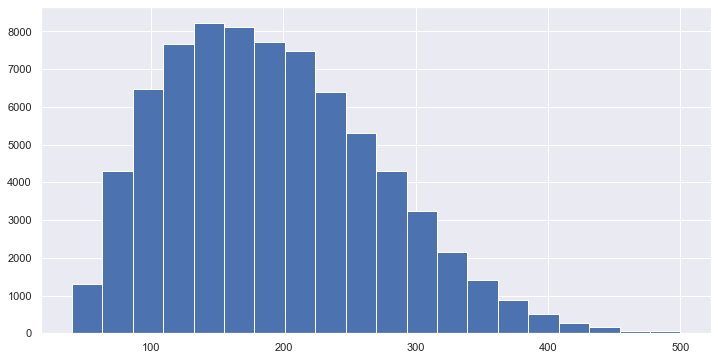

In [23]:
x = patient_0["LEVEL"]

plt.figure(figsize=(12, 6))
plt.hist(x, bins=20)

## 5. Estructura Interna de las Series Temporales
<a id="5"></a>

### 5.1 Tendencia General
<a id="5.1"></a>

Cuando una serie de tiempo muestra un movimiento ascendente o descendente a largo plazo, se dice que tiene una tendencia general. Una forma rápida de comprobar la presencia de una tendencia general es trazar la serie de tiempo como en la siguiente figura, que muestra los niveles de glusosa durante el periodo seleccionado:

In [24]:
patient_0.rename(columns={'LEVEL':'Patient0'}, inplace=True)
patient_0.head()

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Patient0               DATES
0     156.0 2017-06-06 17:40:00
1     159.0 2017-06-06 17:55:00
2     170.0 2017-06-06 18:10:00
3     164.0 2017-06-06 18:25:00
4     147.0 2017-06-06 18:40:00

In [25]:
patient_0['DATES'].max()

Timestamp('2019-02-12 21:27:00')

In [26]:
patient_0['DATES'].min()

Timestamp('2016-08-24 15:20:00')

In [27]:
patient_0['Year'] = patient_0['DATES'].dt.year
patient_0['Month'] = patient_0['DATES'].dt.month
patient_0['Day'] = patient_0['DATES'].dt.day
patient_0.head()

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

Patient0               DATES  Year  Month  Day
0     156.0 2017-06-06 17:40:00  2017      6    6
1     159.0 2017-06-06 17:55:00  2017      6    6
2     170.0 2017-06-06 18:10:00  2017      6    6
3     164.0 2017-06-06 18:25:00  2017      6    6
4     147.0 2017-06-06 18:40:00  2017      6    6

In [28]:
patient_0.index = patient_0['Year'].astype(str) + '-' + patient_0['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
patient_0.head()

Patient0               DATES  Year  Month  Day
2017-06     156.0 2017-06-06 17:40:00  2017      6    6
2017-06     159.0 2017-06-06 17:55:00  2017      6    6
2017-06     170.0 2017-06-06 18:10:00  2017      6    6
2017-06     164.0 2017-06-06 18:25:00  2017      6    6
2017-06     147.0 2017-06-06 18:40:00  2017      6    6

In [29]:
patient_0 = patient_0.loc[(~pd.isnull(patient_0['Patient0']))&\
                (~pd.isnull(patient_0['Year']))&\
                (~pd.isnull(patient_0['Month']))]

In [30]:
patient_0.sort_values(['Year', 'Month'], inplace=True)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

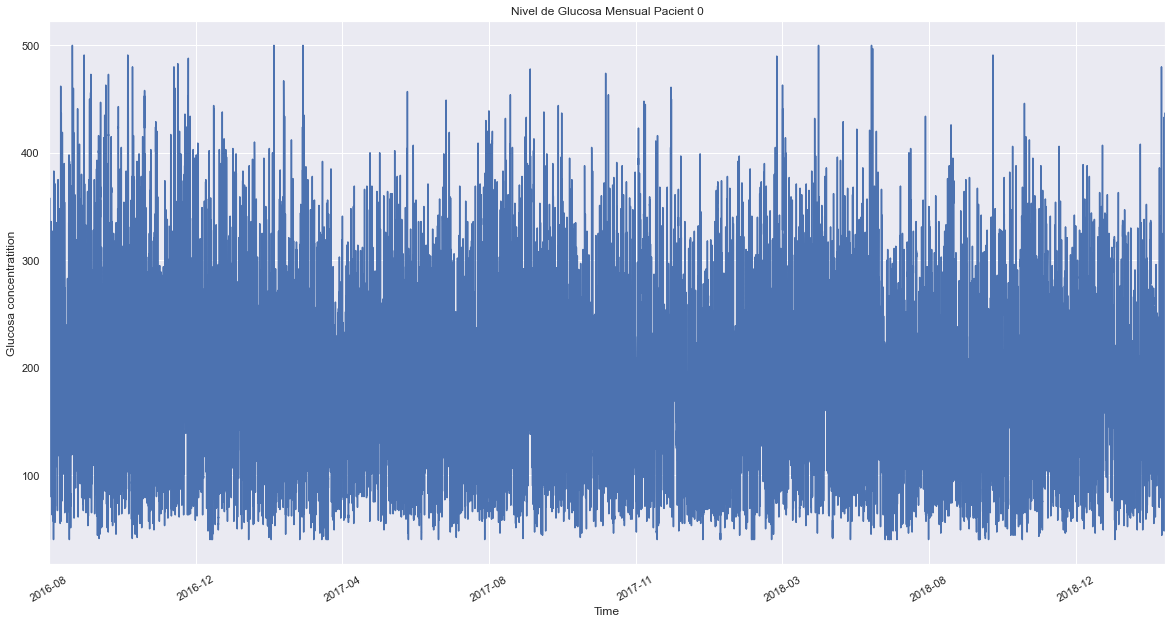

In [31]:
plt.figure(figsize=(20, 10))
patient_0['Patient0'].plot(color='b')
plt.title('Nivel de Glucosa Mensual Pacient 0')
plt.xlabel('Time')
plt.ylabel('Glucosa concentratition')
plt.xticks(rotation=30)

Sin embargo, es posible que la tendencia general no sea evidente a corto plazo de la serie. Los efectos a corto plazo, como las fluctuaciones estacionales y las variaciones irregulares, hacen que la serie de tiempo vuelva a visitar valores más bajos o más altos observados en el pasado y, por lo tanto, pueden ofuscar temporalmente cualquier tendencia general. Esto es evidente en la misma serie de tiempo de niveles de glucosa cuando se amplía durante el período de 2019, como se muestra en la siguiente figura. Por lo tanto, para revelar la tendencia general, necesitamos una serie de tiempo que se remonta sustancialmente al pasado.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text major ticklabel objects>)

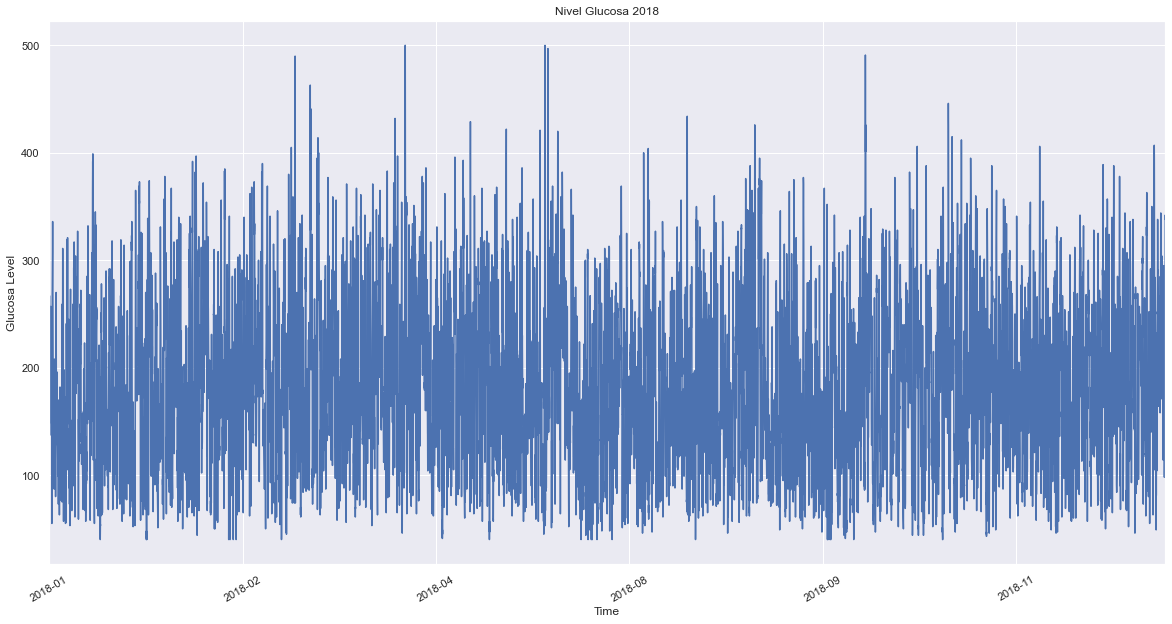

In [32]:
plt.figure(figsize = (20, 10))
patient_0['Patient0'].loc[(patient_0['Year'] == 2018)].plot(color = 'b')
plt.title('Nivel Glucosa 2018')
plt.xlabel('Time')
plt.ylabel('Glucosa Level')
plt.xticks(rotation=30)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

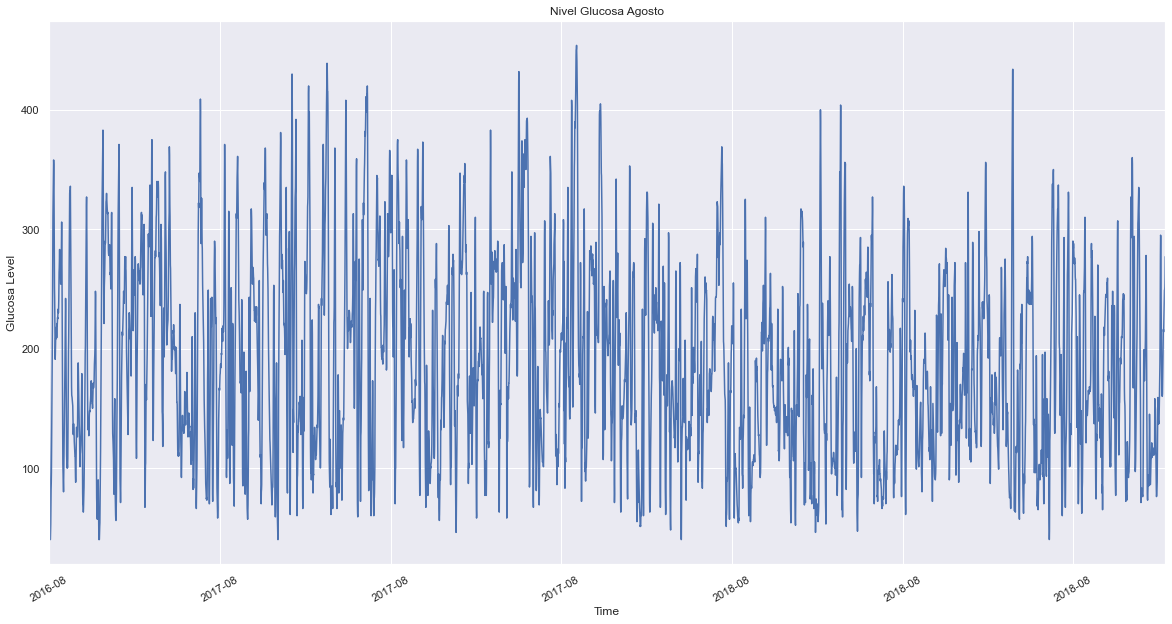

In [33]:
plt.figure(figsize=(20, 10))
patient_0['Patient0'].loc[(patient_0['Month']==8)].plot(color='b')
plt.title('Nivel Glucosa Agosto')
plt.xlabel('Time')
plt.ylabel('Glucosa Level')
plt.xticks(rotation=30)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

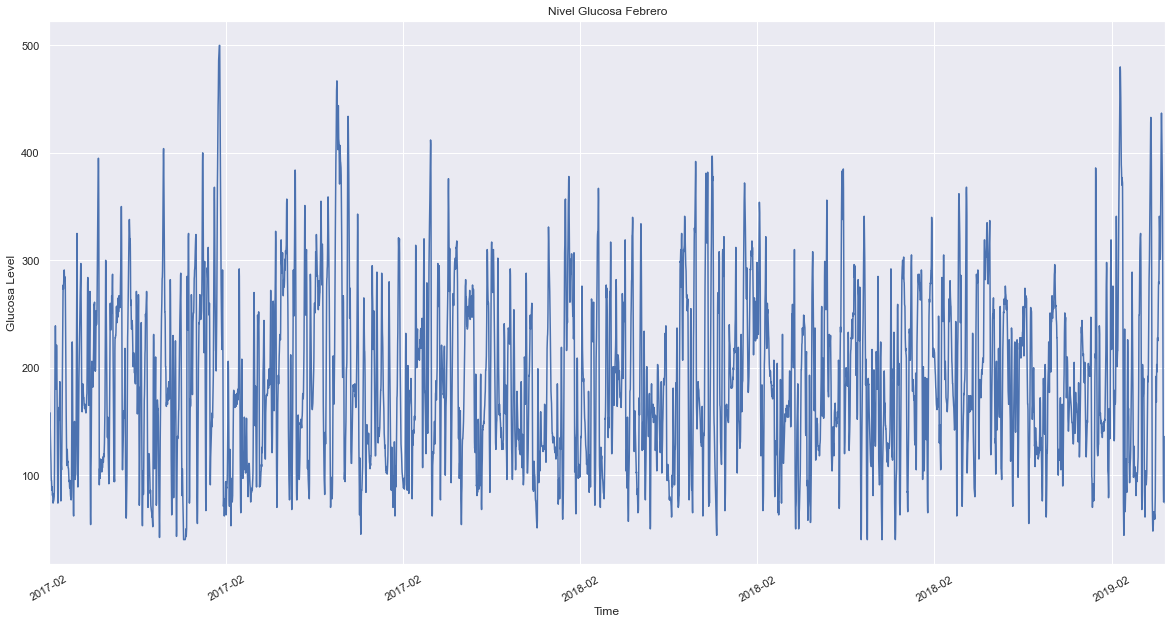

In [34]:
plt.figure(figsize=(20, 10))
patient_0['Patient0'].loc[(patient_0['Month']==2)].plot(color='b')
plt.title('Nivel Glucosa Febrero')
plt.xlabel('Time')
plt.ylabel('Glucosa Level')
plt.xticks(rotation=30)

La tendencia general en la serie de tiempo se debe a cambios fundamentales o cambios sistémicos del proceso o sistema que representa. Por ejemplo, el movimiento ascendente de los niveles de glucosa se puede adeber a peridos de verano o fines de semana.

Una tendencia general se modela estableciendo la serie de tiempo como una regresión contra el tiempo y otros factores conocidos como variables explicativas. La regresión o línea de tendencia se puede utilizar como una predicción del movimiento a largo plazo de la serie de tiempo. Los residuos dejados por la línea de tendencia se analizan más a fondo en busca de otras propiedades interesantes como la estacionalidad, el comportamiento cíclico y las variaciones irregulares. 

También mostraremos cómo construir un modelo de tendencia usando regresión lineal sobre el índice de tiempo (que en este caso es el índice del año en los datos) como variable explicativa y el nivel de glucosa como variable dependiente. A continuación, ajustemos la línea de tendencia. Para ello importamos la clase LinearRegression de scikit-learn y ajustamos un modelo lineal en el índice de tiempo:

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(patient_0.shape[0]).reshape((-1,1)), patient_0['Patient0'])

LinearRegression(normalize=True)

In [37]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_))

Trend model coefficient=-0.00042909064477928273 and intercept=207.53802036152717


In [38]:
residuals = np.array(patient_0['Patient0']) - trend_model.predict(np.arange(patient_0.shape[0]).reshape((-1,1)))

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

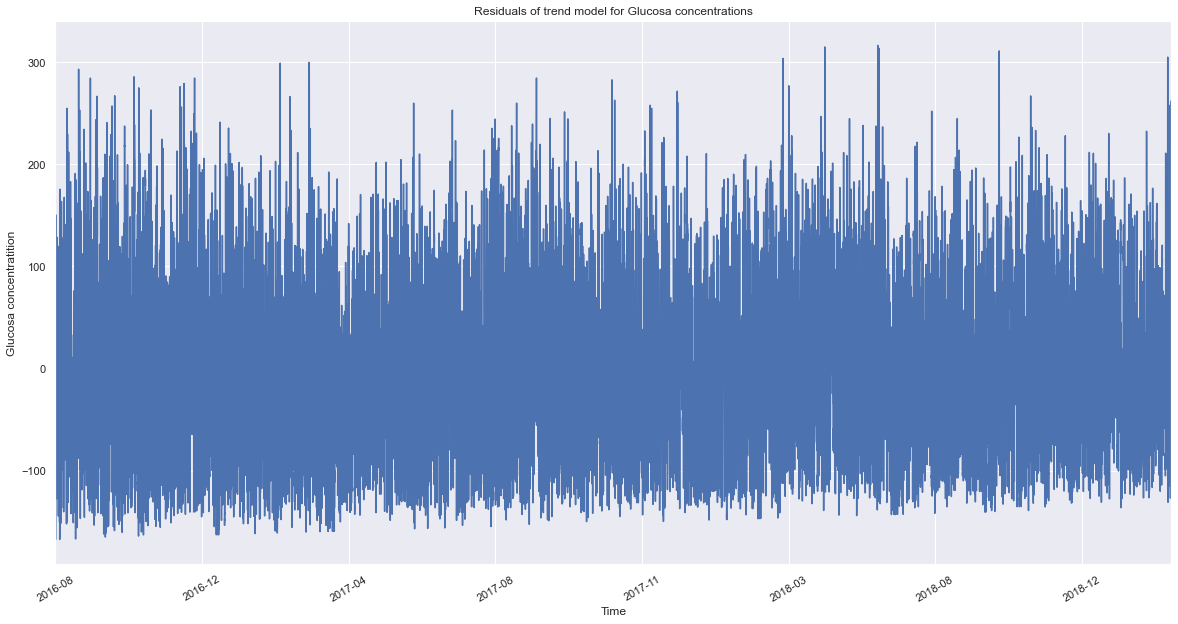

In [39]:
plt.figure(figsize=(20, 10))
pd.Series(data=residuals, index=patient_0.index).plot(color='b')
plt.title('Residuals of trend model for Glucosa concentrations')
plt.xlabel('Time')
plt.ylabel('Glucosa concentratition')
plt.xticks(rotation=30)

### 5.2 Estacionalidad 
<a id="5.2"></a>

La estacionalidad se manifiesta como variaciones repetitivas y de período en una serie de tiempo. En la mayoría de los casos, el análisis de datos exploratorios revela la presencia de estacionalidad. Repasemos la serie de tiempo sin tendencia de los niveles de glucosa. Aunque la serie de líneas sin tendencia tiene media constante y varianza constante, se aparta sistemáticamente del modelo de tendencia de forma predecible. La estacionalidad se manifiesta como desviaciones periódicas como las que se observan en las observaciones des-tendencia delnivel de glucosa. Los picos y valles en el volumen de ventas mensual de productos de temporada, como regalos de Navidad o ropa de temporada, es otro ejemplo de una serie de tiempo con estacionalidad.

Una técnica práctica para determinar la estacionalidad es mediante el análisis exploratorio de datos a través de los siguientes gráficos:

* Ejecutar diagrama de secuencia

* Gráfico de subserie estacional

* Múltiples diagramas de caja

### Gráfico de subserie estacional

Para una periodicidad conocida de variaciones estacionales, la subserie estacional vuelve a dibujar la serie original en lotes de períodos de tiempo sucesivos. Por ejemplo, la periodicidad en los niveles de glucosa es de 12 meses y, en base a esto, en la siguiente figura se muestran gráficas de una subserie estacional sobre la media y la desviación estándar de los residuos. Para visualizar la estacionalidad en los residuos, creamos desviaciones estándar y medias trimestrales. Una subserie estacional revela dos propiedades: 

* Variaciones dentro de las estaciones como dentro de un lote de meses sucesivos 

* Variaciones entre temporadas como entre lotes de meses sucesivos.

Primero, necesitamos agregar los residuos y las etiquetas de cuartos al DataFrame de niveles de glucosa.

In [40]:
patient_0['Residuals'] = residuals
month_quarter_map = {1: 'Invierno', 2: 'Invierno', 3: 'Primavera',
                     4: 'Primavera', 5: 'Primavera', 6: 'Verano',
                     7: 'Verano', 8: 'Verano', 9: 'Otoño',
                     10: 'Otoño', 11: 'Otoño', 12: 'Invierno'
                    }
patient_0['Estacion'] = patient_0['Month'].map(lambda m: month_quarter_map.get(m))

In [41]:
seasonal_sub_series_data = patient_0.groupby(by=['Year', 'Estacion'])['Patient0'].aggregate([np.mean, np.std])

In [42]:
seasonal_sub_series_data.columns = ['Estacion Mean', 'Estacion Standard Deviation']

In [43]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Estacion']
seasonal_sub_series_data.head()

Year  Estacion  Estacion Mean  Estacion Standard Deviation
2016-Invierno  2016  Invierno     211.611397                    89.100870
2016-Otoño     2016     Otoño     214.621210                    91.378961
2016-Verano    2016    Verano     208.019886                    81.180495
2017-Invierno  2017  Invierno     194.512443                    80.620325
2017-Otoño     2017     Otoño     196.053155                    79.395909

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

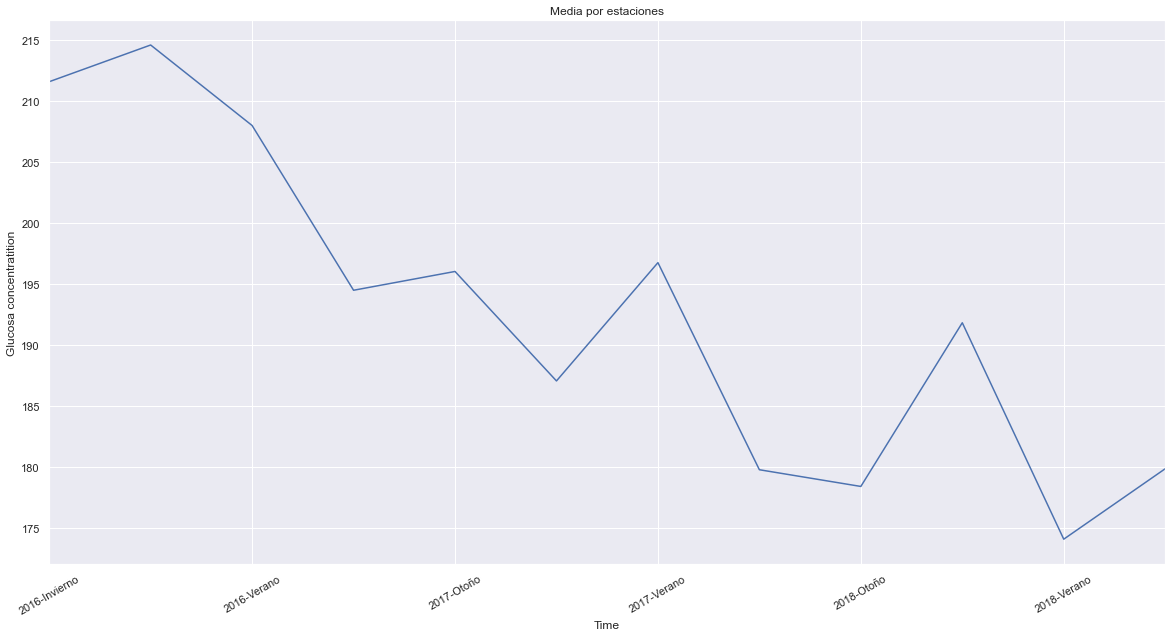

In [44]:
plt.figure(figsize=(20, 10))
seasonal_sub_series_data['Estacion Mean'].plot(color='b')
plt.title('Media por estaciones')
plt.xlabel('Time')
plt.ylabel('Glucosa concentratition')
plt.xticks(rotation=30)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

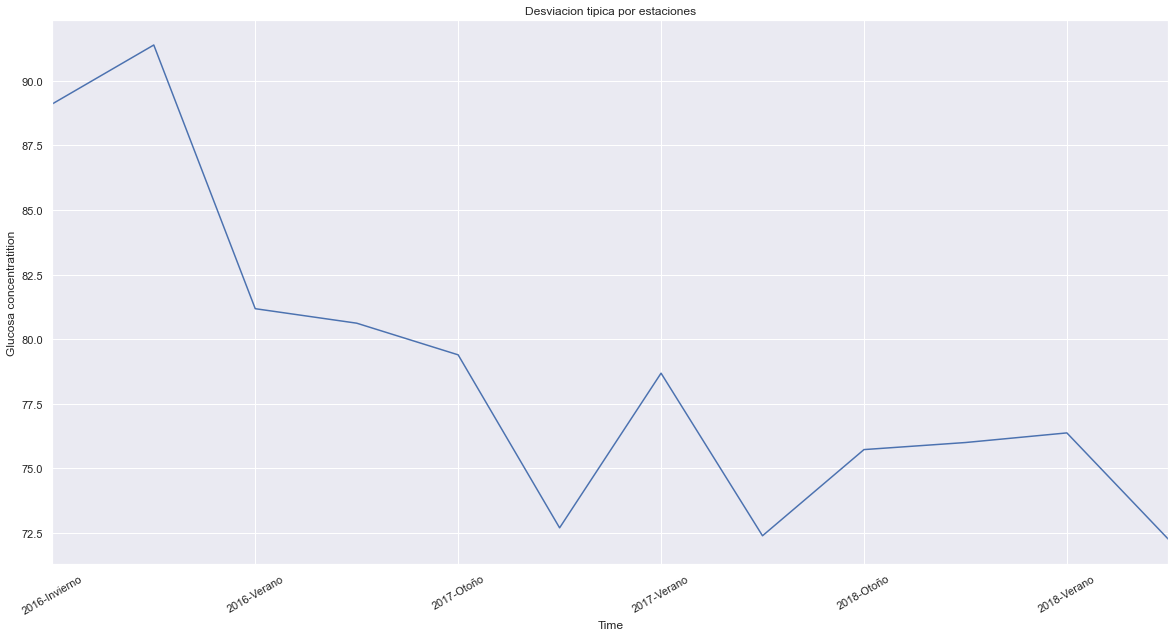

In [45]:
plt.figure(figsize=(20, 10))
seasonal_sub_series_data['Estacion Standard Deviation'].plot(color='b')
plt.title('Desviacion tipica por estaciones')
plt.xlabel('Time')
plt.ylabel('Glucosa concentratition')
plt.xticks(rotation=30)

### Gráficos de caja múltiples

La gráfica de subserie estacional puede ser más informativa cuando se vuelve a dibujar con diagramas de caja estacionales como se muestra en la siguiente figura. Un diagrama de caja muestra tanto la tendencia central como la dispersión dentro de los datos estacionales en un lote de unidades de tiempo. Además, la separación entre dos parcelas de caja adyacentes revela las variaciones dentro de la temporada:

Text(0, 0.5, 'Glucosa concentratition')

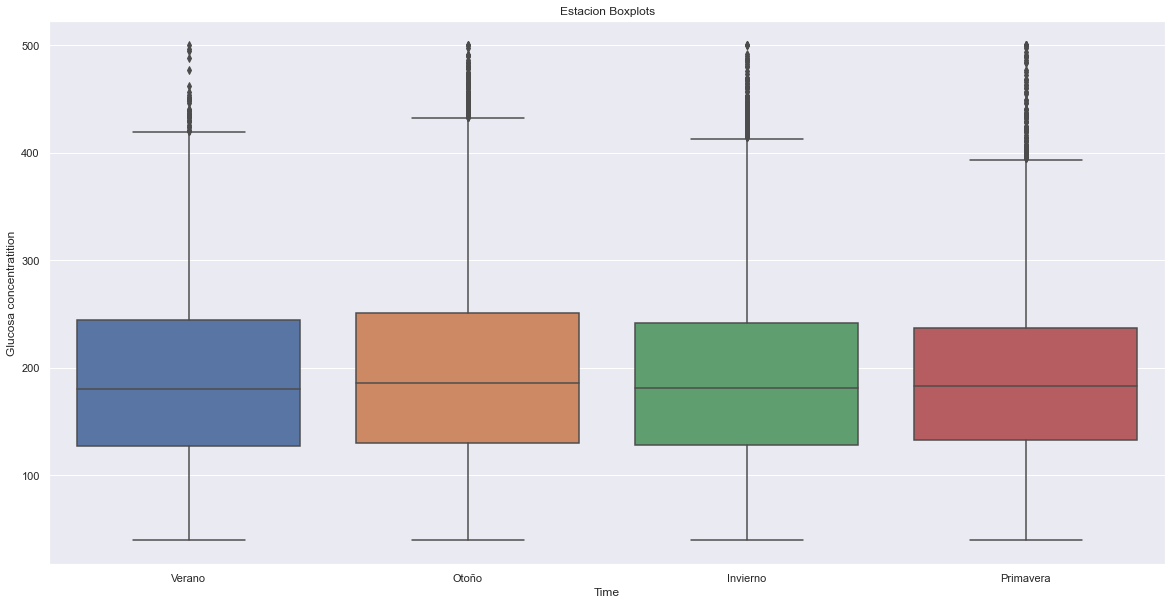

In [46]:
plt.figure(figsize=(20, 10))
g = sns.boxplot(data=patient_0, y='Patient0', x='Estacion')
g.set_title('Estacion Boxplots')
g.set_xlabel('Time')
g.set_ylabel('Glucosa concentratition')

**Media de los niveles de glucosa por estacion**

In [47]:
media_gluc_estacion = patient_0.groupby(['Estacion'], as_index = False).Patient0.mean()
media_gluc_estacion.head()

Estacion    Patient0
0   Invierno  189.042498
1      Otoño  195.838056
2  Primavera  189.292774
3     Verano  188.437420

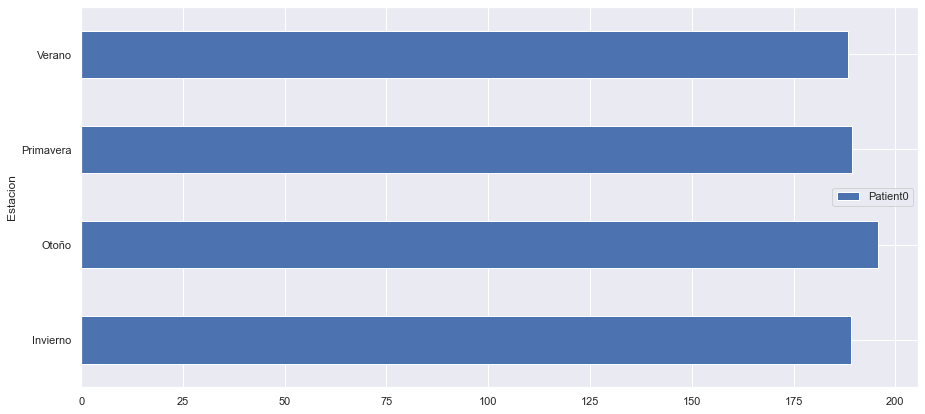

In [48]:
media_gluc_estacion.plot(x='Estacion', kind='barh', figsize =(15,7));

**Porcentaje Hiperglucemia por estaciones**

In [49]:
porcentaje_patient_0_hiperglucemia = patient_0[patient_0.Patient0 >= 350]

porcentaje_patient_0_hiperglucemia_count = patient_0.groupby(['Estacion'], as_index = False)['Patient0'].count()

porcentaje_patient_0_hiperglucemia_sum = porcentaje_patient_0_hiperglucemia.groupby(['Estacion'], as_index = False)['Patient0'].sum()

porcentaje_patient_0_hiperglucemia = pd.merge(porcentaje_patient_0_hiperglucemia_count, porcentaje_patient_0_hiperglucemia_sum,
                                             on = 'Estacion')

porcentaje_patient_0_hiperglucemia.head()

Estacion  Patient0_x  Patient0_y
0   Invierno       23554    293986.0
1      Otoño       24706    461252.0
2  Primavera       16149    145727.0
3     Verano       11705    125697.0

In [50]:
porcentaje_patient_0_hiperglucemia.rename(columns={'Patient0_x':'suma', 'Patient0_y':'count'}, inplace=True)

porcentaje_patient_0_hiperglucemia.head()

Estacion   suma     count
0   Invierno  23554  293986.0
1      Otoño  24706  461252.0
2  Primavera  16149  145727.0
3     Verano  11705  125697.0

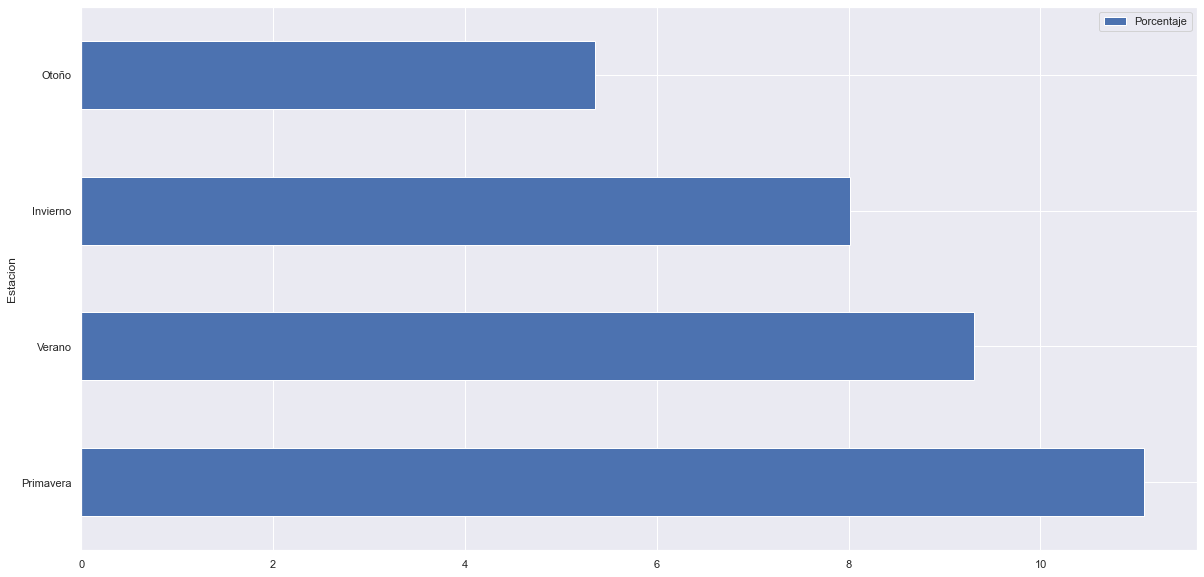

In [51]:
porcentaje_patient_0_hiperglucemia['Porcentaje'] = round(porcentaje_patient_0_hiperglucemia['suma']/
                                                    porcentaje_patient_0_hiperglucemia['count']*100, 2)

porcentaje_patient_0_hiperglucemia.drop(['suma', 'count'], axis = 1).sort_values('Porcentaje', ascending = False).plot(x='Estacion', kind='barh', stacked=True, figsize =(20,10));

**Porcentaje Hiperglucemia por estaciones**

In [52]:
porcentaje_patient_0_hipoglucemia = patient_0[patient_0.Patient0 <= 70]

porcentaje_patient_0_hipoglucemia_count = patient_0.groupby(['Estacion'], as_index = False)['Patient0'].count()

porcentaje_patient_0_hipoglucemia_sum = porcentaje_patient_0_hipoglucemia.groupby(['Estacion'], as_index = False)['Patient0'].sum()

porcentaje_patient_0_hipoglucemia = pd.merge(porcentaje_patient_0_hipoglucemia_count, porcentaje_patient_0_hipoglucemia_sum,
                                             on = 'Estacion')

porcentaje_patient_0_hipoglucemia.head()

Estacion  Patient0_x  Patient0_y
0   Invierno       23554     46228.0
1      Otoño       24706     49013.0
2  Primavera       16149     26498.0
3     Verano       11705     29040.0

In [53]:
porcentaje_patient_0_hipoglucemia.rename(columns={'Patient0_x':'suma', 'Patient0_y':'count'}, inplace=True)

porcentaje_patient_0_hipoglucemia.head()

Estacion   suma    count
0   Invierno  23554  46228.0
1      Otoño  24706  49013.0
2  Primavera  16149  26498.0
3     Verano  11705  29040.0

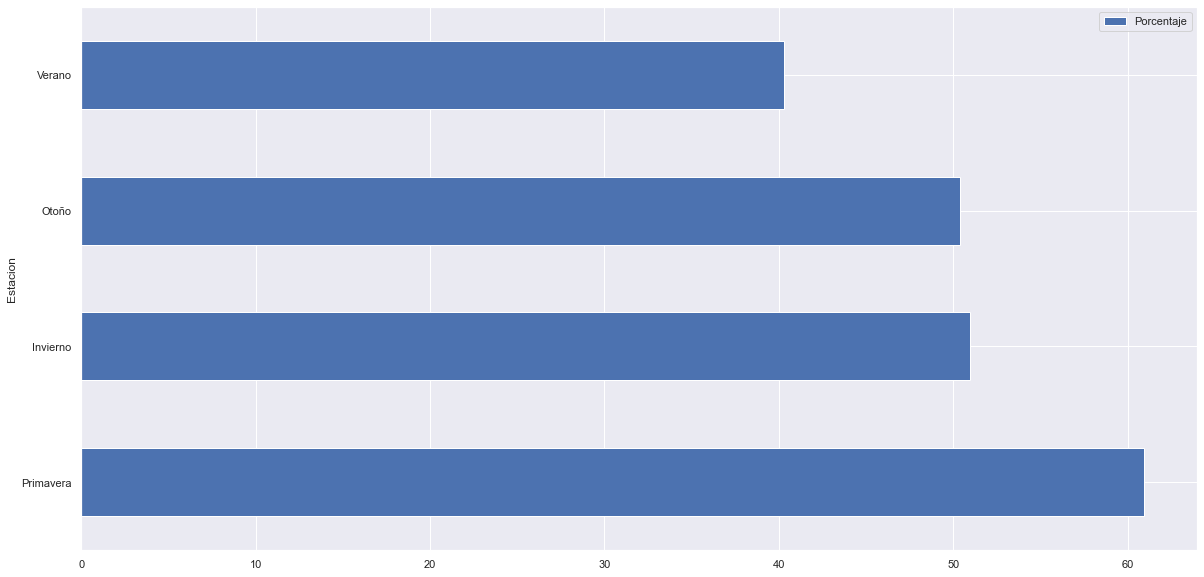

In [54]:
porcentaje_patient_0_hipoglucemia['Porcentaje'] = round(porcentaje_patient_0_hipoglucemia['suma']/
                                                    porcentaje_patient_0_hipoglucemia['count']*100, 2)

porcentaje_patient_0_hipoglucemia.drop(['suma', 'count'], axis = 1).sort_values('Porcentaje', ascending = False).plot(x='Estacion', kind='barh', stacked=True, figsize =(20,10));

**Estacionalidad anual**

In [55]:
patient_0_est = pacientes[pacientes.PATIENT == 0]
patient_0_est.drop('PATIENT', axis = 1, inplace = True)
patient_0_est.dropna(inplace = True)
patient_0_est['DATES'] = patient_0_est['DATE'].apply(fechas)
patient_0_est.drop('DATE', axis = 1, inplace = True)

patient_0_est.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_est['Year'] = patient_0_est['DATES'].dt.year
patient_0_est['Month'] = patient_0_est['DATES'].dt.month
patient_0_est['Day'] = patient_0_est['DATES'].dt.day

patient_0_est.head()

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

LEVEL               DATES  Year  Month  Day
0  156.0 2017-06-06 17:40:00  2017      6    6
1  159.0 2017-06-06 17:55:00  2017      6    6
2  170.0 2017-06-06 18:10:00  2017      6    6
3  164.0 2017-06-06 18:25:00  2017      6    6
4  147.0 2017-06-06 18:40:00  2017      6    6

In [56]:
patient_0_est.shape

(93657, 5)

In [57]:
patient_0_est = patient_0_est.drop_duplicates()

In [58]:
patient_0_est.shape

(76114, 5)

In [59]:
patient_0_est['date(m-d)'] = patient_0_est['Month'].astype(str) + '-' + patient_0_est['Day'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
patient_0_est.head()

LEVEL               DATES  Year  Month  Day date(m-d)
0  156.0 2017-06-06 17:40:00  2017      6    6      6-06
1  159.0 2017-06-06 17:55:00  2017      6    6      6-06
2  170.0 2017-06-06 18:10:00  2017      6    6      6-06
3  164.0 2017-06-06 18:25:00  2017      6    6      6-06
4  147.0 2017-06-06 18:40:00  2017      6    6      6-06

In [60]:
patient_0_est = pd.pivot_table(patient_0_est, values='LEVEL', index = 'date(m-d)', columns = 'Year')
patient_0_est.head()

Year       2016        2017        2018        2019
date(m-d)                                          
1-01        NaN  188.578947  208.757895  235.484211
1-02        NaN  177.397590  156.864583  227.364583
1-03        NaN  219.294737  128.505263  201.135417
1-04        NaN  220.270833  151.053191  164.663158
1-05        NaN  207.010417  150.364583  174.408602

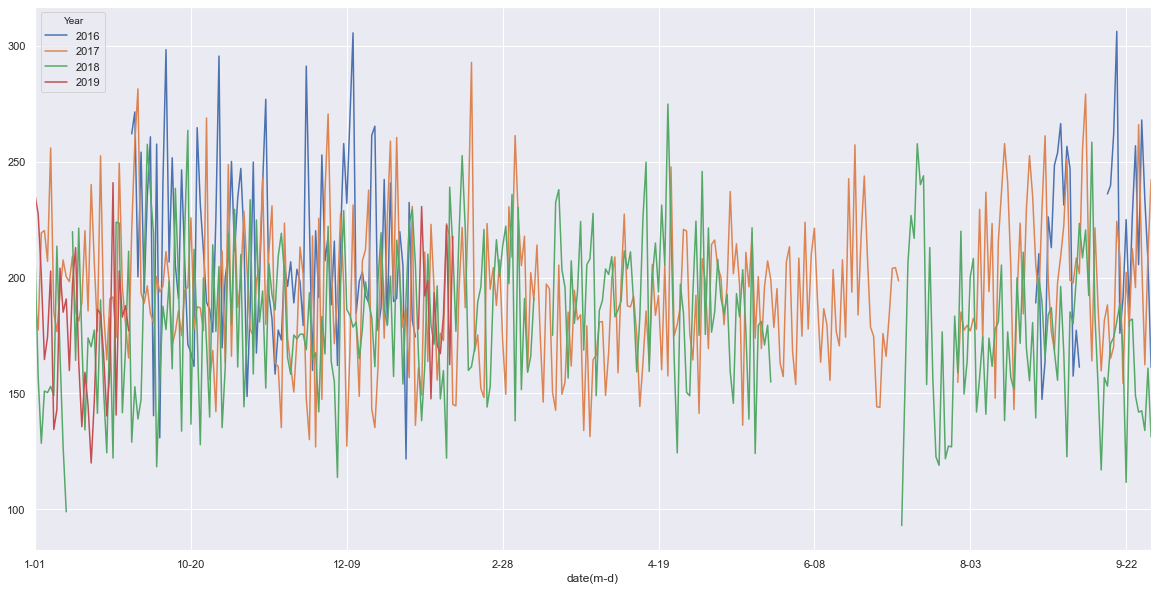

In [61]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
patient_0_est.plot(kind = 'line', ax=  ax1);

Vemos que con los años no se observa ningun tipo de estacionalidad, por lo que trataremos de llevar a cabo lo mismo pero con los meses

**Estacionalidad mensual**

In [62]:
patient_0_est_men = pacientes[pacientes.PATIENT == 0]
patient_0_est_men.drop('PATIENT', axis = 1, inplace = True)
patient_0_est_men.dropna(inplace = True)
patient_0_est_men['DATES'] = patient_0_est_men['DATE'].apply(fechas)
patient_0_est_men.drop('DATE', axis = 1, inplace = True)

patient_0_est_men.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_est_men['Year'] = patient_0_est_men['DATES'].dt.year
patient_0_est_men['Month'] = patient_0_est_men['DATES'].dt.month
patient_0_est_men['Day'] = patient_0_est_men['DATES'].dt.day

patient_0_est_men.head()

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

LEVEL               DATES  Year  Month  Day
0  156.0 2017-06-06 17:40:00  2017      6    6
1  159.0 2017-06-06 17:55:00  2017      6    6
2  170.0 2017-06-06 18:10:00  2017      6    6
3  164.0 2017-06-06 18:25:00  2017      6    6
4  147.0 2017-06-06 18:40:00  2017      6    6

In [63]:
patient_0_est_men['date(m)'] = patient_0_est_men['Month'].astype(str)
patient_0_est_men.head()

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


LEVEL               DATES  Year  Month  Day date(m)
0  156.0 2017-06-06 17:40:00  2017      6    6       6
1  159.0 2017-06-06 17:55:00  2017      6    6       6
2  170.0 2017-06-06 18:10:00  2017      6    6       6
3  164.0 2017-06-06 18:25:00  2017      6    6       6
4  147.0 2017-06-06 18:40:00  2017      6    6       6

In [64]:
patient_0_est_men = pd.pivot_table(patient_0_est_men, values='LEVEL', index = 'Day', columns = 'Month')
patient_0_est_men.head()

Month          1           2           3           4           5           6   \
Day                                                                             
1      210.394737  167.586842  186.115183  185.510526  208.515789  168.000000   
2      179.700809  164.412698  214.031414  176.151685  158.079787  153.875000   
3      169.443570  181.623037  222.340314  184.687831  227.062827  208.389474   
4      171.997361  196.102151  200.031414  204.775862  186.663102  174.741935   
5      170.506562  179.670330  228.188482  195.926702  195.513089  223.873684   

Month          7           8           9           10          11          12  
Day                                                                            
1      166.020833  168.062937  220.187500  208.166227  231.656085  180.463415  
2      183.705263  174.125448  210.581333  235.513158  190.876712  212.010499  
3      204.021053  184.451613  220.390625  200.186047  224.259459  245.242820  
4      204.263158  191.045614  207.619303  198.675676  192.722513  191.931937  
5      198.581081  165.720280  183.144357  194.057743  214.157068  178.370757

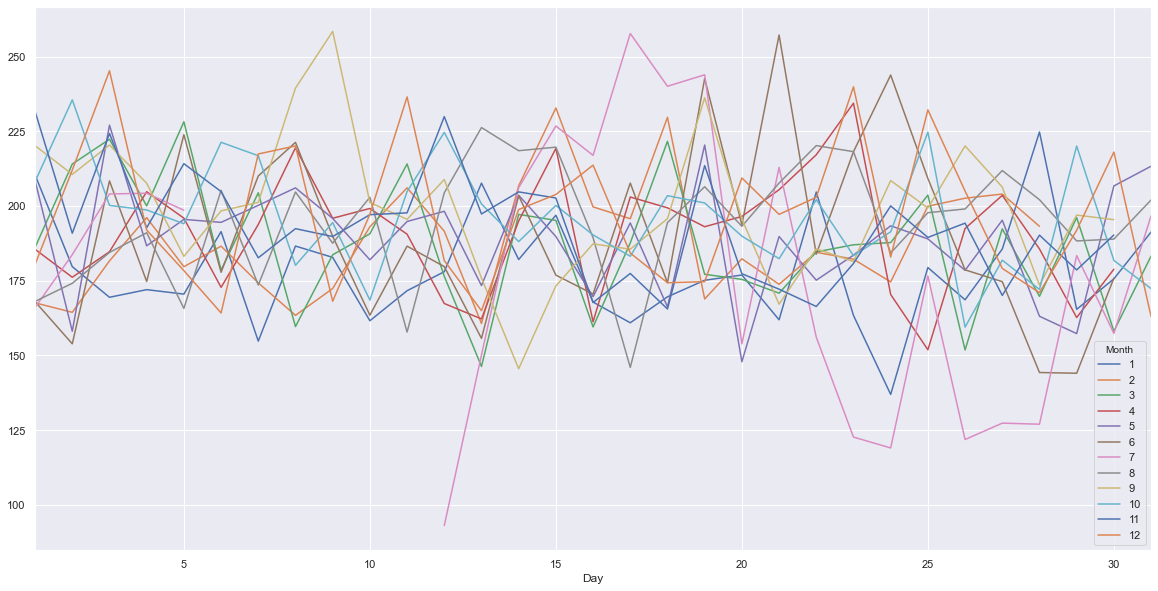

In [65]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
patient_0_est_men.plot(kind = 'line', ax=  ax1);

## 7. Procesamiento y visualización avanzados de datos de series de tiempo
<a id="7"></a>

En muchos casos, la serie de tiempo original debe transformarse en estadísticas agregadas. Por ejemplo, las observaciones de la serie temporal original podrían haberse registrado cada segundo; sin embargo, para realizar un análisis significativo, los datos deben agregarse cada minuto. Esto necesitaría volver a muestrear las observaciones durante períodos que son más largos que los índices de tiempo granulares en los datos originales. Las estadísticas agregadas, como la media, la mediana y la varianza, se calculan para cada uno de los períodos de tiempo más largos. 


Otro ejemplo de preprocesamiento de datos para series de tiempo es el cálculo de agregados sobre segmentos similares en los datos. Considere las ventas mensuales de automóviles fabricados por la empresa X donde los datos muestran una estacionalidad mensual, debido a que las ventas durante un mes de un año dado muestran patrones similares a las ventas del mismo mes en los años anterior y siguiente. Para resaltar este tipo de estacionalidad, debemos eliminar la tendencia a largo plazo de los datos. 

Sin embargo, supongamos que no existe una tendencia a largo plazo o que ya se ha ajustado. Estamos interesados en estimar las estadísticas por temporada (en este caso, por mes) para determinar las variaciones entre estaciones (entre meses). Por ejemplo, requerimos ventas promedio durante enero, febrero, etc. para comprender cómo varían las ventas en promedio durante un año determinado. Las tendencias estacionales, como las ventas mensuales de automóviles, se pueden obtener agrupando primero la serie temporal original en 12 segmentos, cada segmento se define por un mes y luego agregando los datos de cada segmento. Tenga en cuenta que tanto las operaciones de remuestreo como las de agrupación dividen la serie de tiempo original en fragmentos que no se superponen para encontrar los agregados. Ambas técnicas van a reducir el ruido y posteriormente producirán un suavizado de la serie de tiempo original. 

Sin embargo, a veces se requieren agregados continuos o en ejecución de las series de tiempo para el análisis. La técnica de calcular agregados en ventanas de períodos de tiempo sucesivos da agregados móviles o móviles. Por ejemplo, los promedios móviles trimestrales de los datos de ventas de automóviles encontrarían promedios en una ventana de cuatro meses que cambia un mes cada vez. Al desplazar o girar la ventana de cálculo, se generan las medias móviles. 

Las técnicas se demuestran con ejemplos en las siguientes tres subsecciones: 


* Remuestreo de datos de series de tiempo 


* Realización de grupos por cálculo de estadísticas de movimiento


* Moving Statistics

### 7.1 Remuestreo de datos de series de tiempo
<a id="7.1"></a>

La técnica de reasignación se ilustra mediante una serie de tiempo de niveles de glucosa entre 2017 y 2019.

In [66]:
patient_0_chapter_2 = pacientes[pacientes.PATIENT == 0]
patient_0_chapter_2.drop('PATIENT', axis = 1, inplace = True)
patient_0_chapter_2.dropna(inplace = True)
patient_0_chapter_2['DATES'] = patient_0_chapter_2['DATE'].apply(fechas)
patient_0_chapter_2.drop('DATE', axis = 1, inplace = True)
patient_0_chapter_2.head()

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

LEVEL               DATES
0  156.0 2017-06-06 17:40:00
1  159.0 2017-06-06 17:55:00
2  170.0 2017-06-06 18:10:00
3  164.0 2017-06-06 18:25:00
4  147.0 2017-06-06 18:40:00

In [67]:
patient_0_chapter_2.shape

(93657, 2)

In [68]:
patient_0_chapter_2 = patient_0_chapter_2.drop_duplicates()

In [69]:
patient_0_chapter_2.shape

(76114, 2)

In [70]:
patient_0_chapter_2.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_chapter_2.index = patient_0_chapter_2['DATES'].map(lambda d: pd.to_datetime(d, format = '%m-%d-%Y %I:%M %p'))

patient_0_chapter_2.head()

LEVEL               DATES
DATES                                         
2017-06-06 17:40:00  156.0 2017-06-06 17:40:00
2017-06-06 17:55:00  159.0 2017-06-06 17:55:00
2017-06-06 18:10:00  170.0 2017-06-06 18:10:00
2017-06-06 18:25:00  164.0 2017-06-06 18:25:00
2017-06-06 18:40:00  147.0 2017-06-06 18:40:00

In [71]:
daily = patient_0_chapter_2['LEVEL'].resample('D')
daily_mean = daily.mean()

Observe que hemos pasado el argumento D a la función remuestrear para generar los promedios diarios. Para los agregados mensuales y anuales, debemos pasar M e Y a la función de remuestreo. Finalmente, los promedios originales y diarios se grafican en la siguiente figura, que muestra el efecto suavizante de este último:

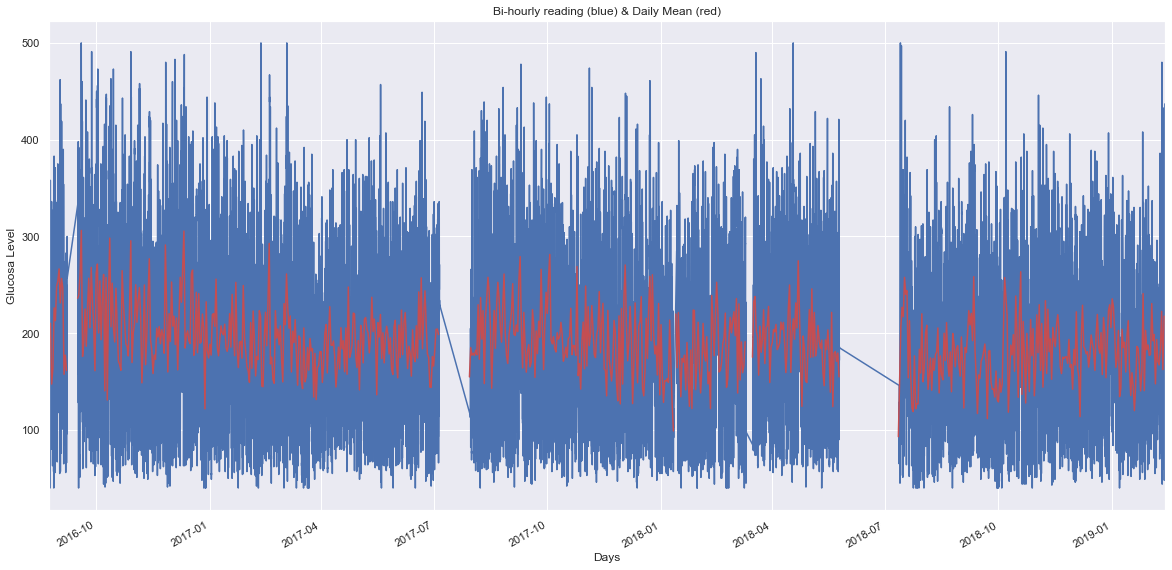

In [72]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

patient_0_chapter_2['LEVEL'].sort_index().plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days')
ax.set_ylabel('Glucosa Level');

### 7.2 Agrupación por grupo o periodo
<a id="7.2"></a>

Para demostrar la agregación por grupos, usaremos la serie de tiempo de la los niveles de glucosas. La serie de tiempo tiene observaciones tomadas entre 2016 y 2019.

In [73]:
patient_0_chapter_2_1 = pd.read_csv('patient0.csv')
patient_0_chapter_2_1.dropna(inplace = True)
patient_0_chapter_2_1.index = patient_0_chapter_2_1['DATE'].map(lambda d: pd.to_datetime(d, format = '%m-%d-%Y %I:%M %p'))
patient_0_chapter_2_1.head()

DATE   LEVEL
DATE                                           
2017-06-06 17:40:00  06-06-2017 5:40 pm   156.0
2017-06-06 17:55:00  06-06-2017 5:55 pm   159.0
2017-06-06 18:10:00  06-06-2017 6:10 pm   170.0
2017-06-06 18:25:00  06-06-2017 6:25 pm   164.0
2017-06-06 18:40:00  06-06-2017 6:40 pm   147.0

In [74]:
print('Shape of dataframe:', patient_0_chapter_2_1.shape)

Shape of dataframe: (93657, 2)


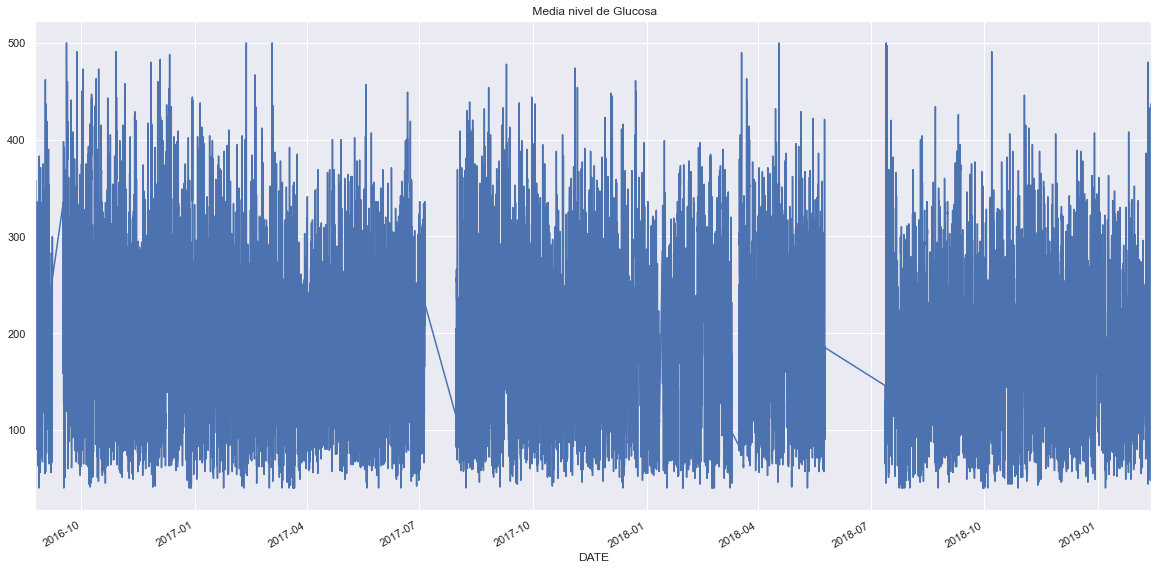

In [75]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

patient_0_chapter_2_1[' LEVEL'].plot(ax=ax, color='b')

ax.set_title(' Media nivel de Glucosa');

In [76]:
#Añadimos la columna Mes_Año
patient_0_chapter_2_1['Mes_Año'] = patient_0_chapter_2_1.index.map(lambda d: d.strftime('%m-%Y'))

patient_0_chapter_2_1.head(10)

DATE   LEVEL  Mes_Año
DATE                                                    
2017-06-06 17:40:00  06-06-2017 5:40 pm   156.0  06-2017
2017-06-06 17:55:00  06-06-2017 5:55 pm   159.0  06-2017
2017-06-06 18:10:00  06-06-2017 6:10 pm   170.0  06-2017
2017-06-06 18:25:00  06-06-2017 6:25 pm   164.0  06-2017
2017-06-06 18:40:00  06-06-2017 6:40 pm   147.0  06-2017
2017-06-06 18:55:00  06-06-2017 6:55 pm   148.0  06-2017
2017-06-06 19:10:00  06-06-2017 7:10 pm   156.0  06-2017
2017-06-06 19:25:00  06-06-2017 7:25 pm   160.0  06-2017
2017-06-06 19:40:00  06-06-2017 7:40 pm   175.0  06-2017
2017-06-06 19:55:00  06-06-2017 7:55 pm   183.0  06-2017

A continuación, la columna del nivel de glucosa se agrupa con respecto a la recién añadida columna Mes_Año y se calculan la media, la mediana y las desviaciones estándar del mes.

In [77]:
#Estadisticos del mes
estadisticas_mensuales = patient_0_chapter_2_1.groupby(by='Mes_Año')[' LEVEL'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
estadisticas_mensuales.reset_index(inplace=True)
estadisticas_mensuales.head(10)

Mes_Año        mean  median        std
0  01-2017  198.520284   194.0  77.001536
1  01-2018  167.379182   159.0  70.803571
2  01-2019  176.456507   172.0  69.554300
3  02-2017  189.345351   177.0  83.798742
4  02-2018  182.088918   171.0  74.458225
5  02-2019  188.658929   176.0  78.149359
6  03-2017  182.262262   173.0  77.048011
7  03-2018  194.609756   188.5  78.221356
8  04-2017  185.688817   181.0  65.920236
9  04-2018  195.437256   185.0  76.378689

Podemos observar que las filas de la tabla anterior no están en el orden ascendente de Mes_Año. Por lo que creamos dos nuevas columnas  que son Mes y Año y luego clasificando en el orden ascendente de Año seguido por la clasificación en el orden ascendente de Mes.

In [78]:
# Creamos columnas de mes y año y ordenar por ellas para reordenar las filas
estadisticas_mensuales['Year'] = estadisticas_mensuales['Mes_Año']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
estadisticas_mensuales['Month'] = estadisticas_mensuales['Mes_Año']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
estadisticas_mensuales.sort_values(by=['Year', 'Month'], inplace=True)
estadisticas_mensuales.head(10)

Mes_Año        mean  median        std  Year Month
15  08-2016  208.019886   215.5  81.180495  2016    08
18  09-2016  223.185020   217.0  89.014572  2016    09
21  10-2016  216.203900   206.0  95.747133  2016    10
24  11-2016  206.275188   199.0  87.824700  2016    11
27  12-2016  211.611397   199.0  89.100870  2016    12
0   01-2017  198.520284   194.0  77.001536  2017    01
3   02-2017  189.345351   177.0  83.798742  2017    02
6   03-2017  182.262262   173.0  77.048011  2017    03
8   04-2017  185.688817   181.0  65.920236  2017    04
10  05-2017  193.259259   192.0  73.987580  2017    05

Los agregados mensuales se muestran en la siguiente tabla:

In [79]:
# Ponemos 'Mes_Año' como el índice de la fila
estadisticas_mensuales.index = estadisticas_mensuales['Mes_Año']

estadisticas_mensuales.head()

Mes_Año        mean  median        std  Year Month
Mes_Año                                                    
08-2016  08-2016  208.019886   215.5  81.180495  2016    08
09-2016  09-2016  223.185020   217.0  89.014572  2016    09
10-2016  10-2016  216.203900   206.0  95.747133  2016    10
11-2016  11-2016  206.275188   199.0  87.824700  2016    11
12-2016  12-2016  211.611397   199.0  89.100870  2016    12

Los agregados mensuales podemos observar en la siguiente figura en la que se destaca la estacionalidad existente en los meses de los datos originales.

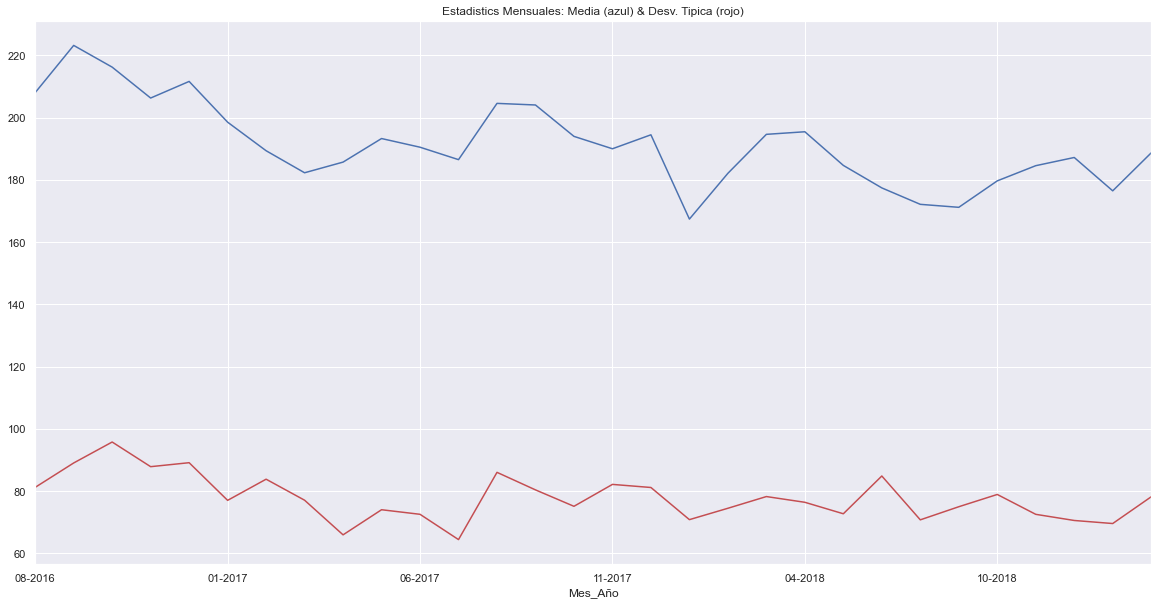

In [80]:
#Pintamos las series temporales originales y la media diaria
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

estadisticas_mensuales['mean'].plot(ax=ax, color='b')
estadisticas_mensuales['std'].plot(ax=ax, color='r')

ax.set_title('Estadistics Mensuales: Media (azul) & Desv. Tipica (rojo)');

### 7.3 Moving Stadistics
<a id="7.3"></a>

Las moving statistics se calculan deslizando una ventana de cierto tamaño sobre la serie de tiempo original y agregando los datos de cada ventana.

Vamos a calcular promedios móviles semanales que pondrían el tamaño de la ventana en 7 y la deslizarían un posicion a la derecha:

In [81]:
# Calculamos el promedio móvil semanal en la serie de tiempo original del nivel de glucosa medio diario
weekly_moving_average = patient_0_chapter_2_1[' LEVEL'].rolling(7).mean()

# Calculamos el promedio móvil mensual en la serie de tiempo original del nivel de glucosa medio diario
monthly_moving_average = patient_0_chapter_2_1[' LEVEL'].rolling(30).mean()

***La función de ROLLING sólo toma como argumento el tamaño de la ventana.*** Por lo tanto, para añadir una longitud de zancada de más de uno seguimos calculando la media móvil como se muestra anteriormente, pero luego cortamos la serie resultante para obtener el resultado deseado.

In [82]:
# Calculemos los promedios semanales y mensuales con un paso de longitud 2
weekly_moving_average_2stride = patient_0_chapter_2_1[' LEVEL'].rolling(7).mean()[::2]
monthly_moving_average_2stride = patient_0_chapter_2_1[' LEVEL'].rolling(30).mean()[::2]

En el análisis de series temporales, las moving statistics basadas en la longitud de la zancada de 1 son las más comunes, por lo que rara vez se necesita algo más que la función de balanceo. 

Observamos los datos originales junto con los promedios semanales y mensuales, donde podemos ver la reducción de ruido y el  efecto suavizador producido por las medias moviles móviles:

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

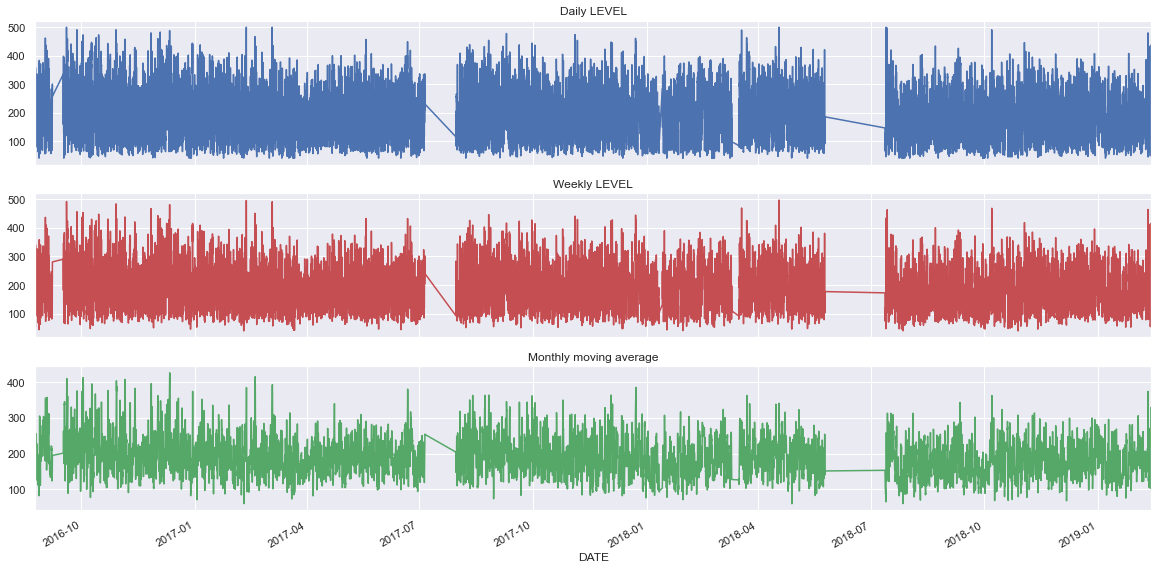

In [83]:
# Pintamos las series temporales originales y el promedio móvil semanal
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(20, 10)

patient_0_chapter_2_1[' LEVEL'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily LEVEL')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly LEVEL')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average');

## 8. Estacionariedad
<a id="8"></a>

Existen diferentes maneras de determinar la estacionariedad de una serie temporal. La caracteristica general de que una serie sea estacionaria, consiste en que tanto la media como la varianza permanezcan constantes a lo largo del tiempo, por lo que como ya hemos visto, parece que es una caracteristica que se cumple, y podemos ver indicios de que la serie es estacionaria. 

Por otro lado es recomendable llevar a cabo el test ADF, para poder obtener un resultado fiable de que la serie es realmente estacionaria, y no concluirlo meramente con la observacion de los graficos de la media y la varianza.

### 8.1 Prueba de Dickey-Fuller aumentada (ADF)
<a id="8.1"></a>


Mediante esta prueba podremos ver con certeza si la serie es estacionaria o no. Para ello tendremos que fijarno en el p-valor obtenido. 

- P-valor < 0.05, **Estacionaria**

- P-valor > 0.05, **No Estacionaria**

In [84]:
patient_0_visual = pd.read_csv('patient0.csv')
patient_0_visual.dropna(inplace = True)

patient_0_visual['DATES'] = patient_0_visual['DATE'].apply(fechas)
patient_0_visual.drop('DATE', axis = 1, inplace = True)

patient_0_visual.set_index('DATES', inplace=True, drop=True)

patient_0_visual.head()

LEVEL
DATES                      
2017-06-06 17:40:00   156.0
2017-06-06 17:55:00   159.0
2017-06-06 18:10:00   170.0
2017-06-06 18:25:00   164.0
2017-06-06 18:40:00   147.0

In [85]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

X = patient_0_visual.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.401160
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Como podemos ver el P-valor obtenido es menor que 0.05, con lo que podemos concluir que la serie con la que estamos trbajando es **Estacionaria**

## 9. Descomposición de series de tiempo y suavizado
<a id="9"></a>

### 9.1 Medias móviles
<a id="9.1"></a>

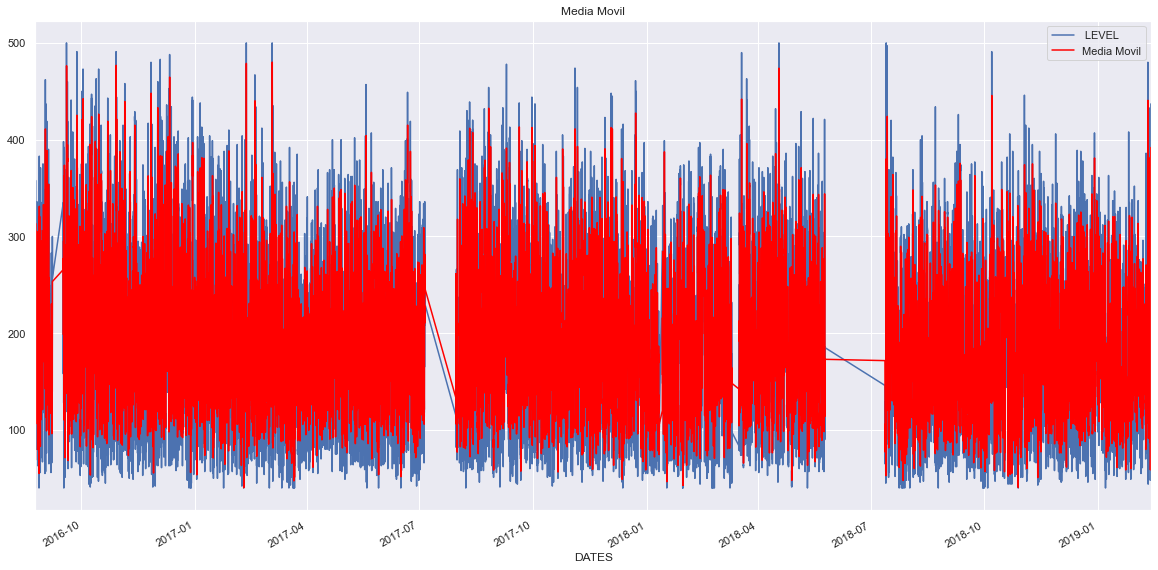

In [86]:
ts = patient_0_visual[' LEVEL']
moving_avg = patient_0_visual[' LEVEL'].rolling(12).mean()

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
patient_0_visual.plot(kind = 'line' ,ax=  ax1);
## Graficamos la media movil:
moving_avg.plot(label = 'Media Movil', color = 'red')
plt.title('Media Movil')
plt.legend(loc = 'best')

**Semanal**

In [87]:
weekly_p0 = patient_0_visual['20170301':'20170308']

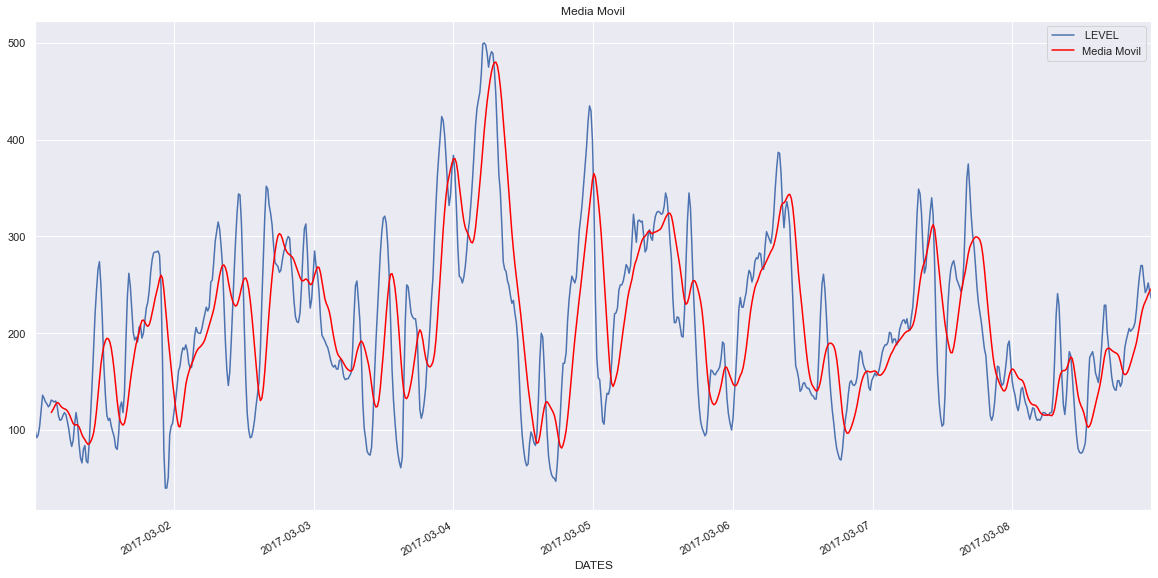

In [88]:
ts = weekly_p0[' LEVEL']
moving_avg = weekly_p0[' LEVEL'].rolling(12).mean()

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
weekly_p0.plot(kind = 'line' ,ax=  ax1);
## Graficamos la media movil:
moving_avg.plot(label = 'Media Movil', color = 'red')
plt.title('Media Movil')
plt.legend(loc = 'best')

### 9.2 Varianza
<a id="9.2"></a>

Text(0.5, 1.0, 'varianza diaria')

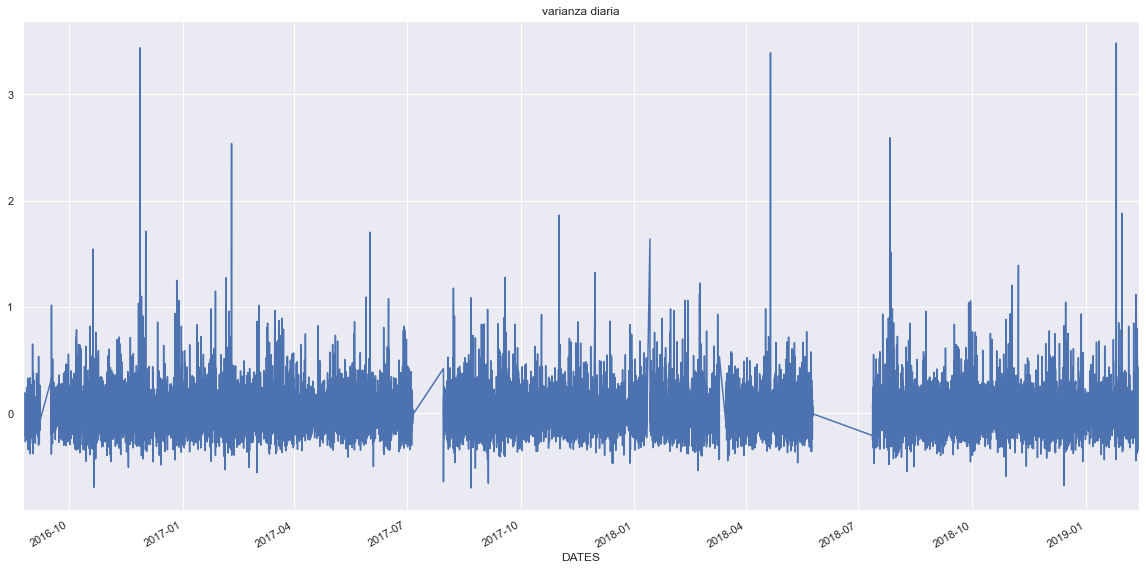

In [89]:
variacion_diaria = patient_0_visual[' LEVEL'] / patient_0_visual[' LEVEL'].shift(1) - 1 
patient_0_visual['var_diaria'] = variacion_diaria
patient_0_visual['var_diaria'][:5]

#graficamos los datos

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
patient_0_visual['var_diaria'].plot(kind = 'line' ,ax=  ax1);
plt.title('varianza diaria')

**Semanal**

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'varianza diaria')

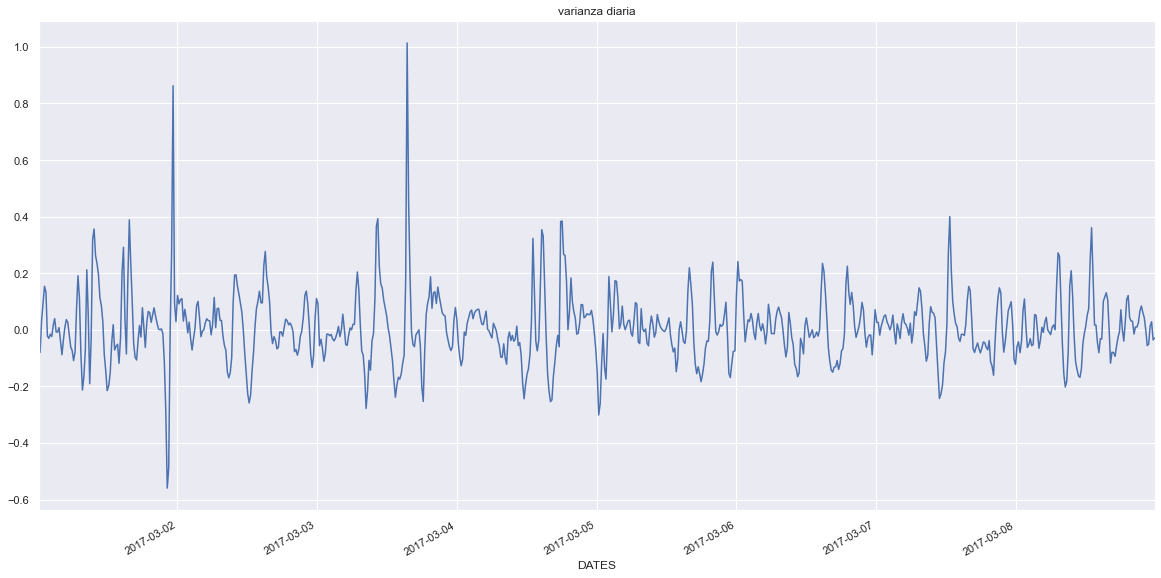

In [90]:
variacion_diaria = weekly_p0[' LEVEL'] / weekly_p0[' LEVEL'].shift(1) - 1 
weekly_p0['var_diaria'] = variacion_diaria
weekly_p0['var_diaria'][:5]

#graficamos los datos

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
weekly_p0['var_diaria'].plot(kind = 'line' ,ax=  ax1);
plt.title('varianza diaria')

### 9.3 Tendencia
<a id="9.3"></a>

Graficaremos la linea de tendencia aplicando el filtro de Hodrick-Prescott

In [91]:
ciclo, tend = sm.tsa.filters.hpfilter(patient_0_visual[' LEVEL'])
patient_0_visual['tendencia'] = tend

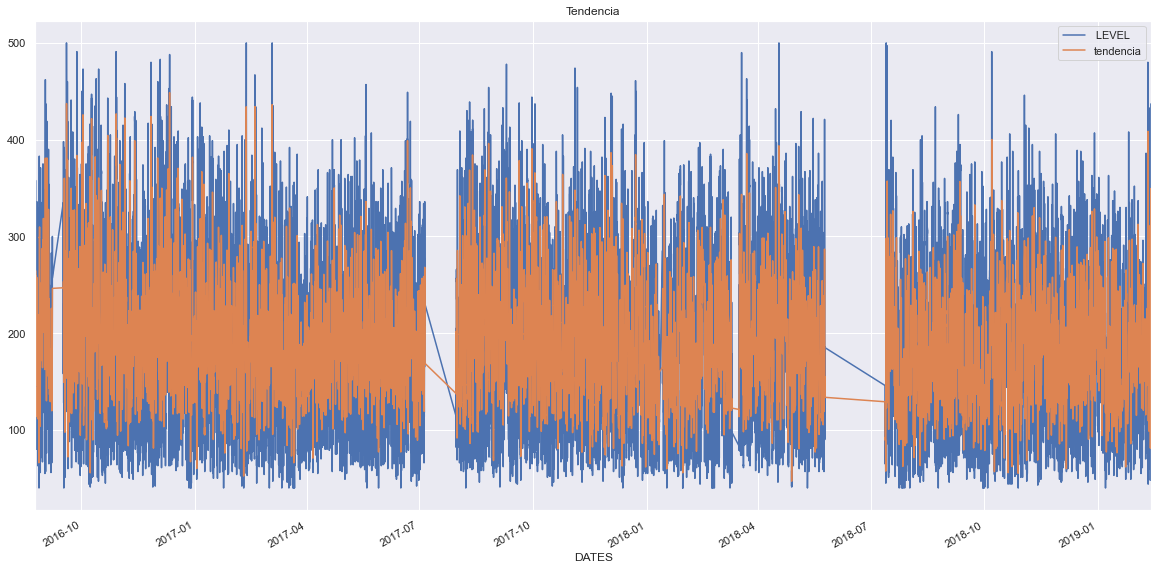

In [92]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
patient_0_visual[[' LEVEL', 'tendencia']].plot(kind = 'line' ,ax=  ax1);

## Graficamos
plt.title('Tendencia')
plt.legend(loc = 'best')

**Semanal**

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


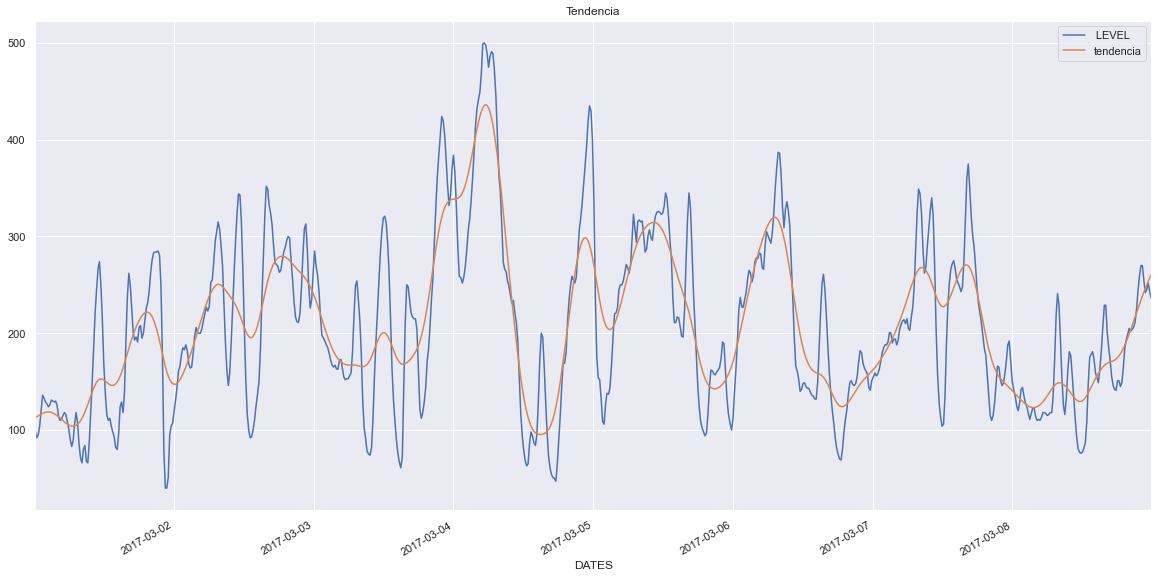

In [93]:
ciclo, tend = sm.tsa.filters.hpfilter(weekly_p0[' LEVEL'])
weekly_p0['tendencia'] = tend

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
weekly_p0[[' LEVEL', 'tendencia']].plot(kind = 'line' ,ax=  ax1);

## Graficamos
plt.title('Tendencia')
plt.legend(loc = 'best')

### 9.4 Estructura
<a id="9.4"></a>

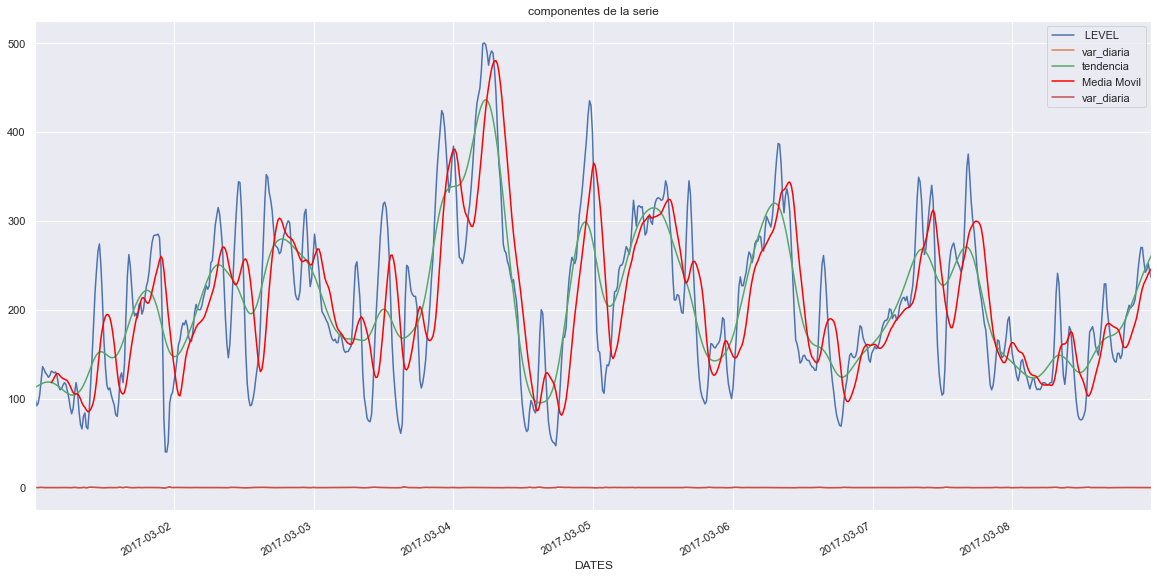

In [94]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))
weekly_p0.plot(kind = 'line' ,ax=  ax1);
## Graficamos la media movil:
moving_avg.plot(label = 'Media Movil', color = 'red')
weekly_p0['var_diaria'].plot(kind = 'line' ,ax=  ax1);
plt.title('componentes de la serie')
plt.legend(loc = 'best')

### 9.5 Descomposición de series de tiempo usando statsmodels.tsa
<a id="9.5"></a>

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


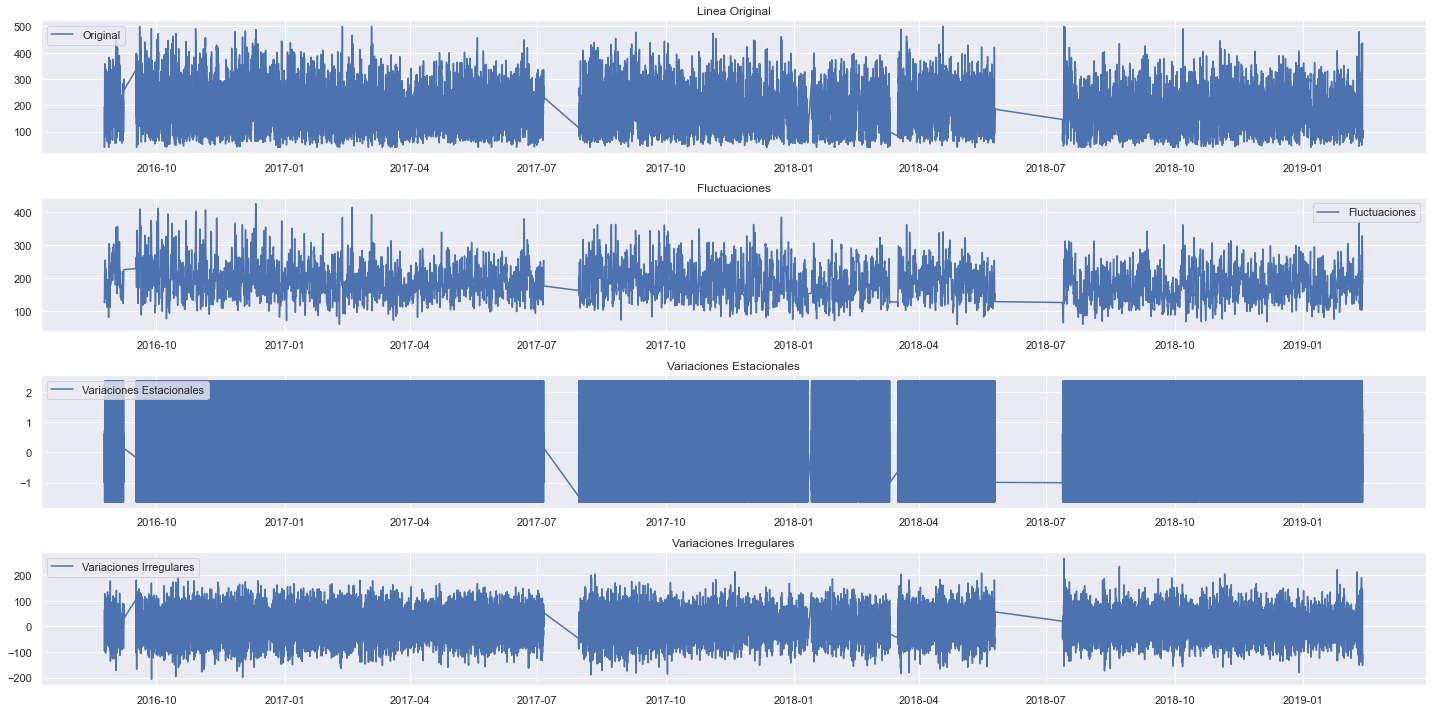

In [97]:
descomposicion = sm.tsa.seasonal_decompose(patient_0_visual[' LEVEL'], freq = 30)

trend = descomposicion.trend
seasonal = descomposicion.seasonal
residual = descomposicion.resid

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))

plt.subplot(411)
plt.plot(patient_0_visual[' LEVEL'].sort_index(), label = 'Original')
plt.title('Linea Original')
plt.legend(loc = 'best')


plt.subplot(412)
plt.plot(trend.sort_index(), label = 'Fluctuaciones')
plt.title('Fluctuaciones')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal.sort_index(), label = 'Variaciones Estacionales')
plt.title('Variaciones Estacionales')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual.sort_index(), label = 'Variaciones Irregulares')
plt.title('Variaciones Irregulares')
plt.legend(loc = 'best')

plt.tight_layout()

**Semanalmente**

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


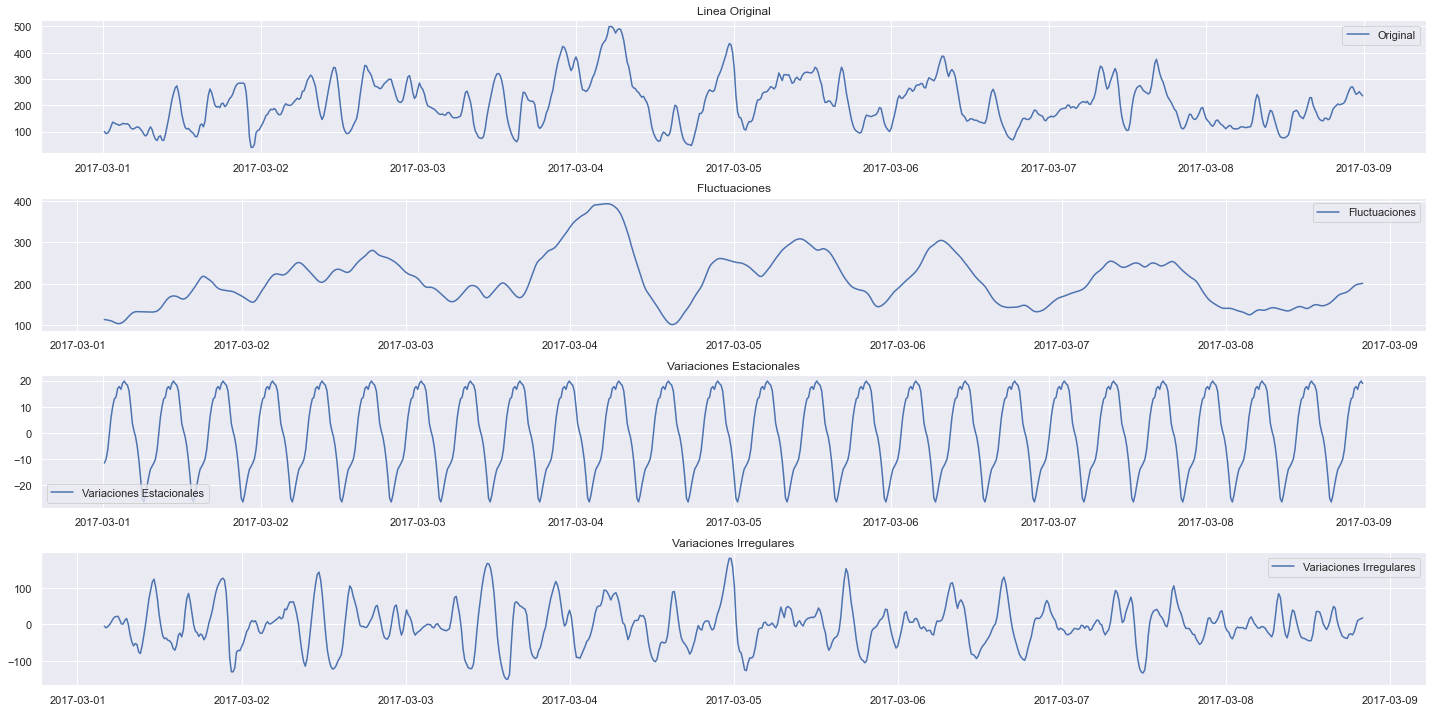

In [98]:
descomposicion = sm.tsa.seasonal_decompose(weekly_p0[' LEVEL'], freq = 30)

trend = descomposicion.trend
seasonal = descomposicion.seasonal
residual = descomposicion.resid

fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))

plt.subplot(411)
plt.plot(weekly_p0[' LEVEL'].sort_index(), label = 'Original')
plt.title('Linea Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend.sort_index(), label = 'Fluctuaciones')
plt.title('Fluctuaciones')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal.sort_index(), label = 'Variaciones Estacionales')
plt.title('Variaciones Estacionales')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual.sort_index(), label = 'Variaciones Irregulares')
plt.title('Variaciones Irregulares')
plt.legend(loc = 'best')

plt.tight_layout()

## 10. Métodos basados en suavizado exponencial
<a id="10"></a>

### 10.1 Descomposición
<a id="10.1"></a>

La eficacia de la extracción de la tendencia y el ruido estimados dependientes de otros parámetros relacionados con la composición de la señal de la serie temporal, como la presencia de tendencia, estacionalidad y residual (ruido). 

Para manejar cada uno de estos componentes de la serie de tiempo, se requieren diferentes tratamientos. Este capítulo cubrirá múltiples enfoques para suavizar el manejo de diferentes componentes de la señal de serie temporal.

Un ejemplo de una señal de serie temporal compuesta por tendencia, estacionalidad y ruido blanco se demuestra utilizando el conjunto de datos de nivele de glucosa a nivel mensual desde 2016 a 2019:

In [99]:
patient_0_descomposicion_c3 = pd.read_csv('patient0.csv')
patient_0_descomposicion_c3.dropna(inplace = True)
patient_0_descomposicion_c3['DATES'] = patient_0_descomposicion_c3['DATE'].apply(fechas)
patient_0_descomposicion_c3.drop('DATE', axis = 1, inplace = True)


patient_0_descomposicion_c3.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

# Creamos las siguientes columnas

patient_0_descomposicion_c3['Year'] = patient_0_descomposicion_c3['DATES'].dt.year
patient_0_descomposicion_c3['Month'] = patient_0_descomposicion_c3['DATES'].dt.month
patient_0_descomposicion_c3['Day'] = patient_0_descomposicion_c3['DATES'].dt.day

patient_0_descomposicion_c3.index = patient_0_descomposicion_c3['Year'].astype(str) + '-' + patient_0_descomposicion_c3['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x) + '-' + patient_0_descomposicion_c3['Day'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)

patient_0_descomposicion_c3 = patient_0_descomposicion_c3.reset_index()
patient_0_descomposicion_c3.rename(columns={'index':'Year-Month'}, inplace=True)

#Create row index of the DataFrame using the Year and Month columns
patient_0_descomposicion_c3.index = patient_0_descomposicion_c3['Year-Month']

patient_0_descomposicion_c3.head()

Year-Month  LEVEL               DATES  Year  Month  Day
Year-Month                                                         
2017-06-06  2017-06-06  156.0 2017-06-06 17:40:00  2017      6    6
2017-06-06  2017-06-06  159.0 2017-06-06 17:55:00  2017      6    6
2017-06-06  2017-06-06  170.0 2017-06-06 18:10:00  2017      6    6
2017-06-06  2017-06-06  164.0 2017-06-06 18:25:00  2017      6    6
2017-06-06  2017-06-06  147.0 2017-06-06 18:40:00  2017      6    6

In [100]:
patient_0_descomposicion_c3 = patient_0_descomposicion_c3.loc[(~pd.isnull(patient_0_descomposicion_c3['LEVEL']))&\
                (~pd.isnull(patient_0_descomposicion_c3['Year']))&\
                (~pd.isnull(patient_0_descomposicion_c3['Month']))]

patient_0_descomposicion_c3.sort_values(['Year', 'Month'], inplace=True)

patient_0_descomposicion_c3.drop('DATES', axis = 1, inplace = True)
patient_0_descomposicion_c3.drop('Year', axis = 1, inplace = True)
patient_0_descomposicion_c3.drop('Month', axis = 1, inplace = True)
patient_0_descomposicion_c3.drop('Day', axis = 1, inplace = True)

patient_0_descomposicion_c3.head()

Year-Month  LEVEL
Year-Month                   
2016-08-24  2016-08-24  194.0
2016-08-24  2016-08-24  164.0
2016-08-24  2016-08-24  126.0
2016-08-24  2016-08-24   87.0
2016-08-24  2016-08-24   65.0

La función season_decompose del módulo de modelos de estadísticas se utiliza para descomponer la señal de la serie temporal en componentes de tendencia, estacionalidad y residuales. La descomposición puede ser aditiva o multiplicativa, como se discutió en el Capítulo 2, Introducción a las series de tiempo. En la siguiente figura se muestra un ejemplo de diferentes componentes de una señal:

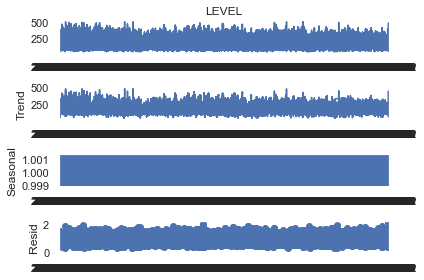

In [101]:
res = sm.tsa.seasonal_decompose(patient_0_descomposicion_c3.LEVEL, period=12, model="multiplicative")
resplot = res.plot()

### 10.2 Suavizado exponencial de primer orden
<a id="10.2"></a>

El suavizado exponencial de primer orden o el suavizado exponencial simple son adecuados con varianza constante y sin estacionalidad. El enfoque generalmente se recomienda para realizar pronósticos a corto plazo. El Capítulo 2, Comprensión de los datos de series de tiempo, ha introducido el método ingenuo para el pronóstico donde la predicción en el horizonte h se define como el valor de t (o la última observación):

xt + h = xt

In [102]:
patient_0_firstOrder = pd.read_csv('patient0.csv')
patient_0_firstOrder.dropna(inplace = True)

patient_0_firstOrder['DATES'] = patient_0_firstOrder['DATE'].apply(fechas)
patient_0_firstOrder.drop('DATE', axis = 1, inplace = True)

patient_0_firstOrder.sort_values(['DATES'], inplace=True)
patient_0_firstOrder.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_firstOrder.set_index('DATES', inplace=True, drop=True)

patient_0_firstOrder.head()

LEVEL
DATES                     
2016-08-24 15:20:00  194.0
2016-08-24 15:35:00  164.0
2016-08-24 15:50:00  126.0
2016-08-24 16:05:00   87.0
2016-08-24 16:20:00   65.0

In [103]:
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

La función single_exp_smoothing configurada con el valor pronosticado inicial se asigna como el primer valor de la serie. Primero evaluemos casos extremos de pronóstico con α = 0 y α = 1:

In [104]:
# Single exponential smoothing forecasting 

patient_0_firstOrder['SES0'] = single_exp_smoothing(patient_0_firstOrder['LEVEL'], 0) 
patient_0_firstOrder['SES1'] = single_exp_smoothing(patient_0_firstOrder['LEVEL'], 1) 

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Alpha 1')

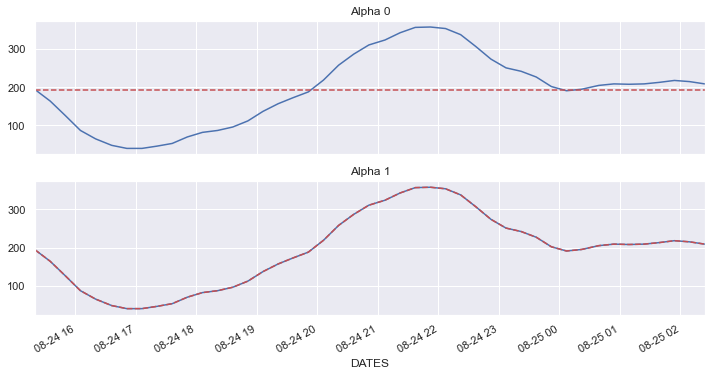

In [105]:
# Plot the curves
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12, 6)

patient_0_firstOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
patient_0_firstOrder['SES0'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0')

patient_0_firstOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
patient_0_firstOrder['SES1'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 1')

La figura anterior ilustra que, en α = 0, el valor pronosticado es una constante, y para α = 1, la serie pronosticada se desplaza en un desfase de tiempo. El pronóstico de suavizado único para un valor de suavizado 0,2 se puede evaluar de la siguiente manera:

El resultado del suavizado exponencial se puede graficar contra los datos reales, como se muestra en la siguiente figura:

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Single Exponential Smoothing')

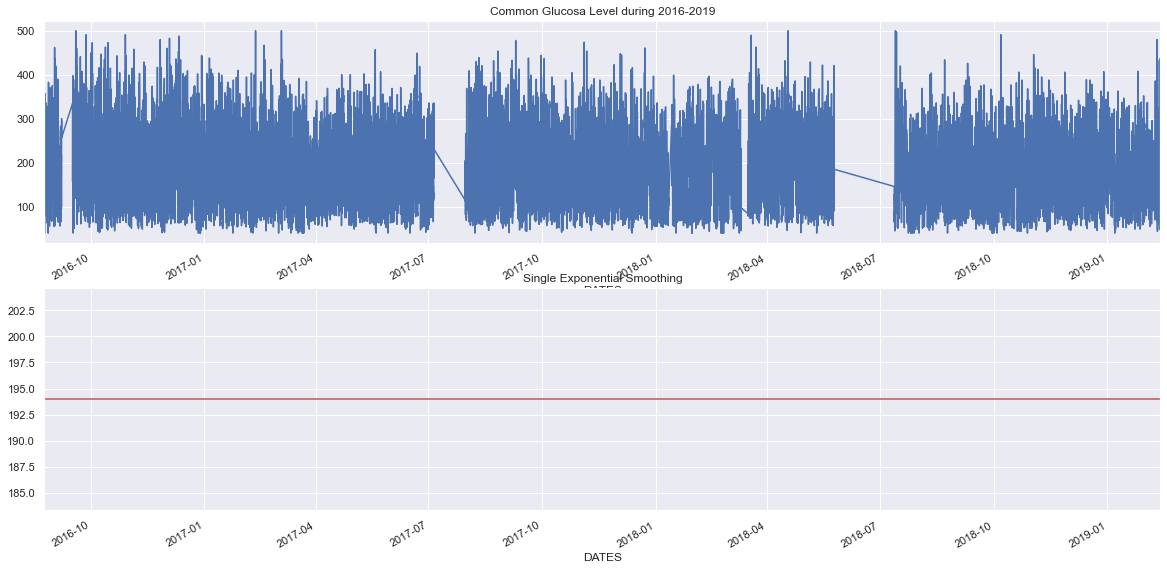

In [106]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,1,1)
patient_0_firstOrder['LEVEL'].plot(ax=ax)
ax.set_title('Common Glucosa Level during 2016-2019')
ax = fig.add_subplot(2,1,2)
patient_0_firstOrder['SES0'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Single Exponential Smoothing')

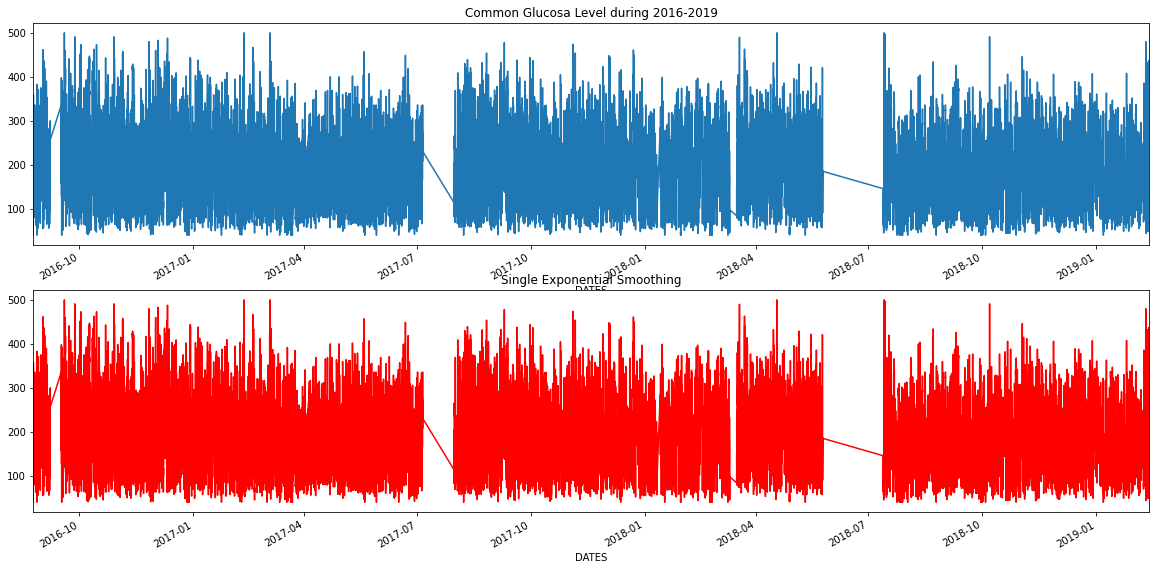

In [96]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,1,1)
patient_0_firstOrder['LEVEL'].plot(ax=ax)
ax.set_title('Common Glucosa Level during 2016-2019')
ax = fig.add_subplot(2,1,2)
patient_0_firstOrder['SES1'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')

La precisión del modelo se puede evaluar en una muestra reservada utilizando funciones objetivas estándar como el error cuadrático medio (MSE) o el error absoluto medio (MAS):


De manera similar, MAS se evalúa de la siguiente manera:
Evaluemos el efecto de α en el ajuste. Para evaluarlo, se desarrollan múltiples modelos utilizando diferentes parámetros de suavizado, como se muestra aquí:

In [107]:
patient_0_firstOrder['SES'] = single_exp_smoothing(patient_0_firstOrder['LEVEL'], 0.8)

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Single Exponential Smoothing')

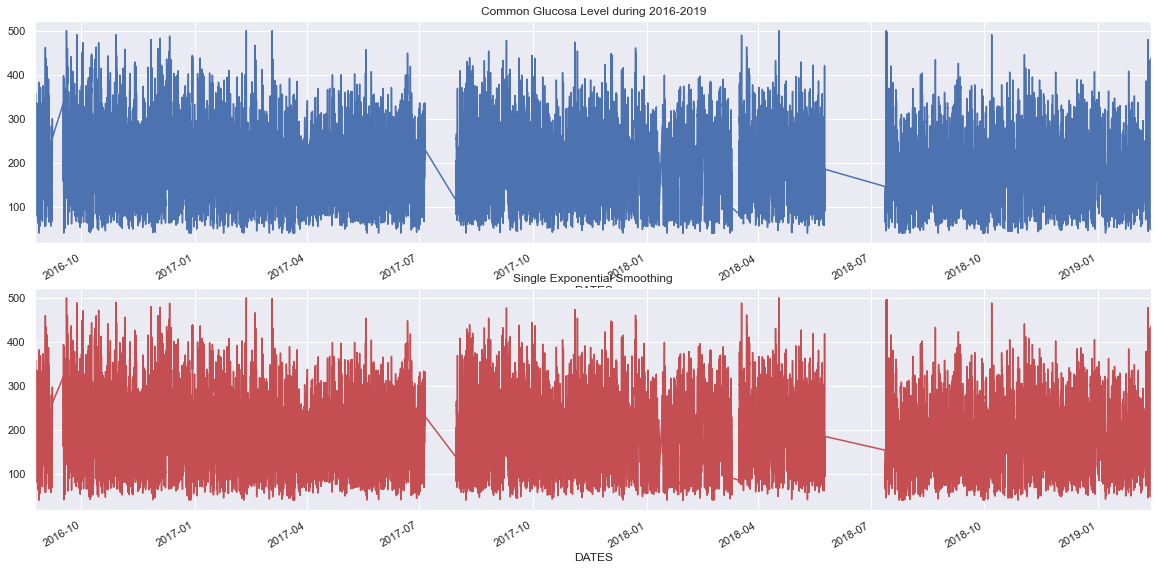

In [108]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
patient_0_firstOrder['LEVEL'].plot(ax=ax)
ax.set_title('Common Glucosa Level during 2016-2019')
ax = fig.add_subplot(2,1,2)
patient_0_firstOrder['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')

In [109]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
patient_0_firstOrder['SES2']  = single_exp_smoothing(patient_0_firstOrder['LEVEL'], 0.2)
patient_0_firstOrder['SES6']= single_exp_smoothing(patient_0_firstOrder['LEVEL'], 0.6)
patient_0_firstOrder['SES8']= single_exp_smoothing(patient_0_firstOrder['LEVEL'], 0.8)

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Alpha 0.8')

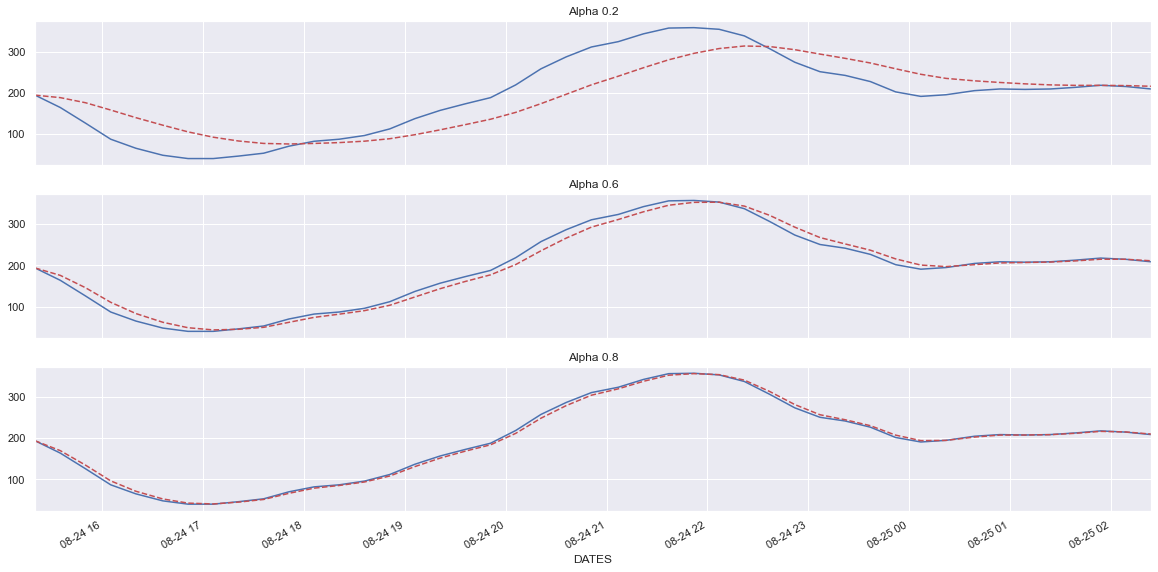

In [110]:
# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(20, 10)

patient_0_firstOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
patient_0_firstOrder['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

patient_0_firstOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
patient_0_firstOrder['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

patient_0_firstOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
patient_0_firstOrder['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')

### 10.2 Suavizado exponencial de segundo orden
<a id="10.2"></a>

xt = constante + ωt + εt

Aquí, ω es el coeficiente que conduce a la tendencia. El suavizado exponencial de segundo orden ayuda a capturar la tendencia en los datos de series de tiempo al incluir otro término para el suavizado exponencial de primer orden

In [111]:
patient_0_secondOrder = pd.read_csv('patient0.csv')
patient_0_secondOrder.dropna(inplace = True)

#Aplicamos la funcion para las fechas
patient_0_secondOrder['DATES'] = patient_0_secondOrder['DATE'].apply(fechas)
patient_0_secondOrder.drop('DATE', axis = 1, inplace = True)

patient_0_secondOrder.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

#Creamos las siguientes columnas
patient_0_secondOrder['Year'] = patient_0_secondOrder['DATES'].dt.year
patient_0_secondOrder['Month'] = patient_0_secondOrder['DATES'].dt.month
patient_0_secondOrder['Day'] = patient_0_secondOrder['DATES'].dt.day

#Definimos las estaciones
month_quarter_map = {1: 'Invierno', 2: 'Invierno', 3: 'Primavera',
                     4: 'Primavera', 5: 'Primavera', 6: 'Verano',
                     7: 'Verano', 8: 'Verano', 9: 'Otoño',
                     10: 'Otoño', 11: 'Otoño', 12: 'Invierno'
                    }
patient_0_secondOrder['Estacion'] = patient_0_secondOrder['Month'].map(lambda m: month_quarter_map.get(m))

patient_0_secondOrder.head()

LEVEL               DATES  Year  Month  Day Estacion
0  156.0 2017-06-06 17:40:00  2017      6    6   Verano
1  159.0 2017-06-06 17:55:00  2017      6    6   Verano
2  170.0 2017-06-06 18:10:00  2017      6    6   Verano
3  164.0 2017-06-06 18:25:00  2017      6    6   Verano
4  147.0 2017-06-06 18:40:00  2017      6    6   Verano

In [112]:
#Create row index of the DataFrame using the Year and Month columns
patient_0_secondOrder.index = patient_0_secondOrder['Year'].astype(str) + '-' + patient_0_secondOrder['Estacion'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
patient_0_secondOrder.head()

LEVEL               DATES  Year  Month  Day Estacion
2017-Verano  156.0 2017-06-06 17:40:00  2017      6    6   Verano
2017-Verano  159.0 2017-06-06 17:55:00  2017      6    6   Verano
2017-Verano  170.0 2017-06-06 18:10:00  2017      6    6   Verano
2017-Verano  164.0 2017-06-06 18:25:00  2017      6    6   Verano
2017-Verano  147.0 2017-06-06 18:40:00  2017      6    6   Verano

In [113]:
patient_0_secondOrder = patient_0_secondOrder.reset_index()

patient_0_secondOrder.rename(columns={'index':'QUARTER'}, inplace=True)

patient_0_secondOrder.index = patient_0_secondOrder['QUARTER']

patient_0_secondOrder.head()

QUARTER  LEVEL               DATES  Year  Month  Day Estacion
QUARTER                                                                       
2017-Verano  2017-Verano  156.0 2017-06-06 17:40:00  2017      6    6   Verano
2017-Verano  2017-Verano  159.0 2017-06-06 17:55:00  2017      6    6   Verano
2017-Verano  2017-Verano  170.0 2017-06-06 18:10:00  2017      6    6   Verano
2017-Verano  2017-Verano  164.0 2017-06-06 18:25:00  2017      6    6   Verano
2017-Verano  2017-Verano  147.0 2017-06-06 18:40:00  2017      6    6   Verano

In [114]:
patient_0_secondOrder = patient_0_secondOrder.loc[(~pd.isnull(patient_0_secondOrder['LEVEL']))&\
                (~pd.isnull(patient_0_secondOrder['Year']))&\
                (~pd.isnull(patient_0_secondOrder['Month']))]

In [115]:
patient_0_secondOrder.sort_values(['Year', 'Month'], inplace=True)

In [116]:
patient_0_secondOrder.drop('DATES', axis = 1, inplace = True)
patient_0_secondOrder.drop('Year', axis = 1, inplace = True)
patient_0_secondOrder.drop('Month', axis = 1, inplace = True)
patient_0_secondOrder.drop('Estacion', axis = 1, inplace = True)
patient_0_secondOrder.drop('Day', axis = 1, inplace = True)

patient_0_secondOrder.head()

QUARTER  LEVEL
QUARTER                        
2016-Verano  2016-Verano  194.0
2016-Verano  2016-Verano  164.0
2016-Verano  2016-Verano  126.0
2016-Verano  2016-Verano   87.0
2016-Verano  2016-Verano   65.0

In [117]:
# funcion 
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

La función anterior toma series de tiempo como entrada con alfa y beta. La implementación anterior utiliza la diferencia de las dos primeras ocurrencias para configurar el valor de tendencia inicial.

Evaluemos el rendimiento en casos de límite de alfa beta, es decir, valores (0,0), (0,1), (1,0) y (1,1) de los parámetros de suavizado alfa y beta:

In [118]:
# Effect of alpha and beta    

patient_0_secondOrder['DEF00'] = double_exp_smoothing(patient_0_secondOrder['LEVEL'],0, 0)   
patient_0_secondOrder['DEF01'] = double_exp_smoothing(patient_0_secondOrder['LEVEL'],0, 1)    
patient_0_secondOrder['DEF10'] = double_exp_smoothing(patient_0_secondOrder['LEVEL'],1, 0)   
patient_0_secondOrder['DEF11'] = double_exp_smoothing(patient_0_secondOrder['LEVEL'],1, 1)

El resultado del script anterior para ajustar el suavizado exponencial de segundo orden se muestra en la siguiente figura:

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Alpha 1 and Beta 1')

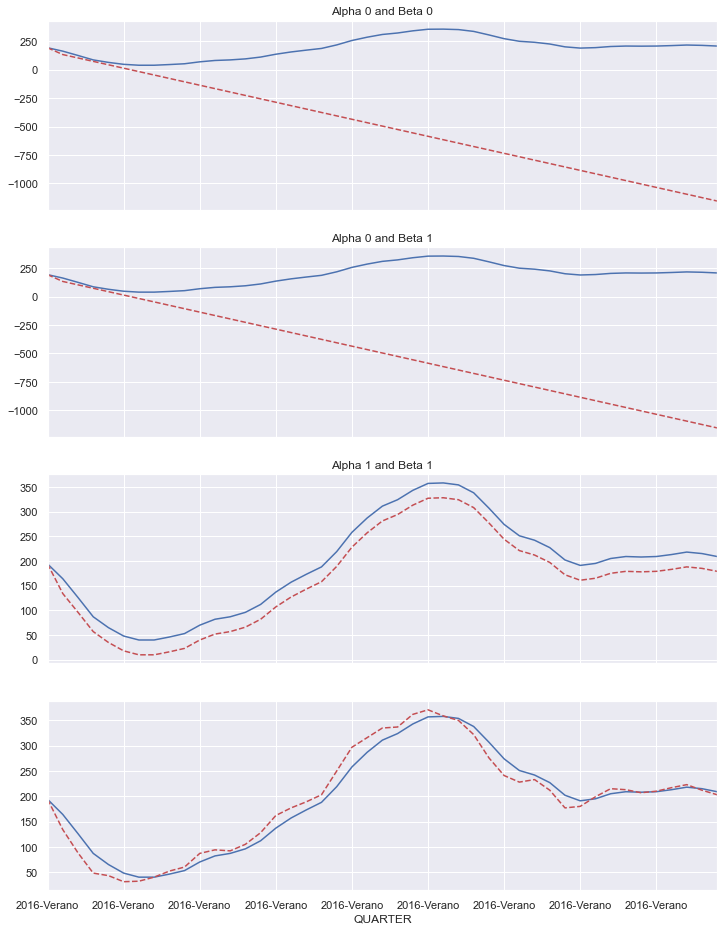

In [119]:
# Plot the curves
f, axarr = plt.subplots(4, sharex=True)
f.set_size_inches(12, 16)

patient_0_secondOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
patient_0_secondOrder['DEF00'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0 and Beta 0')

patient_0_secondOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
patient_0_secondOrder['DEF01'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0 and Beta 1' )

patient_0_secondOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
patient_0_secondOrder['DEF10'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 1 and Beta 0')

patient_0_secondOrder['LEVEL'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[3])
patient_0_secondOrder['DEF11'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[3])
axarr[2].set_title('Alpha 1 and Beta 1')

Realicemos un suavizado exponencial doble en los datos de la cerveza utilizando valores intermedios de α y β de la siguiente manera:

In [120]:
patient_0_secondOrder['DEF'] = double_exp_smoothing(patient_0_secondOrder['LEVEL'], 0.4, 0.7)

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Double Smoothing Forecast')

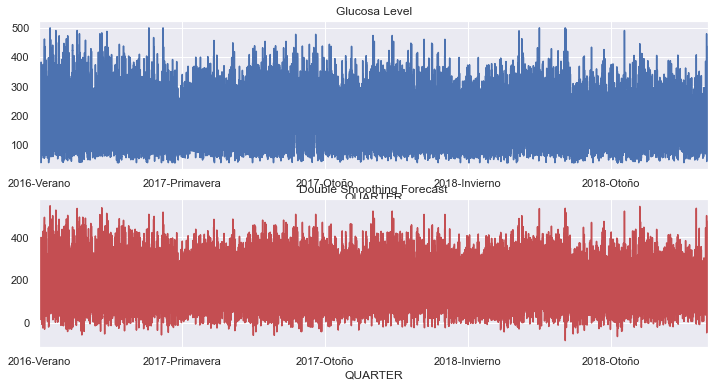

In [121]:
# Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(2,1,1)
patient_0_secondOrder['LEVEL'].plot(ax=ax)
ax.set_title('Glucosa Level')
ax = fig.add_subplot(2,1,2)
patient_0_secondOrder['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

Comparemos también el rendimiento del suavizado exponencial simple y doble:

In [122]:
# Single vs Double Forecast value
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

In [123]:
patient_0_secondOrder['Single_Exponential_Forecast'] = single_exp_smoothing(patient_0_secondOrder['LEVEL'], 0.4)

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

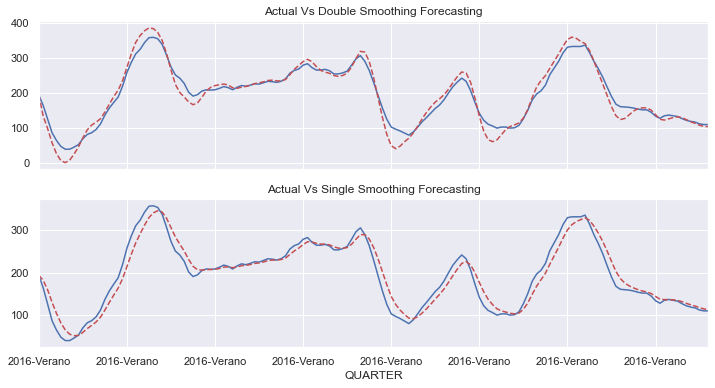

In [124]:
### Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12, 6)
patient_0_secondOrder['LEVEL'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
patient_0_secondOrder['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

patient_0_secondOrder['LEVEL'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
patient_0_secondOrder['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')

La figura anterior muestra que el suavizado exponencial doble es capaz de capturar mejor la variación de la señal real para el conjunto de datos actual en comparación con el suavizado exponencial simple. Sin embargo, en escenarios donde el componente de tendencia tiende a cero, el desempeño del enfoque de suavizado exponencial simple y doble es comparable.

In [20]:
patient_0_dif = pd.read_csv('patient0.csv')
patient_0_dif.dropna(inplace = True)
patient_0_dif['DATES'] = patient_0_dif['DATE'].apply(fechas)
patient_0_dif.drop('DATE', axis = 1, inplace = True)

patient_0_dif.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_dif = patient_0_dif.drop_duplicates()

In [22]:
patient_0_dif = patient_0_dif.set_index('DATES')

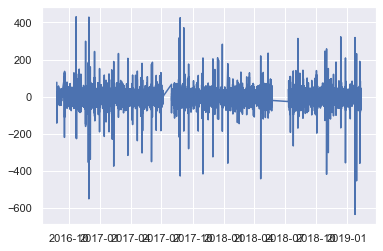

In [26]:
from pandas import datetime
from matplotlib import pyplot

patient_0_dif = patient_0_dif.diff()
plt.figure(fisize = (20, 10))
patient_0_dif.sort_index().plot()
plt.show()

## 11. Modelos auto-regresivos
<a id="11"></a>



En el capítulo anterior, se cubrieron las técnicas de pronóstico basadas en suavizado exponencial, que se basan en el supuesto de que las series de tiempo se componen en términos deterministas y estocásticos. El componente aleatorio es cero con el número de observaciones consideradas para el pronóstico. Esto supone que el ruido aleatorio es verdaderamente aleatorio y sigue una distribución idéntica independiente. Sin embargo, esta suposición a menudo tiende a violarse y suavizar no es suficiente para modelar el proceso y establecer un modelo de pronóstico. 


En estos escenarios, los modelos autoregresivos pueden ser muy útiles ya que estos modelos se ajustan inmediatamente utilizando los valores de retardo anteriores al aprovechar la correlación serial inherente entre las observaciones. Este capítulo presenta conceptos de pronóstico utilizando modelos autoregresivos. 

El modelo auto-regresivo incluye términos auto-regresivos o términos de promedio móvil. Según los componentes utilizados, existen múltiples enfoques que se pueden utilizar en la predicción de series de tiempo, como la media móvil (MA), la media móvil autorregresiva (ARMA) y la media móvil integrada autorregresiva (ARIMA). El MA en este capítulo es diferente del suavizado de promedio móvil discutido en el Capítulo 2, Comprensión de los datos de series de tiempo. El MA, o más apropiadamente MA (q) con orden q, es un modelo de promedio móvil autoregresivo basado en la regresión del retraso del error.

El capítulo actual se centra en el modelo autoregresivo y cubrirá los siguientes temas: 


* Auto-regresiva (AR)


* Media móvil (MA)


* Media móvil autorregresiva (ARMA)


* Media móvil integrada autorregresiva (ARIMA) 

### 11.1 Modelo Autoregresivo (AR)
<a id="11.1"></a>

El Modelo Autorregresivo establece que el valor actual de la serie de tiempo es una regresion lineal que depende de los valores anteriores y de un termino de error o ruido estocastico.

- Si el coeficiente es > 1, la serie es estacionaria
- Si el coeficiente es < 1, la serie no es estacionaria

**AR(1)**

In [125]:
from __future__ import print_function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [126]:
patient_0_AR1 = pd.read_csv('patient0.csv')
patient_0_AR1.dropna(inplace = True)
patient_0_AR1['DATES'] = patient_0_AR1['DATE'].apply(fechas)
patient_0_AR1.drop('DATE', axis = 1, inplace = True)

patient_0_AR1.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

In [127]:
ar1model = smtsa.ARMA(patient_0_AR1['LEVEL'].tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=96, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                93657
Model:                     ARMA(1, 0)   Log Likelihood             -407364.119
Method:                           mle   S.D. of innovations             18.738
Date:                Mon, 07 Sep 2020   AIC                         814732.238
Time:                        16:31:56   BIC                         814751.133
Sample:                             0   HQIC                        814737.989
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9959      0.000   3374.311      0.000       0.995       0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0041           +0.0000j            1.0041            0.0000
-----------------------------------------------------------------------------
"""

Como podemos apreciar el coeficiente es menor que 1, por lo que se sigue manteniendo que la serie es estacionaria

**AR(2)**

In [128]:
ar2model = smtsa.ARMA(patient_0_AR1['LEVEL'].tolist(), order=(2, 0))
ar2=ar2model.fit(maxlag=96, method='mle', trend='nc')
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                93657
Model:                     ARMA(2, 0)   Log Likelihood             -372637.222
Method:                           mle   S.D. of innovations             12.933
Date:                Mon, 07 Sep 2020   AIC                         745280.444
Time:                        16:32:01   BIC                         745308.786
Sample:                             0   HQIC                        745289.071
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.7166      0.002    761.167      0.000       1.712       1.721
ar.L2.y       -0.7236      0.002   -320.869      0.000      -0.728      -0.719
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0284           +0.0000j            1.0284            0.0000
AR.2            1.3438           +0.0000j            1.3438            0.0000
-----------------------------------------------------------------------------
"""

**AR(3)**

In [129]:
ar3model = smtsa.ARMA(patient_0_AR1['LEVEL'].tolist(), order=(3, 0))
ar3=ar3model.fit(maxlag=96, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                93657
Model:                     ARMA(3, 0)   Log Likelihood             -367587.964
Method:                           mle   S.D. of innovations             12.254
Date:                Mon, 07 Sep 2020   AIC                         735183.928
Time:                        16:32:07   BIC                         735221.718
Sample:                             0   HQIC                        735195.430
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.9479      0.003    629.158      0.000       1.942       1.954
ar.L2.y       -1.2724      0.006   -222.136      0.000      -1.284      -1.261
ar.L3.y        0.3197      0.003    103.262      0.000       0.314       0.326
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0134           -0.0000j            1.0134           -0.0000
AR.2            1.4833           -0.9414j            1.7568           -0.0900
AR.3            1.4833           +0.9414j            1.7568            0.0900
-----------------------------------------------------------------------------
"""

### 11.2 Modelo de Media Movil (MA)
<a id="11.2"></a>

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

**MA(1)**

In [131]:
patient_0_MA1 = pd.read_csv('patient0.csv')
patient_0_MA1.dropna(inplace = True)
patient_0_MA1['DATES'] = patient_0_MA1['DATE'].apply(fechas)
patient_0_MA1.drop('DATE', axis = 1, inplace = True)

patient_0_MA1.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_MA1 = patient_0_MA1.drop_duplicates()

patient_0_MA1.set_index('DATES', inplace=True, drop=True)

In [134]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=96, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=96, ax=ax_acf)
    plot_pacf(xt, lags=96, ax=ax_pacf)
    plt.tight_layout()
    return None

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

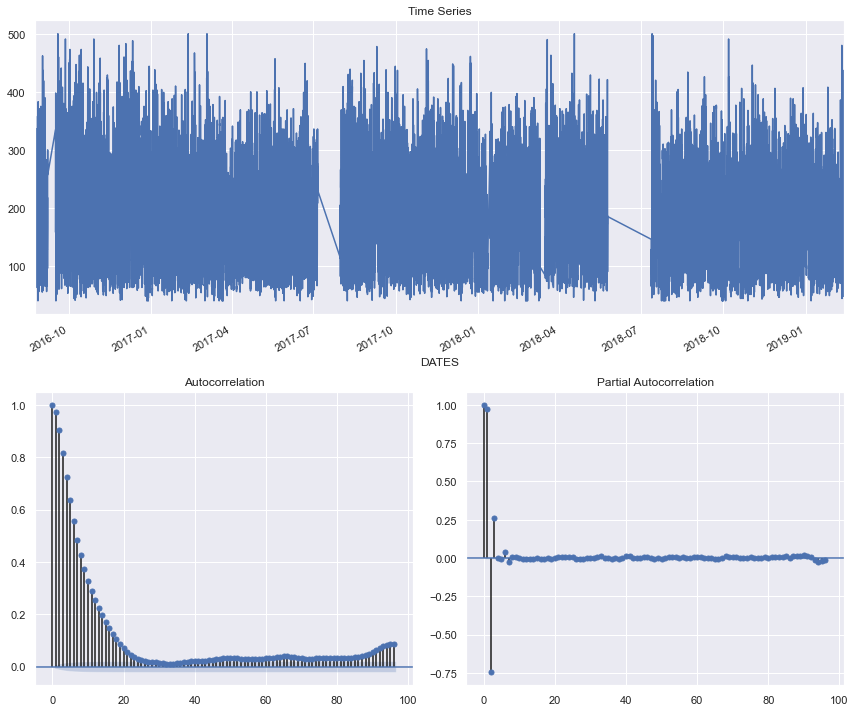

In [135]:
plotds(patient_0_MA1['LEVEL'])

In [136]:
ma1 = smtsa.ARMA(patient_0_MA1['LEVEL'].tolist(), order=(0, 1)).fit(
    maxlag=96, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                93657
Model:                     ARMA(0, 1)   Log Likelihood             -569460.464
Method:                           mle   S.D. of innovations            105.776
Date:                Mon, 07 Sep 2020   AIC                        1138924.928
Time:                        16:33:09   BIC                        1138943.823
Sample:                             0   HQIC                       1138930.679
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.9807      0.000   2144.483      0.000       0.980       0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0196           +0.0000j            1.0196            0.5000
-----------------------------------------------------------------------------
"""

### 11.3 Modelos ARMA
<a id="12.3"></a>

In [18]:
from statsmodels.tsa import arima_process

In [14]:
patient_0_ARMA = pd.read_csv('patient0.csv')
patient_0_ARMA.dropna(inplace = True)
patient_0_ARMA['DATES'] = patient_0_ARMA['DATE'].apply(fechas)
patient_0_ARMA.drop('DATE', axis = 1, inplace = True)


patient_0_ARMA.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_ARMA['Year'] = patient_0_ARMA['DATES'].dt.year
patient_0_ARMA['Month'] = patient_0_ARMA['DATES'].dt.month

patient_0_ARMA.head()

LEVEL               DATES  Year  Month
0  156.0 2017-06-06 17:40:00  2017      6
1  159.0 2017-06-06 17:55:00  2017      6
2  170.0 2017-06-06 18:10:00  2017      6
3  164.0 2017-06-06 18:25:00  2017      6
4  147.0 2017-06-06 18:40:00  2017      6

In [15]:
patient_0_ARMA = patient_0_ARMA.drop_duplicates()

In [16]:
patient_0_ARMA_17 = patient_0_ARMA[patient_0_ARMA.Year == 2017]
patient_0_ARMA_17.set_index('DATES', inplace=True, drop=True)

**ARMA(1,1)**

In [20]:
ar1ma1 = ARIMA(patient_0_ARMA_17['LEVEL'].tolist(), order=(1, 0, 1)).fit()
print(ar1ma1.params)

[193.2732404    0.95710131   0.66590621]


### 12.4 Modelos ARIMA
<a id="12.4"></a>

### ARIMA paciente 0 año 2017

In [10]:
patient_0_ARIMA = pd.read_csv('patient0.csv')
patient_0_ARIMA.dropna(inplace = True)
patient_0_ARIMA['DATES'] = patient_0_ARIMA['DATE'].apply(fechas)
patient_0_ARIMA.drop('DATE', axis = 1, inplace = True)


patient_0_ARIMA.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_ARIMA['Year'] = patient_0_ARIMA['DATES'].dt.year
patient_0_ARIMA['Month'] = patient_0_ARIMA['DATES'].dt.month

patient_0_ARIMA.head()

LEVEL               DATES  Year  Month
0  156.0 2017-06-06 17:40:00  2017      6
1  159.0 2017-06-06 17:55:00  2017      6
2  170.0 2017-06-06 18:10:00  2017      6
3  164.0 2017-06-06 18:25:00  2017      6
4  147.0 2017-06-06 18:40:00  2017      6

In [11]:
patient_0_ARIMA.shape

(93657, 4)

In [12]:
patient_0_ARIMA = patient_0_ARIMA.drop_duplicates()

In [13]:
patient_0_ARIMA.shape

(76114, 4)

In [14]:
patient_0_ARIMA_16 = patient_0_ARIMA[patient_0_ARIMA.Year == 2016]
patient_0_ARIMA_16.set_index('DATES', inplace=True, drop=True)

patient_0_ARIMA_17 = patient_0_ARIMA[patient_0_ARIMA.Year == 2017]
patient_0_ARIMA_17.set_index('DATES', inplace=True, drop=True)

patient_0_ARIMA_18 = patient_0_ARIMA[patient_0_ARIMA.Year == 2018]
patient_0_ARIMA_18.set_index('DATES', inplace=True, drop=True)

patient_0_ARIMA_19 = patient_0_ARIMA[patient_0_ARIMA.Year == 2019]
patient_0_ARIMA_19.set_index('DATES', inplace=True, drop=True)

### Division en Train y Test mediante la siguiente Funcion

Seleccionamos como train todos los datos correspondientes al año 2017, y llevaremos a cabo la misma funcion con el test, para el cual seleccionaremos los datos correspondientes al año 2018

In [15]:
datos_arima = patient_0_ARIMA_17

datos_arima.drop(['Year', 'Month'], axis = 1, inplace = True)

datos_arima.head()

LEVEL
DATES                     
2017-06-06 17:40:00  156.0
2017-06-06 17:55:00  159.0
2017-06-06 18:10:00  170.0
2017-06-06 18:25:00  164.0
2017-06-06 18:40:00  147.0

**Definimos la funcion de division de los datos:**

Para poder continur realizando predicciones acertadas con los modelos ARIMA, sera necesario llevar a cabo una division del train y el test, para lo que se tomaran una cantidad de observaciones mas pequeña que las que se habian impletementado en el modelo ARIMA anterior. Esto se debe a que en el caso anterior, los modelos que se ejecutaban, no permitian realizar predicciones futuras, y para poder llevar estas a cabo, se debe emplear un modelo autoarima, para el cual no podemos introducir un volumen de datos tan grande como en el caso anterior, ya que en este caso la busqueda de hiperparametros se realiza de manera automatica. Por este motivo se emplearan como train los datos correspondientes a una semana de observaciones, es decir 672 registros, y de test los correspondientes a una hora (4 registros).


In [16]:
datos_arima.sort_index().head()

LEVEL
DATES                     
2017-01-01 00:08:00  187.0
2017-01-01 00:23:00  168.0
2017-01-01 00:39:00  160.0
2017-01-01 00:54:00  158.0
2017-01-01 01:09:00  159.0

In [17]:
from math import ceil
def split(data, x_size, y_size, gap, overlap):
    assert overlap < x_size
    size = data.shape[0]
    n_bloques = ceil((size + 1 - y_size - x_size - gap) / (x_size - overlap))

    result_train = []
    result_test = []

    for i in range(n_bloques):
        X = data[(i * (x_size - overlap)): 
                     i * (x_size - overlap) + x_size]
                
        y = data[i * (x_size - overlap) + x_size + gap:
                    i * (x_size - overlap) + x_size + gap + y_size]
        
        result_train.append(pd.DataFrame(X))
        result_test.append(pd.DataFrame(y))
        
    return(result_train, result_test)

In [18]:
x_window_size = int(24*60*1/15)
gap = 1
y_window_size = 1
X_train, y_train = split(datos_arima.LEVEL, x_size=x_window_size, y_size=y_window_size, gap=gap, overlap= 5)

### Modelo

Para llevar a cabo el modelo, sera necesario establecer una funcion que permita entrenar y testear el modelo constantemente, ya que al haber realizado una funcion de division de train y test, no tendria validez alguna entrenar el modelo con todos los datos y luego testear las divisiones que se hn llevado a cabo del test. Por este motivo se realizara una funcion que entrene el modelo y prediga los proximos 4 valores con el fin de obtener un data frame en el cual se encuentren las observaciones reales y las predichas, para asi poder ver el acierto del modelo.


In [19]:
from pmdarima import auto_arima

In [20]:
size = datos_arima.shape[0]
x_size = int(24*60*1/15)
gap = 1
y_size = 1
overlap = 5
n_bloques = ceil((size + 1 - y_size - x_size - gap) / (x_size - overlap)) 
predicciones_arima = []
n_bloques

349

In [21]:
size = datos_arima.shape[0]
x_size = int(24*60*1/15)
gap = 1
y_size = 1
overlap= 5
n_bloques = ceil((size + 1 - y_size - x_size - gap) / (x_size - overlap)) 
predicciones_arima = []
for i in range(n_bloques):
    stepwise_model = auto_arima(X_train[i].sort_index(), start_p=1, start_q=1,
                           max_p=100, max_q=100, m=96,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    stepwise_model.fit(X_train[i])
    future_forecast = stepwise_model.predict(n_periods = 2)
    train = X_train[i]
    test = y_train[i]
    test['PREDICCION'] = future_forecast[1]
    prediccion_df = pd.concat([test, train], axis = 0)
    predicciones_arima.append(prediccion_df)

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=675.379, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=780.688, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=712.096, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=695.686, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=778.713, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=676.497, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=676.779, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=677.484, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=685.340, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=673.393, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=693.716, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=710.100, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=674.515, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=674.795, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=779.798, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=680.097, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=691.067, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=779.297, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=654.168, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=654.178, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=664.076, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=660.314, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=650.313, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=690.046, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=678.113, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=652.285, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=652.292, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=662.602, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]     

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=715.849, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=716.010, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=721.098, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=726.553, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=712.379, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=740.028, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=755.496, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=714.046, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=714.193, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=719.530, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=724.951, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=710.421, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=712.248, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=714.587, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=798.499, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=693.827, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=701.465, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=796.512, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=660.674, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=660.687, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=673.081, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=669.903, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=656.715, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=699.472, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=691.831, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=658.675, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=658.688, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=671.083, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=799.690, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=678.428, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=681.074, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=679.903, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=681.122, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=681.039, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=676.543, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=686.620, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=679.225, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=678.026, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=676.189, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=679.204, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=675.127, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=732.966, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=819.911, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.004, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=749.409, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=817.950, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=732.268, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=731.887, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=733.160, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=733.629, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=729.925, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=753.024, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=731.194, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=730.300, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=730.991, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=731.6

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=832.317, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=753.455, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=756.389, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=830.330, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=724.817, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=724.279, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=726.041, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=725.687, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=722.332, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=751.516, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=724.094, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=722.874, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=724.836, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=723.746, Time=0.14 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.372 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=732.212, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=817.324, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=753.648, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=749.515, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=815.421, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=727.485, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=725.632, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=727.515, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=729.386, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=723.703, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=751.734, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=725.588, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=725.559, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=730.315, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=727.4

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.830, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=805.690, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=819.503, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=855.889, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=806.583, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=803.723, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=804.600, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=804.845, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=817.512, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=796.286, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=798.154, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=798.141, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=806.469, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=805.571, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=796.079, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=797.406, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=881.985, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=748.626, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=746.668, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=748.647, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=749.189, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=744.668, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=794.083, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=746.647, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=746.626, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=757.586, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=747.190, Time=0.08 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.891 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770.427, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=761.874, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.531, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=740.076, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=739.899, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=741.143, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=741.611, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=738.074, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=768.429, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=739.280, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=738.193, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=741.493, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=739.751, Time=0.12 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.052 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=779.513, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.648, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=793.901, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=800.367, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.825, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=773.160, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=771.476, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=773.169, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=774.969, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=769.554, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=791.910, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=771.262, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=771.256, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=777.537, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=773.0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=714.526, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=706.452, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=808.068, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=655.586, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=682.090, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=657.289, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=657.283, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=655.409, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=664.828, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=657.222, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=655.944, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=658.836, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=653.622, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=663.280, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=656.092, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=704.086, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=812.140, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.192, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=726.900, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=810.495, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=706.002, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.018, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=710.841, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=715.878, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=707.940, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=702.133, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=725.097, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=729.218, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=704.045, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=704.061, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=822.583, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=745.319, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=739.683, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=820.584, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=710.668, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=717.847, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=712.551, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=712.578, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=710.762, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=711.989, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=714.393, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=708.669, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=710.107, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=715.848, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=710.551, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=793.175, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=689.061, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=701.555, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=791.178, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=670.535, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=671.647, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=672.229, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=673.430, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=672.079, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=668.535, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=670.129, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=669.648, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=667.497, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=670.455, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=666.082, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=672.193, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=661.442, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=664.795, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=661.915, Time=0.32 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=657.866, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=664.494, Time=0.33 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=665.423, Time=1.08 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=659.457, Time=0.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=665.869, Time=0.46 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=655.979, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=662.641, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=670.380, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=812.752, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=705.075, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=720.533, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=810.955, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=665.666, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=663.710, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=665.690, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=665.486, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=661.981, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=703.087, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=663.949, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=663.914, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=668.439, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=663.7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=754.332, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=860.792, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=760.863, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=786.588, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.888, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=755.170, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=756.005, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=771.138, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=753.260, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=755.186, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=751.726, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=759.223, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=753.660, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=753.647, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=776.723, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=827.527, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=786.268, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782.633, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=825.548, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=777.828, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=774.084, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=774.346, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=775.785, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=775.653, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=777.612, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=772.085, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=772.350, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=774.732, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=712.425, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=812.581, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=744.347, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=730.857, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=810.893, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=713.134, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=713.795, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=714.527, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=713.511, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=710.555, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=706.782, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=714.305, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=703.598, Time=0.96 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=704.274, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.626, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=724.569, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=730.355, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.922, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=705.471, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=705.825, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=714.594, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=710.262, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=702.274, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=728.464, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=722.590, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=703.474, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=703.827, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=830.368, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=765.866, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=744.607, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=828.419, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=712.754, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=717.482, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=713.817, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=714.151, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=718.372, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=714.793, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=715.756, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=710.754, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=719.103, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=715.483, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=711.817, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=819.083, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=845.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=821.448, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=819.334, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.326, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=818.684, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=817.126, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=818.745, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=820.651, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=815.151, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=819.449, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=816.784, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=816.767, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=817.088, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=818.688, Time=0.15 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=721.665, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=826.803, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=741.299, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=750.716, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=825.492, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=722.287, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=722.667, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=726.454, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.799, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=719.838, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=749.189, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=739.521, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=720.460, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=720.847, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=705.470, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.721, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.774, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=740.305, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.722, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=699.617, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=712.425, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=701.518, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.712, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=706.586, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=697.617, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=703.470, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=710.442, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=699.199, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=812.084, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=734.978, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=728.544, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=810.178, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=696.169, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=701.465, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=698.054, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=693.711, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=696.475, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=695.344, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=696.437, Time=0.56 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=691.978, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=728.640, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=848.370, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=773.982, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=759.256, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=846.965, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=729.156, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=728.946, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=733.001, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=727.246, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=729.239, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=722.512, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=717.232, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=722.327, Time=0.28 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=719.197, Time=0.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=717.702, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] i

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=704.418, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=844.347, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=743.438, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.197, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=842.426, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=699.995, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=704.364, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=701.877, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.188, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=702.785, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=698.018, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=702.442, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=702.383, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=733.075, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=823.675, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=688.429, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=688.568, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=688.080, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=689.674, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=688.448, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=687.480, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=685.504, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=690.749, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=687.483, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=690.873, Time=0.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=689.503, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=683.510, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=688.770, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=796.408, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=806.494, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=794.526, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=795.597, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=805.641, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=796.391, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=798.382, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=793.149, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=795.041, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=795.052, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=794.383, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=797.035, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.019 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.298, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=653.578, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=656.886, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=736.534, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=634.456, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=634.352, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=639.861, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=646.184, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=636.346, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=631.406, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=654.935, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=651.700, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=632.573, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=632.471, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=637.938, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=644.289, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.179, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=665.522, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=750.316, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=632.514, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=639.630, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=633.671, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=633.656, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=637.793, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=630.607, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=631.882, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=637.674, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=631.740, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=725.396, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.097, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=758.816, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.616, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.225, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=726.055, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=726.607, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=730.227, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=731.768, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=727.439, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=723.445, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=749.717, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=756.940, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=724.091, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=724.649, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=712.255, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=841.736, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=746.453, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=754.478, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=840.294, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=708.956, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=714.110, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=710.676, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=709.137, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=707.201, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=712.836, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=709.151, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=708.876, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=705.297, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=786.557, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=880.169, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=717.978, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.248, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=719.609, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=718.001, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=720.351, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=720.722, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=715.986, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=727.590, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=719.258, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=717.618, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=716.040, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=774.290, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=691.480, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=829.389, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=750.090, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=732.840, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=827.710, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=679.591, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=697.947, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=681.579, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=681.580, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=683.404, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=686.602, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=683.578, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=677.712, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=689.566, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=696.063, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=784.835, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=717.728, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=727.688, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=783.688, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=710.472, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=709.955, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=709.264, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=710.428, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=711.705, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=707.650, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=726.287, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=708.246, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=708.763, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=707.777, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=709.983, Time=0.18 sec

Best model:  ARIMA(0,1,2

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=725.970, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=836.621, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=747.207, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=756.870, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=834.643, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=727.133, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=726.869, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=730.833, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=730.043, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=728.720, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=723.973, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=754.886, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=745.207, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=725.137, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=724.872, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=847.213, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=943.452, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=870.315, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=866.667, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=941.513, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=849.006, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=849.113, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=852.446, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=850.749, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=845.236, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=864.716, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=868.334, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=847.030, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=847.136, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=739.792, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.505, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=777.349, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=768.784, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=855.560, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=734.452, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=739.907, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=736.339, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=735.696, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=734.111, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=737.981, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=731.574, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=733.339, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=733.331, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.406, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=742.367, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=765.300, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.426, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=734.060, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=734.081, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=741.663, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=732.126, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=734.064, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=734.421, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=730.126, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=740.368, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=732.065, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=732.0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=864.785, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.719, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=790.915, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=863.165, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=752.799, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=750.800, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=752.799, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=754.775, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=748.876, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=770.731, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=750.875, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=750.875, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=753.713, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=752.847, Time=0.17 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.449 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=881.162, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=782.169, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=792.664, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=879.213, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=744.337, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=746.262, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=745.112, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=745.504, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=747.463, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=742.400, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=744.367, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=744.318, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=743.168, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=739.543, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=866.316, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=777.355, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=776.494, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=864.319, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=740.045, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=740.280, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=747.427, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=751.201, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=741.300, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=737.557, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=774.494, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=775.364, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=738.058, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=738.2

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=747.598, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.106, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=758.385, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.580, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.185, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=749.539, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=749.513, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=748.070, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=753.083, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=745.628, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=749.634, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=756.393, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=747.566, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=747.539, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=781.081, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=874.132, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=795.219, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=804.574, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=872.140, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=772.464, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=773.154, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=774.461, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=774.459, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=779.972, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=773.111, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=774.826, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=770.467, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=779.091, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=771.159, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=671.794, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=816.084, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=696.451, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=718.053, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.254, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.662, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=673.234, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=692.525, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=682.285, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=673.378, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=670.020, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=716.326, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=694.650, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=670.898, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=671.462, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=694.083, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=816.472, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=733.984, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=726.218, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.798, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=688.374, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=695.067, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=690.289, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=690.106, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=688.106, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=690.646, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=690.106, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=688.830, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=686.158, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=692.959, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=693.153, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.482, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=703.612, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=693.761, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=689.535, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=709.364, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=717.288, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=690.960, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=691.154, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=697.501, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=701.621, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=691.763, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.299 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=749.646, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=734.886, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=809.892, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=727.701, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=738.155, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=728.353, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=729.014, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=729.883, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=739.609, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=728.654, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=725.743, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=727.543, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=736.156, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=726.367, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=727.044, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=731.236, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=842.481, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=763.656, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=759.719, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=840.530, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=731.004, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.294, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732.674, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=731.362, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=736.495, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=729.022, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=729.257, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=734.299, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=767.069, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.343, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=781.201, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=781.754, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=846.082, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=768.232, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=768.635, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=770.690, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=767.484, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=770.230, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=765.322, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=780.312, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=779.426, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=766.512, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=766.893, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=863.218, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=868.117, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=863.284, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=861.422, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=866.199, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=863.165, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=859.488, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=861.286, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=861.233, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=861.353, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.555 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=761.230, Time=0.13 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=875.920, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=773.598, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=802.273, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=873.922, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=755.335, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=755.060, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=755.789, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=753.085, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=771.871, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=753.803, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=753.341, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=759.342, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=751.678, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=753.587, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=716.410, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=835.722, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=749.077, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=753.343, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=834.017, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=712.197, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=719.165, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=710.628, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=709.723, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=708.152, Time=0.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=693.790, Time=0.15 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=693.782, Time=0.29 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=693.799, Time=0.49 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=692.036, Time=1.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=692.226, Time=0.59 sec
 ARIMA(7,1,1)(0,0,0)[0] i

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=889.274, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=935.562, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=915.912, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=928.220, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=933.743, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=869.999, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=870.643, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=870.447, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=873.274, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=868.924, Time=0.20 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=869.748, Time=0.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=868.102, Time=0.37 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=873.608, Time=0.68 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=927.627, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=926.541, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=928.072, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=925.726, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.670 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=772.647, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=869.721, Time=0.01 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=797.845, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=789.853, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=867.915, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=764.353, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=762.377, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=764.355, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=760.446, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=795.954, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=762.421, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=762.419, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=770.756, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.891 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.265, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751.594, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=755.026, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.318, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=714.593, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=712.829, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=714.727, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=712.541, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=713.901, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=713.846, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=714.199, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=714.428, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=714.084, Time=1.00 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=710.769, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=712.818, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=762.823, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.155, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=731.184, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=733.209, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732.179, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=732.566, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=733.569, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=729.260, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=730.892, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=731.251, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=730.237, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=763.612, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=717.733, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=844.916, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=749.274, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=754.245, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=842.916, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=714.760, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=717.299, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=716.760, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=716.760, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=716.243, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=715.417, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=712.761, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=715.733, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=715.302, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=711.884, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.722, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=740.677, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=752.488, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=839.148, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=711.597, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=714.786, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=713.422, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=711.539, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=716.671, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=713.345, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=715.018, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=712.414, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=709.775, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=771.493, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=874.786, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=807.846, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=788.868, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=872.786, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=763.247, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=763.270, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=760.023, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=763.901, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=761.980, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=761.972, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=764.250, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=758.023, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=784.352, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=880.380, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=804.534, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=809.642, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=878.594, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=783.124, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=782.914, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=783.378, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=785.123, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=780.951, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=802.548, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=781.409, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=781.157, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=782.374, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=783.157, Time=0.17 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=851.848, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=763.946, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=772.002, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=849.881, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=743.561, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=741.561, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=743.561, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=742.528, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=739.563, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=761.976, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=741.563, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=741.563, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=742.575, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=740.530, Time=0.26 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.707 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=842.395, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=742.967, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=769.104, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=840.474, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=725.428, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=724.540, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=726.291, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=728.538, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=722.571, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=740.967, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=724.329, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=723.499, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=726.555, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=726.569, Time=0.17 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.401 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=887.060, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=894.400, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=885.199, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=886.086, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=892.472, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=886.935, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=883.235, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=884.975, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=885.097, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=884.134, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.356 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=735.177, Time=0.13 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=830.009, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=775.893, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=752.991, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=828.916, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=723.963, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=729.814, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=725.936, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=725.892, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=727.660, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=725.716, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=727.752, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=722.589, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=733.374, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=728.741, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=724.533, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=765.412, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=875.158, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=807.898, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=789.807, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=874.817, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=760.694, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=769.925, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=762.652, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=762.540, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=762.191, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=765.953, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=764.427, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=759.439, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=763.860, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=768.948, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=746.713, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=865.896, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=788.404, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=778.776, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=864.018, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=743.332, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=750.194, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=744.731, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=741.321, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=744.578, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=742.634, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=742.520, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=746.484, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=742.578, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=739.412, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.289, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=731.088, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.307, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=732.438, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=737.507, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=729.186, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=730.139, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=734.472, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=723.640, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=730.515, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=818.679, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=896.200, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=827.749, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=836.131, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=894.289, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=819.847, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=820.222, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=822.787, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=817.948, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=819.903, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=821.633, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=816.039, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=825.834, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=817.992, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=817.935, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=812.135, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=738.449, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=729.479, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=810.416, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=713.493, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=713.641, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=717.950, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=718.135, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=709.950, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=727.747, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=736.640, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=711.663, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=711.812, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=716.159, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=802.769, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.780, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=718.468, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.025, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=691.946, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=693.733, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=691.766, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=695.024, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=690.081, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=688.472, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=690.159, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=691.612, Time=0.70 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=686.609, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=693.094, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=688.282, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=745.022, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=869.255, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=783.123, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=867.318, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=741.899, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=753.241, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=742.517, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=739.853, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=737.982, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=742.917, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=737.917, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=736.867, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=738.293, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=720.848, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=852.557, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=764.051, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=756.711, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=850.584, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=716.023, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=718.616, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=715.636, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=719.019, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=716.401, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=714.900, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=716.625, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(4,1,0)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=734.523, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=867.044, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=784.298, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=775.054, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=865.313, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=723.274, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=731.051, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=725.150, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=725.167, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=728.313, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=725.795, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=727.124, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=721.439, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=732.580, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=729.321, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=700.688, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=810.740, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=732.798, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=728.079, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=808.753, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=701.134, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.620, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=705.300, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=705.561, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=700.979, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=698.733, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=726.081, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=730.842, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=699.167, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=699.657, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=711.488, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=823.731, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=740.032, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=738.548, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=822.667, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=713.509, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=713.357, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=719.191, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=711.962, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=709.640, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=737.138, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=738.142, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=711.350, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=711.518, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.711, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=780.973, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=771.062, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.932, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=739.109, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=739.678, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=743.302, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=749.585, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=737.133, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=769.250, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=779.151, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=737.151, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=737.727, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=741.376, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=823.035, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=891.814, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=801.912, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=800.072, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=802.066, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=803.058, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=798.146, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=818.682, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=800.140, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=799.987, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=800.087, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=801.131, Time=0.15 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.300 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=859.548, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=876.297, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=858.438, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=859.840, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=874.901, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=858.839, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=858.951, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=856.669, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=857.140, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=857.808, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=858.209, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=857.419, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.066 seconds
Performing stepwise search to minimize aic


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=706.103, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=860.348, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=736.315, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=766.359, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=859.518, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=701.399, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=699.836, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=701.451, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=702.387, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=698.276, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=734.543, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=699.825, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=699.771, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=704.329, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=700.786, Time=0.14 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.534, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=741.334, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=829.385, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=708.232, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=724.570, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=709.942, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=708.331, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.832, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=706.668, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=707.369, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=708.692, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=705.198, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=740.228, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=705.253, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=705.830, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=849.077, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=769.367, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=847.100, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=700.336, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=715.958, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=699.282, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=715.014, Time=0.18 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=697.669, Time=0.49 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=702.502, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=696.630, Time=0.77 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=694.651, Time=0.27 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=696.621, Time=0.45 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=698.591, Time=0.75 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=692.682, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=662.366, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=788.799, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=687.893, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=704.904, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=787.074, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=661.487, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=661.165, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=662.334, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=662.882, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=659.281, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=686.024, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=660.443, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=659.590, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=660.466, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=660.986, Time=0.14 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=694.162, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=804.735, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=721.997, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=727.412, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=802.735, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=686.346, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=686.892, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=685.484, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=684.634, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=684.040, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=685.511, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=685.838, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=675.365, Time=0.56 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=676.685, Time=0.63 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=686.8

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=727.321, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=837.641, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.838, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=763.727, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.675, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=703.322, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=702.289, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=703.066, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=701.911, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=703.911, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=703.911, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=704.225, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=704.359, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=705.911, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=699.9

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=728.544, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=829.345, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751.987, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.386, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=828.433, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=730.310, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=730.282, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=732.151, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.347, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=732.182, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=726.758, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=750.119, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=750.118, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=728.547, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=728.5

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=804.148, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=745.620, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=736.127, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=802.876, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=716.515, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=714.747, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=716.577, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=717.881, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=713.157, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=743.781, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=714.951, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=714.881, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=719.764, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=716.258, Time=0.15 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.502 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=727.590, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=733.470, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=726.649, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=732.734, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=728.273, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=727.381, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=732.144, Time=0.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=730.094, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=724.747, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=725.644, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=730.792, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=726.398, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=731.590, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=718.285, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=834.594, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=764.394, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=747.935, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.646, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=698.417, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=701.599, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=700.096, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=699.683, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=707.026, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=698.305, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=699.878, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=701.599, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=696.891, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=700.497, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=701.507, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=837.318, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=733.180, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.590, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=698.730, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=699.527, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=700.398, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=700.138, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=699.676, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=696.762, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=699.517, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=697.586, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=704.467, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=784.015, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=721.339, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=718.458, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=783.079, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=706.333, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.386, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=707.127, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=706.742, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=703.982, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=705.046, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=704.669, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=708.174, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=707.689, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=846.082, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=720.142, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.163, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=721.005, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=719.398, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=721.452, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=721.282, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=721.007, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=723.026, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=717.436, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=719.461, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=718.158, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=719.320, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=719.043, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=727.636, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=817.860, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=727.119, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=757.518, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=817.087, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=727.782, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=729.528, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=725.267, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=725.983, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=725.835, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=756.404, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=727.713, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.793 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=757.210, Time=0.13 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.767, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=786.105, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=779.612, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=856.048, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=758.185, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=755.887, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=754.774, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=756.073, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=757.203, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=752.884, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=777.809, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=753.974, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=754.165, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=755.290, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=755.285, Time=0.18 sec

Best model:  ARIMA(0,1,2

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=753.329, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=854.339, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=788.828, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=773.128, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=852.431, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=753.473, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=752.353, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=750.843, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=752.497, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=754.142, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=748.870, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=771.186, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=750.374, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=750.520, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=751.337, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=830.095, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=744.492, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=828.401, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=700.411, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.102, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=707.526, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=710.487, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=698.442, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=742.556, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=698.505, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=699.189, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=705.692, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=783.298, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=685.720, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=693.111, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=782.661, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=657.302, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=655.305, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=657.304, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=654.640, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=654.098, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=656.840, Time=0.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=656.057, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=655.620, Time=0.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=654.355, Time=0.43 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=658.116, Time=0.29 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(4,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=653.901, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=753.293, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.876, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=676.488, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=751.552, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=654.448, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=655.750, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=661.960, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=652.605, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=654.504, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=654.074, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=650.742, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=672.012, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=652.643, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=652.587, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=648.531, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=786.182, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=672.490, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=693.163, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=786.938, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=650.473, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=650.446, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=658.805, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=658.033, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=646.892, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=693.185, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=670.708, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=648.853, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=648.834, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=710.465, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=732.679, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=819.736, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=686.904, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=686.999, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=696.981, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=689.022, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=688.577, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=684.692, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=732.959, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=708.979, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=685.575, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=685.655, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=696.546, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=687.783, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=676.575, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=685.017, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=768.281, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=652.512, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=652.195, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=659.022, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=659.721, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=654.145, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=649.117, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=683.273, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=674.591, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=650.519, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=650.202, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=657.112, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=657.749, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=678.131, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=785.591, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=702.430, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=697.036, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=784.970, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=678.289, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=679.254, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=686.037, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=687.035, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=676.398, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=695.964, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=700.521, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=676.480, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=677.470, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=758.731, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.520, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=771.687, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=763.277, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.552, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=760.467, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=759.564, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=757.654, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=759.582, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=760.079, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=755.717, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=761.333, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=757.628, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=757.645, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=756.793, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=765.159, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=856.266, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=782.105, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=785.383, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=854.622, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=761.750, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=761.472, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=762.972, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=764.603, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=759.737, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=780.154, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=761.288, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=760.227, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=763.272, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=762.842, Time=0.17 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=844.171, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=797.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=784.972, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.026, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=763.423, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=761.432, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=763.420, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=765.354, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=759.829, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=795.335, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=761.812, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=761.816, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=773.877, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=763.755, Time=0.17 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.435 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=663.927, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=671.276, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=664.924, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=665.922, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=669.980, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=662.054, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=665.308, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=669.505, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=663.085, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=656.544, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=664.002, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=658.085, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=658.055, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=649.668, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=772.592, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=679.754, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=687.775, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=770.894, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=649.144, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=649.765, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=649.957, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=648.884, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=650.153, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=650.668, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=650.548, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=651.462, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=650.386, Time=0.81 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=646.965, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=790.645, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=823.314, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=789.065, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=802.138, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=821.347, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=790.296, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=791.101, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=787.178, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=788.427, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=788.768, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=800.194, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=789.236, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.690 seconds
Performing stepwise search to minimize aic


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=609.494, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=763.983, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=658.749, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=667.814, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=763.208, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=599.621, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=609.184, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=601.549, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=601.574, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=602.233, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=600.934, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=602.746, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=598.000, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=607.626, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=607.686, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.528, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=720.202, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=718.281, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.545, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.595, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=681.366, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=674.407, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=672.088, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=673.095, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=675.095, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=670.088, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=671.138, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=604.047, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=623.783, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=605.949, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=605.988, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=604.751, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=611.788, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=607.949, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=602.183, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=605.318, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=621.909, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=604.085, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=604.123, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=661.330, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=602.891, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=609.924, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=747.075, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=677.783, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=672.653, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=745.075, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=657.331, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=657.377, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=659.546, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=661.773, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=653.532, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=670.660, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=675.828, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=655.357, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=655.404, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=657.561, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764.440, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=655.255, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=672.173, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=762.572, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=610.589, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=613.096, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=612.449, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=612.469, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=613.558, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=611.461, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=614.443, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=608.591, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=614.875, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=611.097, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=610.450, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=677.904, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=820.270, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=732.002, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=721.323, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.274, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.128, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=677.693, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=669.987, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=679.313, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=664.524, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=670.581, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=666.187, Time=0.65 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=666.294, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=665.702, Time=0.31 sec
 ARIMA(5,1,2)(0,0,0)[0] inter

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=762.766, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=659.794, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=658.559, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=658.813, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=673.227, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=660.346, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=656.874, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=681.452, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=683.996, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=658.448, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=657.283, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=657.865, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=671.991, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=659.026, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.231 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=699.258, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.348, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=649.913, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=649.913, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=663.123, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=666.576, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=646.150, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=698.836, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=686.215, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=648.150, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=648.150, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=661.956, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=665.082, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=646.817, Time=0.31 sec

Best model:  ARIMA(1,1,1)(0,

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=702.037, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=680.609, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=770.323, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=646.216, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=657.909, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=647.697, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=649.582, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=652.642, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=644.390, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=649.919, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=656.229, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=645.906, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=642.849, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=697.086, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=808.136, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=709.545, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=737.295, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=806.273, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=690.617, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=689.408, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=690.280, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=691.886, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=687.457, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=707.573, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=688.337, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=688.673, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=695.119, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=689.941, Time=0.15 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=698.210, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=683.821, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=768.986, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=643.829, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=658.386, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=645.815, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=637.896, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=643.943, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=645.129, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=638.809, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=635.918, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=642.011, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=641.882, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=809.568, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=836.195, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=809.023, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=822.100, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=834.207, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=807.016, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=787.857, Time=0.20 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=789.856, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=789.856, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=798.840, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=791.856, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=785.861, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=805.020, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=787.859, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=787.8

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=663.112, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=798.418, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=710.185, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=705.811, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=796.564, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=659.274, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=675.279, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=661.171, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=661.103, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=659.247, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=663.633, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=661.226, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=661.062, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=657.347, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=895.525, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=900.698, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=893.612, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=895.167, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=898.824, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=895.458, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=896.900, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=891.671, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=893.510, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=893.580, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=893.248, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=894.962, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.089 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=875.490, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=876.296, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=882.389, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=898.780, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=874.826, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=873.960, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=875.034, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=876.819, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=872.298, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=874.608, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=873.315, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=873.064, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=873.848, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=875.050, Time=0.34 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 2.214 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=829.311, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=753.516, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=745.364, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=827.313, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=705.433, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=710.070, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=707.391, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=707.357, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=707.510, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=707.546, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=709.368, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=703.472, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=711.384, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=708.124, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=705.432, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=863.695, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.572, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=764.960, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=861.698, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=698.618, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=701.600, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=700.934, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=707.004, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=702.544, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=696.635, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=703.199, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=699.604, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=698.938, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=707.731, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=837.941, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=738.946, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=748.068, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.944, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=707.933, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=708.574, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=711.972, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=709.877, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=705.757, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=746.080, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=737.010, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=705.945, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=706.592, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=796.909, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.155, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=716.046, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=794.909, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=699.290, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=708.450, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=701.138, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=699.897, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=699.881, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=704.610, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=701.792, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=697.291, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=697.305, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=706.451, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=699.138, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=683.247, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.303, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=711.267, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=740.591, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.630, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=685.199, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=685.205, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=704.641, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=692.103, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=681.320, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=738.863, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=709.322, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=683.275, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=683.280, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=712.947, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.929, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=795.527, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=678.408, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=679.017, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=683.862, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=682.519, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=676.995, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=678.595, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=678.505, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=680.281, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=678.648, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=680.482, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=675.006, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=677.020, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=706.169, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=793.159, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=670.065, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=674.031, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.263, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=669.273, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=676.215, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=670.968, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=674.996, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=668.243, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=674.585, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=668.674, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=669.945, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0]         

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=754.456, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.819, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=766.853, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=760.343, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.820, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=756.375, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=755.898, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=753.899, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=755.899, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=757.629, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=751.900, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=758.345, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=753.900, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=753.900, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=752.457, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=846.272, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=759.323, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=761.670, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=844.686, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=724.782, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=734.640, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=725.788, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=723.292, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=722.661, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=724.417, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=724.207, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=724.017, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=720.719, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=722.540, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=705.199, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=835.844, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.522, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=741.682, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.971, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=699.636, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=714.562, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=701.603, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=700.482, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=706.083, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=703.307, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=697.653, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=703.200, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=712.621, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=730.205, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.363, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=736.066, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=749.357, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=804.061, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=729.194, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=727.696, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=729.152, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=731.152, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=726.138, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=734.562, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=727.594, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=727.636, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=728.661, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=729.593, Time=0.16 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=740.862, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=859.742, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=778.166, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=774.449, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.745, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=738.228, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=747.431, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=740.079, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=736.922, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=738.499, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=737.734, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=740.773, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=734.927, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=700.685, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=786.832, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=727.987, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=714.373, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=785.127, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=697.300, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=696.196, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=697.680, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=697.548, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=694.398, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=726.013, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=695.873, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=695.486, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=698.765, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=695.733, Time=0.16 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751.540, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=768.504, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=834.453, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=742.711, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=743.381, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=750.145, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=740.712, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=742.711, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=744.313, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=738.716, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=749.544, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=740.715, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=740.715, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=739.832, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=742.315, Time=0.18 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=781.533, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=851.619, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=784.297, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=799.152, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=850.825, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=781.454, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=780.442, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=781.931, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=783.368, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=778.782, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=782.565, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=780.303, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=779.873, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=779.835, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=781.794, Time=0.24 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=799.808, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=715.083, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=712.851, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=797.830, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=674.171, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=684.394, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=676.014, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=675.994, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=674.099, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=678.341, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=676.065, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=675.656, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=677.515, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=672.201, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=676.413, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=720.919, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=808.380, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=761.296, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.521, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=807.416, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=718.954, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.573, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=720.218, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=720.770, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=719.868, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=719.652, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=721.396, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=717.295, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=719.107, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=735.094, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=789.730, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.528, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=773.592, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=773.943, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=774.959, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=778.760, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=770.824, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=787.857, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=800.868, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=771.683, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=772.043, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=773.049, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=776.833, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=706.740, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=785.136, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=686.601, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=686.467, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=685.544, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=697.494, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=682.760, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=704.741, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=710.859, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=684.607, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=684.473, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=683.549, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=695.495, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=819.776, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=761.400, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=741.062, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.242, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=714.093, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=730.039, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=712.202, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=715.350, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=706.360, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=705.782, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=705.893, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=685.143, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=817.043, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=709.219, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=727.800, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=815.116, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=687.054, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=687.040, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=697.296, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=693.677, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=683.143, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=725.847, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=707.238, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=685.054, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=685.040, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=826.482, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=758.375, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=744.502, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=824.482, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=702.399, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=701.594, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=702.898, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=702.675, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=699.613, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=756.408, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=700.915, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=700.416, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=714.033, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=700.691, Time=0.09 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.877 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.400, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=713.242, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=713.917, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=726.154, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=715.767, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=709.945, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=735.592, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=711.263, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=711.933, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=724.190, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=713.767, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]     

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=801.603, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.292, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=720.401, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=800.297, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=704.958, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=705.111, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=704.950, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=711.696, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=702.174, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=718.822, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=733.414, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=703.135, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=703.272, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=703.178, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=708.584, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=798.892, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=737.333, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=725.383, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=796.914, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=704.630, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=706.131, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=706.623, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=706.606, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.718, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=705.353, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=708.510, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=702.666, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=706.598, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=704.166, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=734.600, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=814.266, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.485, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=747.174, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=812.621, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=733.649, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=732.309, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=734.056, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=733.738, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=730.656, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=753.629, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=732.376, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=731.945, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=732.806, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=732.065, Time=0.22 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=814.961, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=730.689, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=725.825, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=813.451, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=696.007, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=695.944, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.161, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=709.218, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=696.484, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=692.871, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=724.213, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=728.785, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=694.154, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=694.090, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=697.409, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.814, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=844.803, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=845.624, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.838, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=846.278, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=848.266, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=842.819, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=844.294, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=844.376, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=843.641, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=846.281, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.920 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=724.307, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=835.102, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.376, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=724.447, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=724.474, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=723.635, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=724.766, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=726.465, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=721.696, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=722.515, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=722.814, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=722.340, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=724.505, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.124 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=768.324, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=705.089, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=685.650, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=767.861, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=664.958, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=681.171, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=666.196, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=664.420, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=662.589, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=660.807, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=662.621, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=664.460, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=659.549, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=684.857, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=661.270, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=706.400, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.041, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=802.988, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=702.334, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=705.144, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=704.156, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=703.162, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=706.117, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=700.353, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=701.002, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=703.159, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=702.178, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=853.078, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=757.999, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=749.158, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=851.120, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=697.276, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.443, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=699.276, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=699.276, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=698.223, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=709.010, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=695.319, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=698.015, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=719.481, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=697.319, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=644.850, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=652.659, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=748.127, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=620.897, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=620.916, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=632.218, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=621.586, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=622.465, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=618.362, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=655.714, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=643.673, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=620.259, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=620.313, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=633.847, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=621.690, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=768.564, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=825.895, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=766.594, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=788.448, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=824.717, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=768.553, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=770.368, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=764.819, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=766.773, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=766.786, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=787.028, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=768.586, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.978 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=673.602, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=705.049, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=792.121, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=674.194, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=674.564, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=679.474, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=682.246, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=671.741, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=703.278, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=708.294, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=672.344, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=672.709, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=677.656, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=680.448, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=706.680, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=859.201, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.502, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=764.799, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.202, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=688.317, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=693.369, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=688.972, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=689.760, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=694.665, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=687.042, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=688.966, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=690.861, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=685.059, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=691.376, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=789.378, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=691.130, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=691.439, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=695.028, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=691.408, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=687.682, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=707.749, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=716.879, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=689.212, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=689.512, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=693.170, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=689.551, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=683.043, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=683.765, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=653.018, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=766.023, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=693.682, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=679.525, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=764.025, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=646.377, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=651.290, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=648.336, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=648.325, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=649.817, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=647.828, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=650.303, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=644.377, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=651.018, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=649.290, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=758.142, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=653.588, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=671.473, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=758.065, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=621.783, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=620.471, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=621.960, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=622.399, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=619.131, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=651.819, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=620.528, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=620.342, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=624.050, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=621.008, Time=0.17 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.253 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=701.865, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=733.903, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=717.765, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.441, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=703.860, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=703.862, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=706.079, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=713.817, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=699.891, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=715.948, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=731.939, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=701.886, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=701.889, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=742.806, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.107, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=773.433, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=777.999, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.187, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=740.983, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=741.102, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=741.788, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=742.480, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=742.967, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=741.548, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=743.775, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=739.017, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=740.854, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=739.125, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=716.660, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.475, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=759.903, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=730.176, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=813.147, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=708.438, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=715.902, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=710.418, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=710.407, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=711.893, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=711.555, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=707.040, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=714.924, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=714.785, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=822.288, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.116, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=821.581, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=826.040, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=855.420, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=822.234, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=819.670, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=820.350, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=820.399, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=824.235, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=817.232, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=824.301, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=819.181, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=822.398, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=822.937, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=744.148, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=740.133, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=820.982, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=718.963, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=718.893, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=720.458, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=727.874, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=715.218, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=738.159, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=742.150, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=716.966, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=716.895, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=718.469, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.084, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=762.624, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=758.508, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.275, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=737.974, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=737.982, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=741.777, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=744.990, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=734.138, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=756.707, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=760.822, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=736.105, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=736.113, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=739.927, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.768, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=799.253, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=812.062, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.781, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=801.190, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=803.054, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=797.316, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=799.259, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=799.278, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=810.084, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=801.125, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.936 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=604.070, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=744.335, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=651.165, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=742.338, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=603.834, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=611.753, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=605.752, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=604.168, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=608.307, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=601.835, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=602.070, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=609.756, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=603.753, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=601.288, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=602.168, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=604.973, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=746.787, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=665.630, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=647.271, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=744.794, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=596.927, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=615.493, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=598.390, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=598.314, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=600.143, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=608.189, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=594.941, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=602.976, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=613.500, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=651.444, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764.281, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=679.609, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=677.245, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=762.868, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=653.311, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=653.296, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=657.163, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=667.436, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=655.295, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=649.448, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=675.496, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=677.616, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=651.312, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=651.297, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=735.295, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=678.285, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=733.335, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=640.809, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=638.113, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=639.815, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=635.372, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=636.039, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=636.797, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=633.407, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=638

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=676.817, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=810.282, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=711.889, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=720.630, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=808.550, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.672, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=672.652, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=674.205, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=673.282, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=670.798, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=709.919, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=672.332, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=670.775, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=674.874, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=671.407, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=708.298, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=843.039, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.840, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=749.619, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=841.291, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=710.297, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=710.298, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=722.144, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=714.843, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=706.345, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=747.827, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=737.855, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=708.344, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=708.345, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=655.532, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=744.903, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=684.460, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=672.207, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=742.922, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=656.314, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=655.633, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=654.510, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=655.711, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=652.526, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=670.210, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=653.660, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=653.733, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=653.587, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=723.158, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=660.226, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=722.506, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=640.302, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=639.883, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=640.268, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=654.763, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=641.883, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=637.264, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=658.419, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=638.589, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=638.147, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=638.767, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=653.458, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=729.710, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=643.160, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=641.370, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=643.599, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=643.154, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=642.936, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=645.093, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=643.537, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=639.436, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=641.706, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=639.705, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=641.223, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=641.005, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=651.671, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=640.210, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=761.416, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=662.450, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=677.383, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=759.440, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=642.210, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=642.210, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=649.354, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=649.691, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=638.279, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=675.433, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=660.546, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=640.279, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=640.279, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=854.701, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=842.566, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=845.055, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=852.914, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=843.804, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=845.613, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=840.613, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=841.835, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=841.661, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=843.151, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=843.640, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.975 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=726.170, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=845.213, Time=0.02 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=752.773, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=760.924, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.250, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=726.478, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=726.620, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=732.640, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=729.508, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=724.171, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=758.950, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=750.773, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=724.484, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=724.623, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=730.649, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=727.529, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=845.315, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=740.517, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=757.436, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.423, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=721.479, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=721.432, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=729.990, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=730.231, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=717.764, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=755.583, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=738.650, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=719.605, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=719.560, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=728.119, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=686.810, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=693.038, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=786.061, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=648.804, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=649.259, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=663.907, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=649.994, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=646.372, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=646.053, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=645.544, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=651.411, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=645.864, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=649.757, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=646.141, Time=1.01 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=643.544, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=696.908, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=760.141, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=703.825, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=706.485, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=758.648, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=698.701, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=698.825, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.242, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=696.953, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=694.923, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=704.632, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=701.833, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=696.725, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=696.842, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.265, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=723.332, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.543, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=723.407, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=725.312, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=719.551, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=768.419, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=721.414, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=721.338, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=736.285, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=723.321, Time=0.26 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.223 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=739.096, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.481, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=773.495, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.882, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=736.003, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=738.760, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=736.363, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=737.462, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=737.880, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=737.670, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=734.012, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=737.102, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=736.784, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=734.380, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=735.475, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=773.283, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=711.342, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=839.518, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=741.655, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=752.625, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=837.943, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=706.562, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=707.814, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=708.470, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=707.680, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.536, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=717.902, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=705.742, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=703.809, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=705.759, Time=0.30 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=707.803, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=698.385, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=846.139, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=741.389, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=744.347, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=844.393, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=699.516, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=699.913, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=712.015, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=710.161, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=696.394, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=742.520, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=739.398, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=697.525, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=697.922, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=718.178, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=826.666, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=746.343, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=743.721, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=825.797, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=719.779, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=719.708, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=721.383, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=728.544, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=721.194, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=716.297, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=742.431, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=744.404, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=717.918, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=717.848, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=733.412, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.744, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=765.608, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=774.725, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=861.410, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=731.852, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=733.773, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=733.232, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=731.938, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=733.039, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=734.092, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=733.906, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=730.036, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=731.495, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=732.065, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=724.508, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=821.026, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.645, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=756.778, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=819.138, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=725.126, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=726.057, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=737.277, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=723.801, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=725.457, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=727.071, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=721.811, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=724.646, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=723.470, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=723.1

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=761.074, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=683.551, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=683.078, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=681.944, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=687.502, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=685.679, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=680.030, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=695.317, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=695.592, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=681.857, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=681.412, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=680.346, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=685.839, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=683.162, Time=0.25 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.511 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=868.041, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=783.602, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=866.102, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=728.686, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=734.075, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=730.185, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=725.987, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=730.159, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=725.614, Time=0.33 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=723.618, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=728

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=717.621, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.666, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.399, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=745.222, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.951, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=719.601, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=719.608, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=724.627, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=731.672, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=715.633, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=743.366, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=753.404, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=717.614, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=717.621, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=706.733, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=791.785, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=722.798, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=724.905, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=791.018, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=708.004, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=708.098, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=708.165, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=707.775, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=704.944, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=723.632, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=720.928, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=706.270, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=706.349, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=837.829, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=869.664, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=838.446, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=840.871, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=868.103, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=829.701, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=836.212, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=838.834, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=834.889, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=833.701, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=828.818, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=835.974, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=834.398, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=734.859, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=835.697, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=748.743, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=757.059, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.947, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=736.414, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=736.420, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=740.680, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=741.656, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=738.394, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=732.902, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=755.227, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=746.770, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=734.452, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=734.458, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=684.594, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=821.086, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=723.282, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=723.043, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=820.199, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=681.932, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=686.672, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=681.596, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=684.497, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=682.956, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=683.066, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=681.260, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=682.733, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=682.788, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=737.155, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=816.549, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=760.481, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=747.796, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=815.064, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=738.676, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=738.582, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=737.070, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=738.685, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=735.325, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=746.170, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=736.800, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=736.917, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=735.345, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=681.099, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=826.434, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=723.110, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=730.303, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=824.435, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=680.204, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=684.185, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=679.701, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=685.610, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=675.984, Time=0.38 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=674.007, Time=0.20 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=675.996, Time=0.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=676.788, Time=0.46 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=672.010, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=683.612, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=790.609, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.090, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=772.494, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=775.796, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=770.404, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=771.063, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=768.465, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=773.878, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=769.115, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=770.554, Time=0.12 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=765

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=686.008, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=786.563, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=708.636, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=705.199, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=784.776, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=687.731, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=687.871, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=691.173, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=689.391, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=684.125, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=703.390, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=706.723, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=685.857, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=685.992, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=729.796, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=741.313, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.934, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=688.692, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=688.683, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=689.954, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=687.965, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=688.831, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=688.820, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=686.047, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=686.758, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=688.025, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=820.738, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=719.415, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=740.218, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=819.222, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=694.491, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=692.544, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=694.519, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=696.054, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=691.117, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=717.657, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=693.073, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=693.028, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=695.898, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=694.587, Time=0.08 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.165 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=774.655, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=785.095, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=849.073, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=754.571, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=755.752, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=755.724, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=761.884, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=756.483, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=757.337, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=752.693, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=759.406, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=753.826, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=753.105, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=753.916, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=709.666, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=834.058, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=741.543, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=742.795, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.069, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=711.367, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=711.665, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=722.969, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=711.283, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=707.735, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=740.831, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=739.673, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=709.405, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=709.735, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=833.557, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=778.261, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=831.668, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=763.952, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=764.715, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=768.490, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=764.629, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=767.539, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=766.592, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=762.025, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=763.778, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=762.754, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=766.528, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=757.605, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=859.064, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=795.112, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=775.831, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.088, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=757.407, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=758.762, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=755.281, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=759.814, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=756.131, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=756.107, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=754.910, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=758.713, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=756.425, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=758.200, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] i

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=709.623, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=820.928, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=740.575, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=740.685, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.930, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=705.910, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=706.776, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=707.365, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=703.968, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.853, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=708.789, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=704.986, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=701.983, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=796.323, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=825.478, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=794.339, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=803.477, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=823.588, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=796.313, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=798.004, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=792.383, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=794.355, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=794.365, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=801.561, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=796.043, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.140 seconds
Performing stepwise search to minimize aic


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=788.870, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=884.519, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=807.787, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=811.980, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=882.523, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=785.430, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=784.269, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=786.183, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=787.626, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=782.269, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=805.788, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=784.183, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=783.433, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=786.870, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=785.626, Time=0.18 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=710.398, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=822.797, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.405, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=739.609, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=820.895, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=711.920, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=711.919, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=715.116, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=719.878, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=713.720, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=708.398, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=737.643, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=737.438, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=709.920, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=709.919, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=822.244, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751.801, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=734.394, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=820.265, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=697.846, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=709.880, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=699.845, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=699.841, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=699.086, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=703.965, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=695.874, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=703.076, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=707.903, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=697.873, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=780.467, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=717.963, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=709.908, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=778.674, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=694.684, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=694.339, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=693.552, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=694.374, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=696.339, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=691.717, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=708.114, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=692.487, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=692.524, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=692.174, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=694.487, Time=0.20 sec

Best model:  ARIMA(0,1,2

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=807.524, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.669, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=710.411, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=805.768, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=666.140, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=677.111, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=665.633, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=678.103, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=660.484, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=662.567, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=661.474, Time=0.74 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=662.271, Time=0.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=663.473, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=679.195, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=792.471, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=711.332, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=706.239, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=790.611, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=681.037, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=681.019, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=683.481, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=693.882, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=681.863, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=677.238, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=704.355, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=709.362, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=679.083, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=679.065, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=710.526, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=713.634, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=797.594, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=678.609, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=678.865, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=684.643, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=684.783, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=680.362, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=676.240, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=711.634, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=708.530, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=676.610, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=676.866, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=682.643, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=682.784, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=742.685, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=850.471, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=758.884, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=777.421, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=848.547, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=725.682, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=732.311, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=724.887, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=741.110, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=740.014, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=723.696, Time=0.14 se

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=834.578, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=886.214, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=835.678, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=845.298, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=884.257, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=835.809, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=835.970, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=833.441, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=833.976, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=831.457, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=833.687, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=831.995, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.1

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.192, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=813.085, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=818.897, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.724, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=815.022, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=811.289, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=813.216, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=813.211, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=817.260, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=811.476, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.809 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=718.869, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=824.256, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=822.315, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=720.009, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=720.342, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=726.037, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=719.938, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=716.878, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=745.096, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=736.372, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=718.020, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=718.352, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=724.067, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=717.949, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.005 seconds
Performing stepwise s

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=765.660, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=757.901, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=849.557, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=712.436, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=716.739, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=712.024, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=717.423, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=710.908, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=711.490, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=712.863, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=712.740, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=712.657, Time=0.32 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=713.612, Time=0.93 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=709.130, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=717.365, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.694, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=748.820, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=757.738, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.871, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=711.625, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=711.031, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=712.327, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=713.341, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=709.165, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=746.840, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=710.423, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=709.704, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=715.390, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=711.431, Time=0.16 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.145, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=764.064, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=770.834, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=855.694, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=733.259, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=732.128, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=734.050, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732.861, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=730.272, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=762.274, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=732.194, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=731.400, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=732.279, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=730.999, Time=0.12 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.402 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=904.780, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=929.079, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=903.001, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=908.101, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=927.210, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=904.653, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=901.052, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=902.709, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=902.834, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=906.188, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.981 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=724.397, Time=0.05 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=722.088, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=723.444, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=721.762, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=725.000, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=719.467, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=721.532, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=720.521, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=721.471, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=720.195, Time=0.32 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=716.192, Time=1.15 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=718.160, Time=1.29 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=718.202, Time=1.21 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=716.173, Time=0.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=755.287, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.602, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=767.128, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=795.308, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.726, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=751.582, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=749.595, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=751.575, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=749.683, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=747.639, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=765.130, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=749.624, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=749.630, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=753.289, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=747.7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=807.320, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.914, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=709.812, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=805.507, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=681.551, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=682.386, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=687.118, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=688.139, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=678.959, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=707.952, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=725.023, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=679.611, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=680.446, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=685.217, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=674.949, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=806.619, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=724.913, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=709.037, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=804.641, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=674.074, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=693.447, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=675.992, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=674.335, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=689.652, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=672.075, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=672.950, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=691.453, Time

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=710.477, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=841.763, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.081, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=759.462, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=839.946, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=692.931, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=694.541, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.200, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=694.550, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=691.044, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=708.515, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=692.612, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=721.566, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=819.606, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.862, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=745.035, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.410, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=722.639, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=723.064, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=728.754, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.246, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=722.860, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=723.488, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=719.602, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=734.134, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=721.199, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=720.971, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=860.911, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=738.750, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=755.993, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=858.913, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=679.557, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=686.346, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=679.091, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=686.370, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=678.885, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=680.556, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=680.643, Time=0.91 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=680.862, Time=0.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=679.601, Time=0.29 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=678.829, Time=0.35 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=680.621, Time=0.37 sec
 ARIMA(6,1,1)(0,0,0)[0] i

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=698.791, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.235, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.975, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=722.262, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.400, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=699.380, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=699.157, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.537, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=713.471, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=701.046, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=696.961, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=720.461, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=734.232, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=697.530, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=697.311, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=722.457, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=827.619, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.428, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=752.181, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=825.645, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=724.456, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=724.455, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=728.463, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=730.674, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=726.271, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=720.585, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=750.253, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=737.599, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=722.584, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=722.5

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=737.578, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=859.100, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=750.915, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782.077, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.445, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=730.541, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=730.421, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=730.581, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732.465, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=728.664, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=749.163, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=728.836, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=728.797, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=735.817, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=730.7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=808.951, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.144, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=728.255, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=807.203, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=705.166, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=705.104, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=705.852, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=717.498, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=703.981, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=701.498, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=726.593, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=729.374, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=703.420, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=703.357, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=704.130, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.007, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=672.857, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=688.362, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=678.342, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=669.839, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=706.799, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=693.763, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=670.127, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=670.979, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=686.590, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=676.500, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.916 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=801.545, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=732.705, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.832, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=799.574, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=715.369, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=715.612, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=717.024, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=716.226, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=717.308, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=712.241, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=729.856, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=730.726, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=713.389, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=713.631, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=715.048, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=835.760, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=864.009, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=836.582, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=838.108, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=862.475, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=832.513, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=834.481, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=830.702, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=836.403, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=836.136, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=832.664, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=833.959, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=755.655, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=887.512, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=788.474, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=804.428, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=885.725, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=749.156, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=750.528, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=751.147, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=751.029, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=749.087, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=756.409, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=751.052, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=753.224, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=747.120, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=702.904, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.667, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=743.045, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=742.166, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.667, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=703.380, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=703.579, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=706.980, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=712.629, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=700.908, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=740.167, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=741.047, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=701.386, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=701.585, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=707.759, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=762.039, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=720.882, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=710.434, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=760.115, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=709.723, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=709.464, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=707.468, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=709.465, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=711.056, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=705.504, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=708.484, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=707.501, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=707.501, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=705.7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=745.545, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=723.584, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.415, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=695.501, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=698.550, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=696.832, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=697.163, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.572, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=696.573, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=698.599, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=693.501, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=701.927, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=696.551, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=694.832, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=695.163, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=808.286, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=697.966, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=711.058, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=806.553, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.350, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=672.375, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=685.392, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=679.795, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=673.316, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=668.417, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=709.227, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=695.967, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=670.352, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=670.377, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=683.443, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=796.587, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=695.780, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=703.011, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=794.694, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=664.794, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=664.862, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=676.590, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=669.369, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=660.955, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=701.069, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=693.780, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=662.801, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=662.868, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=674.624, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=765.442, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=859.724, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=790.209, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=780.088, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.962, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=767.350, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=767.411, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=770.608, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=768.179, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=763.506, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=778.255, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=788.245, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=765.412, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=765.474, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=735.445, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=858.999, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.609, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=776.076, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.029, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=726.881, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=728.388, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=736.352, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=728.968, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=724.916, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=733.448, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=726.399, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=756.902, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=880.526, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=779.566, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=798.634, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=879.036, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=754.464, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=753.134, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=754.590, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=756.363, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=751.328, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=777.668, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=752.767, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=752.642, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=755.031, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=754.547, Time=0.10 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=758.892, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=877.361, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=778.231, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=792.451, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=875.846, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=760.865, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=760.873, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=770.603, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=763.178, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=756.945, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=790.817, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=776.251, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=758.919, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=758.926, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=825.617, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=762.198, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=753.871, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=823.663, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=737.422, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=737.260, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=736.591, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=737.437, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=734.666, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=751.941, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=735.331, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=735.509, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=734.879, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(0,1,2)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.764, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=723.150, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=711.004, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.829, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=687.920, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=687.929, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=693.054, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=701.788, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=683.986, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=709.067, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=721.174, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=685.957, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=685.967, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=691.111, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.191, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=750.352, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=754.523, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.197, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=709.205, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=708.344, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=709.842, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=710.237, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=706.344, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=748.353, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=707.843, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=707.207, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=713.764, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=708.238, Time=0.15 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.456 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=720.772, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=707.965, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=787.092, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.078, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=670.138, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=672.122, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=671.961, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=668.402, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=718.833, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=670.381, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=670.326, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=680.944, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=670.203, Time=0.13 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.375 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=744.709, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=818.203, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.204, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=762.649, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=816.295, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=741.575, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=739.845, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=741.563, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=743.111, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=737.878, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=752.217, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=739.602, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=739.616, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=742.725, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=741.1

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.945, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=788.003, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=783.341, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.948, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=763.245, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=763.475, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=766.803, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=764.601, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=759.767, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=781.372, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=786.050, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=761.294, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=761.526, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=764.840, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=743.366, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=747.420, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=744.862, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=745.085, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=743.353, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=744.289, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=745.103, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=743.114, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=745.111, Time=0.32 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=747.087, Time=0.74 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=741.688, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=742.997, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=743.659, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=743.679, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=741.883, Time=0.11 sec
 ARIMA(1,1,4)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=762.862, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=879.150, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=795.227, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=794.979, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=877.462, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=756.708, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=756.660, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=757.228, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=758.420, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=754.865, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=793.243, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=755.361, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=754.841, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=760.898, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=756.573, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=790.307, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=730.687, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=718.520, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=788.351, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=706.295, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=703.497, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=703.959, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=704.797, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=701.666, Time=0.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=703.661, Time=0.40 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=703.651, Time=0.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=672.492, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=803.111, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.265, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=707.215, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.593, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=667.540, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=689.051, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=669.437, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=668.960, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=666.962, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=668.923, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=668.961, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=667.513, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=665.042, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=692.838, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.396, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=715.392, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=728.072, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.718, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=691.020, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=691.447, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=692.546, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=692.339, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=690.774, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=698.662, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=691.764, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=690.655, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=691.842, Time=0.30 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=693.730, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=743.861, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=832.098, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770.974, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=759.081, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=830.316, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=743.138, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=749.265, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=744.431, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=744.877, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=743.450, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=742.863, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=744.361, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=746.279, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=740.988, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=747.491, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=718.756, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.023, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=756.480, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=735.550, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.841, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=712.392, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=724.592, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=712.700, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=708.398, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=706.422, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=704.511, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=706.427, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=702.781, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=734.001, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=712.181, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=849.728, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=756.736, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=759.315, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=847.939, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=708.962, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.005, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=710.957, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=710.954, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=709.653, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=714.721, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=706.995, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=710.193, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=719.062, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=741.735, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=826.571, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=768.726, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=755.038, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=824.571, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=742.012, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=741.878, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=740.798, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=741.522, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=738.914, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=753.095, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=740.014, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=739.668, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=739.873, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=750.796, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=845.818, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=775.739, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=770.539, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.823, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=749.780, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=747.828, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=749.820, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=750.189, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=745.847, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=773.739, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=747.840, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=747.806, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=748.796, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=748.195, Time=0.17 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=882.661, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=808.990, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=792.883, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=880.882, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=766.473, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=766.714, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=770.085, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=783.581, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=763.921, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=790.987, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=806.991, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=764.498, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=764.732, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=768.140, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=757.503, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=869.608, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=779.592, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=788.369, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=867.857, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=759.486, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=759.492, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=767.761, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=763.229, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=755.984, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=786.762, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=778.246, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=757.973, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=757.977, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=870.241, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=882.902, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=868.397, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=869.548, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=880.921, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=870.246, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=872.206, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=866.414, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=868.263, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=868.258, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=867.567, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=870.224, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.123 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=701.063, Time=0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.843, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=727.976, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=807.590, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=698.157, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=709.020, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=698.353, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=698.762, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=697.413, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.041, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=697.442, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=695.984, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=696.954, Time=0.34 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=694.105, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=697.224, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=692.048, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=815.602, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=730.836, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=723.801, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.122, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=693.527, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=693.762, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.487, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=698.481, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=689.321, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=688.932, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=692.053, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=688.385, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=710.143, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=834.486, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=743.409, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=747.274, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.815, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=705.928, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=706.560, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=707.439, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=708.380, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=706.961, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=704.032, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=708.198, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=704.697, Time

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=647.645, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=786.453, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=688.425, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=694.808, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=784.587, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=640.601, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=640.274, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=641.296, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=640.529, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=638.375, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=686.454, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=639.375, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=638.672, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=645.678, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=638.6

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=675.559, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=795.597, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=701.140, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=712.041, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=793.628, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=662.038, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=666.962, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=669.947, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=657.809, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=674.910, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=659.435, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=659.467, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=675.928, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=661.426, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=656.0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=736.234, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=815.984, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=709.117, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=707.722, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=709.675, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=707.771, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=705.727, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=747.283, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=707.680, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=707.119, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=711.162, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=705.774, Time=0.13 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.943 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=658.005, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=799.393, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=648.714, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=657.698, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=648.838, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=640.385, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=652.933, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=651.923, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=638.618, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=650.995, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=646.794, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=708.049, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=840.847, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.227, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=754.166, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.947, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=692.008, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=690.303, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=692.093, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=688.326, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=737.231, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=690.117, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=690.032, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=706.058, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.55 sec

Best model:  ARIMA(2,1,0)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=800.325, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=736.273, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=724.716, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=798.562, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=706.805, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=707.829, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=707.559, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=706.786, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=708.348, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=708.695, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=708.674, Time=0.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=710.628, Time=0.79 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=704.896, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=706.399, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=674.864, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=805.237, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=702.519, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=710.737, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=803.445, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=676.362, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=676.633, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=687.839, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=677.349, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=672.871, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=708.864, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=700.519, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=674.373, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=674.641, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



 ARIMA(0,1,0)(0,0,0)[0]             : AIC=736.617, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=648.238, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=648.325, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=649.310, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=653.907, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=644.570, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=659.212, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=670.440, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=646.238, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=646.325, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=647.311, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=651.912, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=642.201, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=643.810, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0]     

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=660.779, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=776.813, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=683.177, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=697.887, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=775.193, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=657.019, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=655.023, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=657.021, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=658.673, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=653.151, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=681.244, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=655.147, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=655.144, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=658.863, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=656.7

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=752.456, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.987, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.061, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=766.335, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=812.017, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=747.852, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=750.649, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=753.524, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=750.683, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=745.914, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=750.466, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=748.662, Time=0.0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=809.484, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=710.487, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=712.241, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=808.571, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=667.583, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=672.323, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=666.970, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=673.633, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=664.097, Time=0.44 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=663.208, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=664.949, Time=0.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=665.080, Time=0.83 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=661.481, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=671.907, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=663.222, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=796.329, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.152, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=796.990, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=813.812, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=855.564, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=789.565, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=794.651, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=795.384, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=792.263, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=793.314, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=787.605, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=794.527, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=792.830, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=710.163, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.659, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=746.204, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=733.012, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.722, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=705.003, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=705.534, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=705.092, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=703.559, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=709.405, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=704.240, Time=0.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=701.752, Time=0.1

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=684.851, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=803.440, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=725.306, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.646, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=677.184, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=679.835, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=678.658, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=678.304, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=681.225, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=678.987, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=679.949, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=675.230, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=682.876, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=677.901, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=715.197, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=815.107, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.308, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=739.271, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=813.124, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=716.419, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=720.063, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=718.443, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=713.201, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=737.281, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=733.311, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=714.406, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=714.425, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=810.383, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=721.312, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=725.365, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=808.760, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=689.461, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=695.043, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=691.445, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=689.226, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=694.261, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=691.225, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=690.842, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=687.537, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=692.625, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=665.959, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=744.526, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=655.871, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=655.909, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=656.000, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=669.484, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=652.137, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=664.253, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=680.859, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=653.971, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=654.011, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=654.169, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=667.605, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=652.340, Time=0.18 sec

Best model:  ARIMA(1,1,1)(0,

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=682.442, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=785.199, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=713.199, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.655, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=783.615, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=674.909, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=675.618, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=676.578, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=676.727, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=678.724, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=674.600, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=676.576, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=678.598, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=672.811, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=673.9

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=676.166, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=766.200, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=699.251, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=694.052, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=764.299, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=676.737, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=677.124, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=678.088, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=678.654, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=678.556, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=674.262, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=692.178, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=697.357, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=674.822, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=675.2

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=675.505, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=783.633, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=697.672, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.113, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=781.828, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=671.542, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=669.747, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=671.651, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=673.298, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=667.870, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=695.795, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=669.775, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=669.667, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=673.626, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=671.4

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=730.760, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=780.168, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.543, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=738.925, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=779.321, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=731.453, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=732.687, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=732.778, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=730.501, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=732.411, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=728.839, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=729.831, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=730.751, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=729.774, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=670.435, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=688.029, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=747.682, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=666.085, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=666.346, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=670.720, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=664.085, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=666.085, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=667.972, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=662.130, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=668.446, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=664.130, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=664.130, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=662.598, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=666.016, Time=0.18 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=685.410, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=690.603, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=768.216, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=663.804, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=664.305, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=668.622, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=663.502, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=661.081, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=688.615, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=683.415, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=661.818, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=662.313, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=666.631, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=661.546, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=693.240, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=770.930, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=666.202, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=666.137, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=671.427, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=673.094, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=662.439, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=691.320, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=679.383, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=664.256, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=664.194, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=669.481, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=671.141, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=713.834, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=794.401, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=685.472, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=704.775, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=687.424, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=687.426, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=686.298, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=702.558, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=683.568, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=684.499, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=702.900, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=685.522, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=685.524, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=822.738, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=850.169, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=820.773, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=828.646, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=848.170, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=822.732, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=824.638, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=818.781, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=820.742, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=820.748, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=826.646, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=822.648, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.099 seconds


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=724.125, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=820.117, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=748.527, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=744.354, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.331, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=719.683, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=717.816, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=719.771, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=719.910, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=715.960, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=746.571, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=717.923, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=717.854, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=722.186, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=718.0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=841.900, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.216, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=757.460, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=841.259, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=708.671, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=707.501, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=709.017, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=710.340, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=705.802, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=729.399, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=707.292, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=706.939, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=707.719, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=708.618, Time=0.15 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.392 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=723.111, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.515, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=698.803, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=698.803, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=705.154, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=708.002, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=700.802, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=694.827, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=721.111, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=696.826, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=696.826, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=703.323, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=706.049, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=654.676, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=790.488, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=689.428, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=697.133, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=789.550, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=654.238, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=659.481, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=655.968, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=655.779, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=654.620, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=657.712, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=652.619, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=652.943, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=658.033, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764.762, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=652.309, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=673.372, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=763.089, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=620.865, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=620.997, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=636.253, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=626.034, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=617.945, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=671.889, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=650.927, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=619.381, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=619.524, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=634.775, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=611.255, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=737.790, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=632.847, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=650.265, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=736.039, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=613.224, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=613.224, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=624.601, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=618.218, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=609.416, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=648.501, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=631.060, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=611.385, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=611.385, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=677.485, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=769.591, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=622.509, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=622.646, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=634.428, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=631.942, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=619.946, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=675.490, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=658.480, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=620.554, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=620.698, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=632.433, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=629.947, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=742.205, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.956, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=688.161, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=689.206, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=707.305, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=687.859, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=685.377, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=740.205, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=708.288, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=686.161, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=687.236, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=705.312, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=685.871, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=778.254, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=695.281, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.441, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=776.692, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=689.271, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=690.469, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=698.899, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=688.157, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=690.088, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=689.132, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=686.214, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=693.298, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=688.148, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=687.329, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=686.512, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=837.254, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=764.687, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=766.619, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.257, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=735.832, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=733.843, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=735.836, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=737.762, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=731.844, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=762.687, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=733.837, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=733.833, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=740.467, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=735.763, Time=0.16 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.401 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=807.803, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=763.926, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=764.660, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=805.884, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=749.313, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=753.538, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=750.467, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=750.516, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=758.388, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=752.819, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=752.448, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=747.397, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=756.051, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=751.568, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=748.542, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=707.539, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=829.927, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.802, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=742.883, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=828.088, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=709.176, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=709.180, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=719.498, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=716.309, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=705.630, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=741.065, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=724.840, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=707.260, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=707.263, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.162, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=717.117, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=715.127, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=717.125, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=718.731, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=713.460, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=736.007, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=715.453, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=715.434, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=717.374, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=717.044, Time=0.08 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.841 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=733.151, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=816.287, Time=0.01 sec


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.186, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=752.886, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.723, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=735.090, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=735.116, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=740.137, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=734.155, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=731.197, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=751.135, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=737.201, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=733.130, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=733.157, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=738.277, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=732.221, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=846.728, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=848.391, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=854.930, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=848.710, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=850.679, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=844.729, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=846.711, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=846.716, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=846.391, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=848.679, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.034 seconds
Performing stepwise search to minimize aic


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=800.170, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.496, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=798.885, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=811.892, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.577, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=799.884, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=796.907, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=797.911, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=798.195, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=809.954, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.345 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=733.177, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=762.401, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=826.744, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=734.557, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=734.474, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=738.032, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=732.988, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=734.690, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=736.553, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=730.989, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=739.832, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=732.690, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=732.558, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=731.177, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=734.553, Time=0.17 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.468 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=696.666, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=718.750, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=802.267, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=681.088, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=681.092, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=690.916, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=684.190, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=677.111, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=716.772, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=694.666, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=679.089, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=679.093, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=688.936, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=682.196, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=692.780, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=703.764, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=799.149, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=653.996, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=659.432, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=655.994, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=655.992, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=654.336, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=656.139, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=652.018, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=653.991, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=657.458, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=654.016, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=654.014, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=673.881, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=824.920, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.336, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=729.303, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=822.966, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=660.759, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=673.399, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=662.287, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=662.255, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=662.748, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=662.557, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=664.188, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=658.788, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=672.035, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=671.400, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=717.205, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=746.724, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=838.151, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=693.343, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=693.468, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=706.512, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=695.625, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=690.134, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=745.409, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=715.355, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=691.506, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=691.628, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=704.904, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=693.808, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=742.314, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.064, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=724.707, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=724.383, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=733.254, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=722.767, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=720.544, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=740.329, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=732.352, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=722.711, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=722.383, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=731.268, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=720.771, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(1,1,1)(0,0,0)

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=710.436, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.605, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=748.930, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=760.265, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.708, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=703.174, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=706.238, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=705.174, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=705.174, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=705.612, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=703.746, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=704.184, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=701.182, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=708.437, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=704.251, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=810.590, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=716.385, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=723.004, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=809.221, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=689.708, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=689.548, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=696.031, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=698.060, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=691.536, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=686.478, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=721.520, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=714.534, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=687.927, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=687.770, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=694.430, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=758.729, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=853.383, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=782.126, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=785.186, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=851.438, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=748.556, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=747.090, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=748.356, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=750.479, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=745.136, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=780.138, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=746.396, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=746.598, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=756.746, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=748.5

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=773.495, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=692.232, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=696.064, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=771.497, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=672.629, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=673.079, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=678.069, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=672.012, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=669.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=694.071, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=690.365, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=670.667, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=671.127, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=676.081, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=727.813, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=725.862, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=815.955, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=679.504, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=686.523, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=681.420, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=679.505, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=680.406, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=684.991, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=677.550, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=683.279, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=684.691, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=679.475, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=677.705, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]      

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=684.703, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=806.311, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=732.913, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=717.923, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=805.460, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=675.394, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=692.793, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=676.234, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=680.247, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=673.733, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=682.872, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=691.256, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=828.888, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=749.410, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=760.000, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=826.897, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=737.092, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=735.109, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=737.097, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=738.470, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=733.112, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=747.440, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=735.100, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=735.095, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=735.166, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=736.474, Time=0.17 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.358 seconds
Performing st

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=740.713, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=769.744, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=850.663, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=729.776, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=729.770, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=741.418, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=732.295, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=731.756, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=725.844, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=768.122, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=738.742, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=727.825, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=727.818, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=739.648, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=730.351, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=845.428, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=776.612, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=785.719, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.673, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=767.738, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=768.861, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=771.709, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=765.760, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=767.744, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=769.721, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=763.852, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=774.688, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=765.836, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=765.830, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=765.757, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=798.458, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=707.696, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=713.867, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=796.512, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=678.058, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=680.512, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=679.561, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=678.799, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=679.904, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=676.058, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=676.219, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=678.520, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=677.562, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=700.473, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=826.396, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.136, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=736.918, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=824.702, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=700.291, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=710.656, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=702.127, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=700.416, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=708.603, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=698.399, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=698.576, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=708.765, Time

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=755.098, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=834.363, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=692.678, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=693.720, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=693.048, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=692.354, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=698.170, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=694.258, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=693.765, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=699.614, Time=0.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=694.984, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=690.359, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=696.315, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=690.693, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=692.264, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=725.752, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=859.181, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=750.926, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=775.078, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=857.269, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=722.060, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=721.057, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=722.399, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=723.969, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=719.059, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=749.022, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=720.408, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=720.070, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=723.799, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=721.9

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.725, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=767.906, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=848.972, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=723.632, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=722.367, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=723.957, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=725.816, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=720.683, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=754.014, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=722.299, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=722.007, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=729.032, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=724.121, Time=0.19 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.425 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.071, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=725.223, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.386, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=676.999, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=678.568, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=676.800, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=679.266, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=677.336, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=670.499, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=682.717, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=671.855, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=682.325, Time=0.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=668.691, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=695.645, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=795.905, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=718.958, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=710.462, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=795.648, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=695.996, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=696.957, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=701.566, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=705.663, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=697.094, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=694.122, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=709.619, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=717.171, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=694.334, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=695.360, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=730.759, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=814.139, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=701.731, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=707.234, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=703.587, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=701.654, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.969, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=703.958, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=700.671, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=700.440, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=702.928, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=701.111, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=746.632, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=852.579, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=763.054, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=778.679, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=851.162, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=744.140, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=742.140, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=744.140, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=746.039, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=740.200, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=761.105, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=742.200, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=742.199, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=744.675, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=744.099, Time=0.20 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=764.431, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=756.198, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.424, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=720.730, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=725.241, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=722.285, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=720.220, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=721.827, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=723.810, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=718.652, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=720.178, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=719.066, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             :

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=730.962, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=818.922, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=755.678, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=739.674, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=816.924, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=732.788, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=732.771, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=732.043, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=745.214, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=728.988, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=737.693, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=753.679, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=730.810, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=730.793, 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.861, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.178, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=733.745, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=733.871, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=737.658, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=747.984, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=735.644, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=731.353, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=750.077, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=752.411, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=731.820, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=731.941, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=735.751, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=746.087, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=733.718, Time=0.15 sec

Best model:  ARIMA(1,1,1

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=869.728, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=879.133, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.895, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=870.511, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=877.193, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=869.634, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=871.465, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=865.924, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=867.660, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=867.755, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=868.552, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=869.492, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.591 seconds
Performing stepwise search to minimize aic


C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=677.393, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=803.684, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.347, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=713.054, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=802.027, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=659.021, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=670.674, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=660.942, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=660.953, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=664.940, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=661.343, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=662.481, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=657.314, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=675.509, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=669.061, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=805.547, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=849.752, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=806.234, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=813.097, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=848.048, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=794.746, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=803.719, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=796.150, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=796.206, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=806.080, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=799.949, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=798.150, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=793.405, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=803.622, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=801.816, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]  

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=663.311, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=766.171, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=692.476, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=691.696, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=765.074, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=653.194, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=651.868, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=653.273, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=655.182, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=650.416, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=690.614, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=651.748, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=651.674, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=661.515, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=653.668, Time=0.14 sec

Best model:  ARIMA(2,1,0

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jagui\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=695.948, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=799.088, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=708.578, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=726.293, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=797.258, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=696.346, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=697.007, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=703.423, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=694.462, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=696.383, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=697.064, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=692.543, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=706.634, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=694.462, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=694.4

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [22]:
predicciones_arima_df = pd.concat(predicciones_arima, axis = 0)
predicciones_arima_df.sort_index().head()

LEVEL  PREDICCION
DATES                                 
2017-01-01 00:08:00  187.0         NaN
2017-01-01 00:23:00  168.0         NaN
2017-01-01 00:39:00  160.0         NaN
2017-01-01 00:54:00  158.0         NaN
2017-01-01 01:09:00  159.0         NaN

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


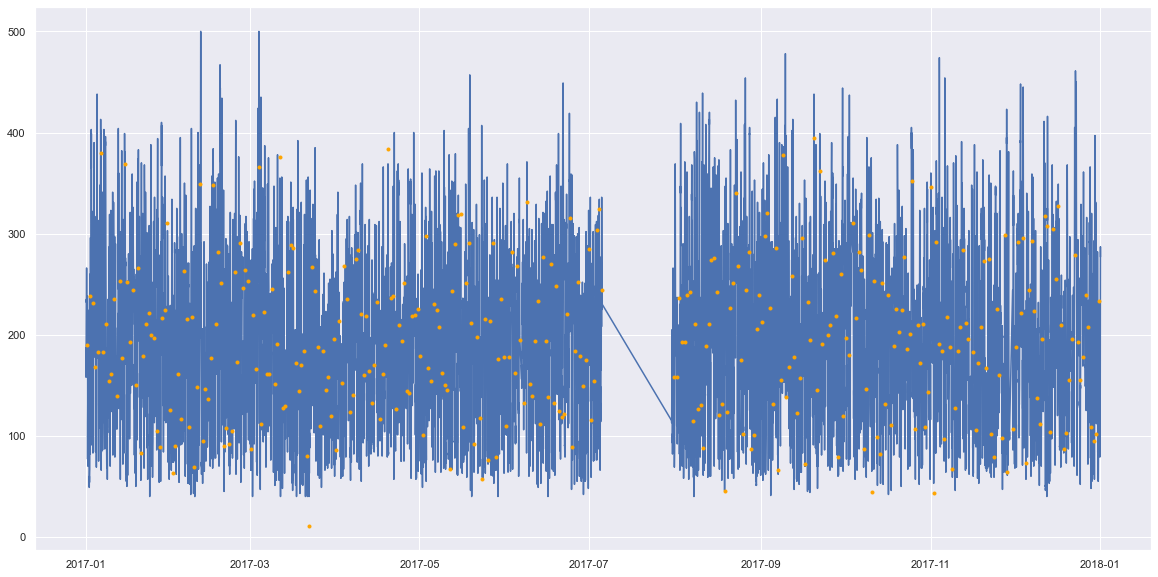

In [23]:
predicciones_arima_df_pred = predicciones_arima_df.drop(['LEVEL'], axis = 1)

#Hacemos el plot de la prediccion

plt.figure(figsize=(20,10))
plt.plot(predicciones_arima_df.sort_index())
plt.plot(predicciones_arima_df_pred,'o',markersize=3, color = 'orange')
plt.show()

In [24]:
level_2sem = predicciones_arima_df.sort_index().iloc[:1344,:]
pred_2sem = level_2sem.drop(['LEVEL'], axis = 1)

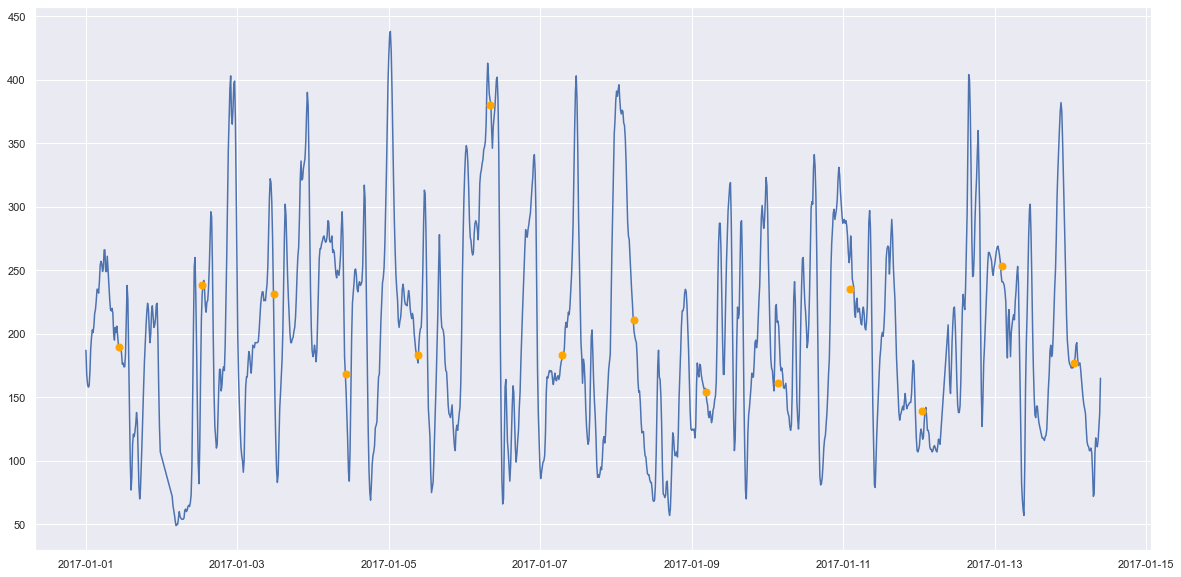

In [71]:
#Hacemos el plot de la prediccion

plt.figure(figsize=(20,10))
plt.plot(level_2sem.sort_index())
plt.plot(pred_2sem,'o',markersize=7, color = 'orange')
plt.show()

### Calculo del error (MSE)

A continuacion, una vez tengamos todas las predicciones realizadas, se procedera a llevar a cabo el calculo del error obtenido por nuestro modelo. Para ello sera necesacio aplicar la formula de calculo del Error Cuadratico Medio, para lo que se llevara a cabo una media del la diferencia al cuadrado de lo real y lo esperado por las predicciones.

In [26]:
predicciones_arima_df.head()

LEVEL  PREDICCION
DATES                                 
2017-06-07 18:00:00  152.0  132.328365
2017-06-06 17:40:00  156.0         NaN
2017-06-06 17:55:00  159.0         NaN
2017-06-06 18:10:00  170.0         NaN
2017-06-06 18:25:00  164.0         NaN

In [27]:
predicciones_arima_df.dropna(inplace = False)
predicciones_arima_df.sort_index().head()

LEVEL  PREDICCION
DATES                                 
2017-01-01 00:08:00  187.0         NaN
2017-01-01 00:23:00  168.0         NaN
2017-01-01 00:39:00  160.0         NaN
2017-01-01 00:54:00  158.0         NaN
2017-01-01 01:09:00  159.0         NaN

In [28]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [29]:
rmse(predicciones_arima_df['PREDICCION'], predicciones_arima_df['LEVEL'])

24.15160909638338

**Disposicion de los valores predichos frente a los valores reales**

In [30]:
predicciones_arima_df.dropna(inplace = True)

In [31]:
predicciones_arima_df.sort_index().head()

LEVEL  PREDICCION
DATES                                 
2017-01-01 10:40:00  188.0  189.651301
2017-01-02 12:57:00  231.0  238.700486
2017-01-03 11:45:00  190.0  231.554883
2017-01-04 10:33:00  154.0  168.267681
2017-01-05 09:21:00  177.0  183.340605

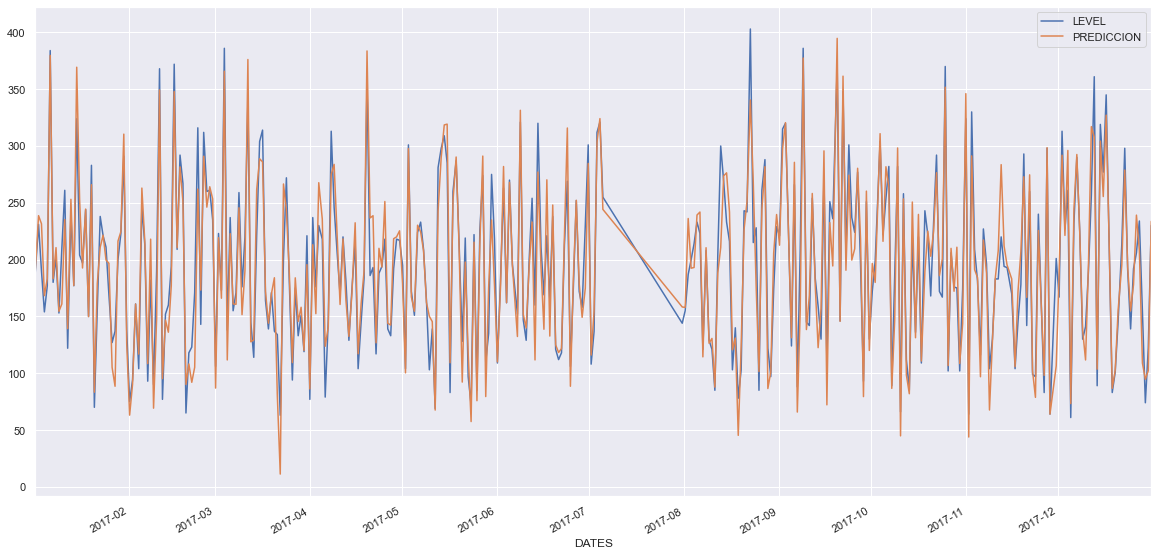

In [32]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
predicciones_arima_df.plot(kind = 'line', ax=  ax1);

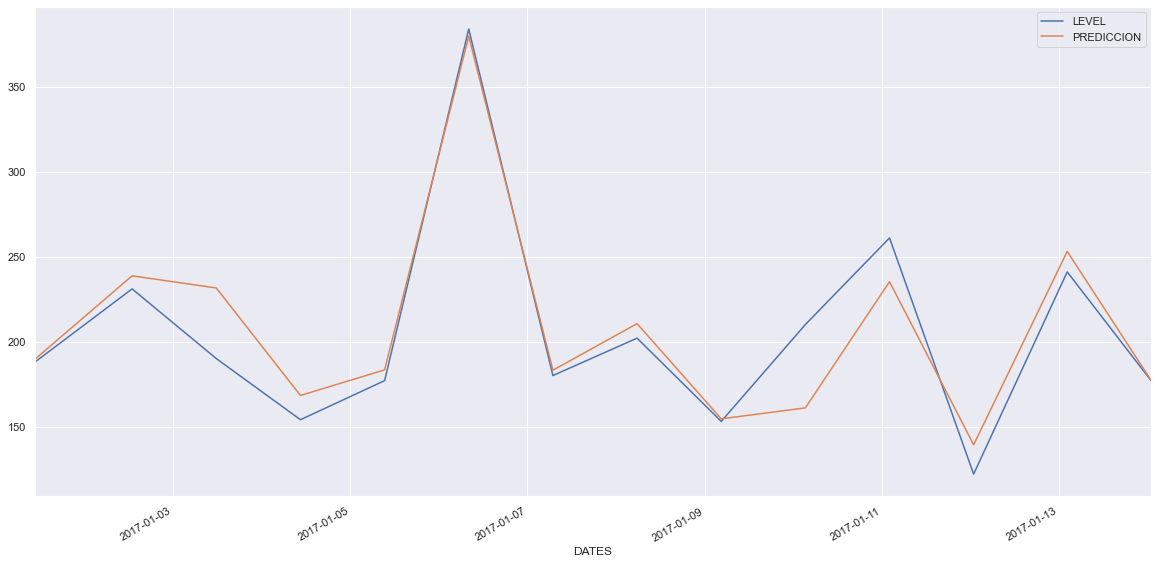

In [33]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
predicciones_arima_df.sort_index().iloc[:14, :].plot(kind = 'line', ax=  ax1);

**Mean Absolut Error (MAE)**

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
real = list(predicciones_arima_df['LEVEL'])
predicted = list(predicciones_arima_df['PREDICCION'])

In [73]:
round(mean_absolute_error(real, predicted),2 )

18.25

## 12. Modelo de Medias
<a id="12"></a>

In [37]:
len(X_train)

349

In [38]:
X_train[0]['LEVEL'].mean()

206.29166666666666

In [39]:
lista_mean = []
for i in range(len(X_train)):
    mean = X_train[i]['LEVEL'].mean()
    lista_mean.append(mean)


In [40]:
lista_mean

[206.29166666666666,
 208.65625,
 223.92708333333334,
 164.53125,
 161.29166666666666,
 183.375,
 165.73958333333334,
 185.29166666666666,
 184.13541666666666,
 165.53125,
 214.67708333333334,
 175.41666666666666,
 198.54166666666666,
 239.88541666666666,
 170.0,
 256.7708333333333,
 188.45833333333334,
 219.94791666666666,
 244.04166666666666,
 206.9375,
 177.79166666666666,
 179.72916666666666,
 155.73958333333334,
 127.91666666666667,
 168.69791666666666,
 189.32291666666666,
 178.57291666666666,
 199.26041666666666,
 192.65625,
 196.46875,
 207.3125,
 187.41666666666666,
 141.72916666666666,
 191.57291666666666,
 171.02083333333334,
 209.44791666666666,
 186.65625,
 222.73958333333334,
 177.83333333333334,
 206.23958333333334,
 190.84375,
 218.5625,
 167.10416666666666,
 212.95833333333334,
 236.95833333333334,
 261.5208333333333,
 240.02083333333334,
 218.04166666666666,
 136.73958333333334,
 185.55208333333334,
 217.17708333333334,
 168.46875,
 224.6875,
 228.86458333333334,
 287

In [41]:
predicciones_arima_df['MODELO_MEDIA'] = lista_mean

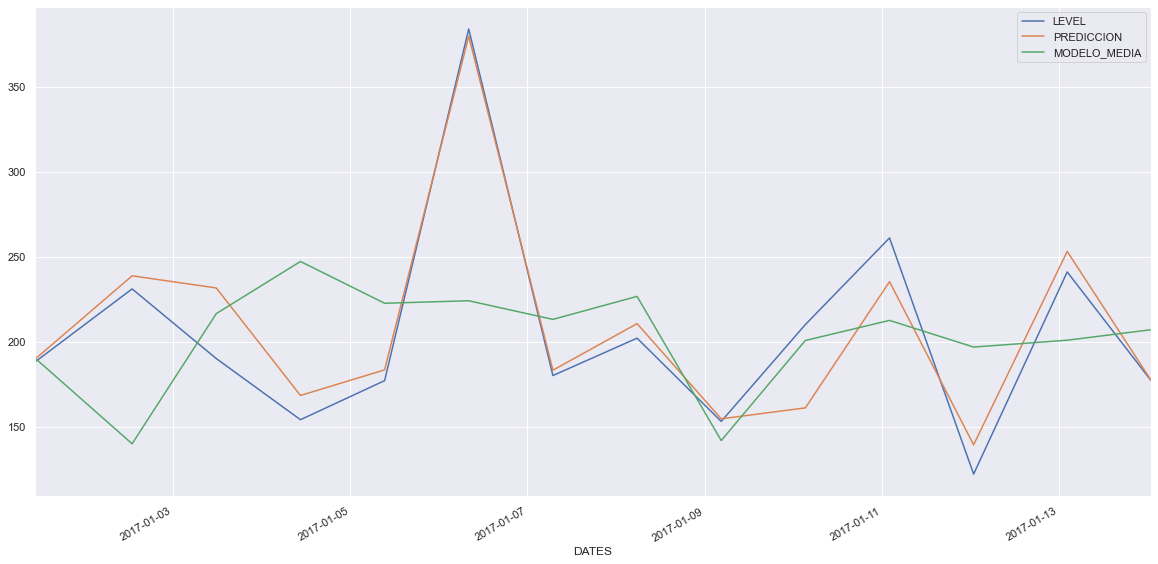

In [42]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
predicciones_arima_df.sort_index().iloc[:14, :].plot(kind = 'line', ax=  ax1);

In [43]:
real = list(predicciones_arima_df['LEVEL'])
m_media = list(predicciones_arima_df['MODELO_MEDIA'])

In [74]:
round(mean_absolute_error(real, m_media),2)

60.65

**HISTOGRAMA DE ERRORES ARIMA**

In [45]:
error_arima_df = predicciones_arima_df.drop(['MODELO_MEDIA'], axis = 1)
error_arima_df.head()

LEVEL  PREDICCION
DATES                                 
2017-06-07 18:00:00  152.0  132.328365
2017-06-08 16:51:00  321.0  331.441283
2017-06-09 15:44:00  147.0  151.757080
2017-06-10 14:35:00  129.0  139.868626
2017-06-11 13:56:00  200.0  193.901896

In [46]:
error_arima_df['LEVEL'][0:2]

DATES
2017-06-07 18:00:00    152.0
2017-06-08 16:51:00    321.0
Name: LEVEL, dtype: float64

In [47]:
error_arima_df['PREDICCION'][0:2]

DATES
2017-06-07 18:00:00    132.328365
2017-06-08 16:51:00    331.441283
Name: PREDICCION, dtype: float64

In [48]:
mean_absolute_error(error_arima_df['LEVEL'][0:2], error_arima_df['PREDICCION'][0:2])

15.056458966981836

In [49]:
#lista_errores_arima = []

#for i in range(error_arima_df.shape[0]):
    
   # valor_real = error_arima_df['LEVEL'][i]
    #valor_predicho = error_arima_df['PREDICCION'][i]
    #error = mean_absolute_error(valor_real, valor_predicho)


In [50]:
error_arima_df['MAE'] = error_arima_df['LEVEL'] - error_arima_df['PREDICCION']

In [51]:
error_arima_df.head()

LEVEL  PREDICCION        MAE
DATES                                            
2017-06-07 18:00:00  152.0  132.328365  19.671635
2017-06-08 16:51:00  321.0  331.441283 -10.441283
2017-06-09 15:44:00  147.0  151.757080  -4.757080
2017-06-10 14:35:00  129.0  139.868626 -10.868626
2017-06-11 13:56:00  200.0  193.901896   6.098104

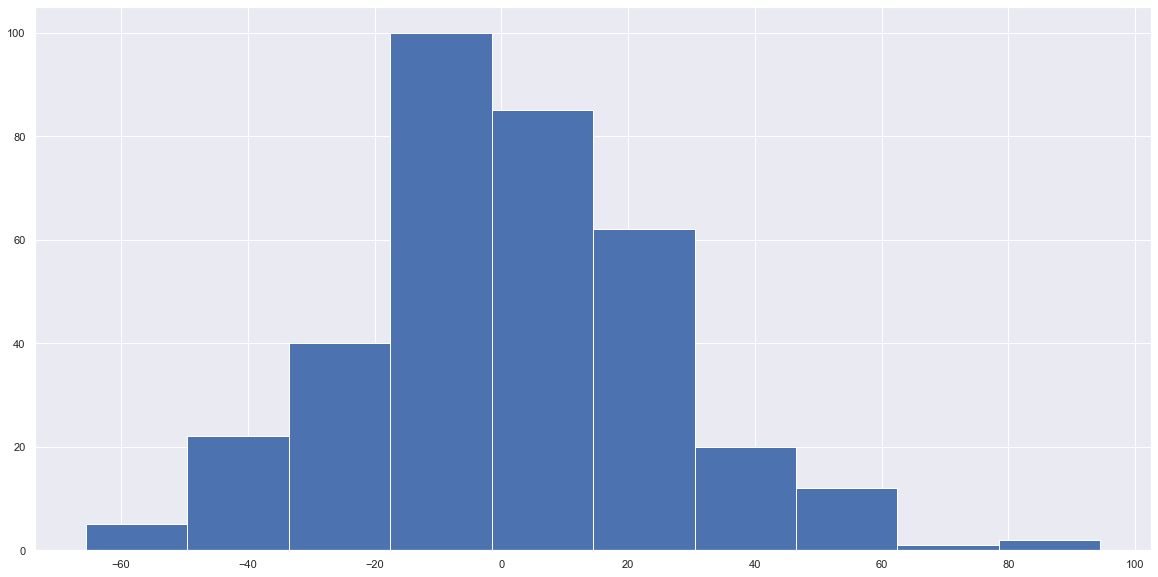

In [98]:
plt.figure(figsize = (20,10))
error_arima_df['MAE'].hist()

**PERCENTILES**

In [99]:
perc_90 = np.percentile(error_arima_df['MAE'], 90)
perc_90

30.335412150522075

In [102]:
perc_95 = np.percentile(error_arima_df['MAE'], 95)
perc_95

41.753964569088126

In [105]:
perc_10 = np.percentile(error_arima_df['MAE'], 10)
perc_10

-27.012386319907794

In [106]:
perc_50 = np.percentile(error_arima_df['MAE'], 50)
perc_50

-0.4873358406545094

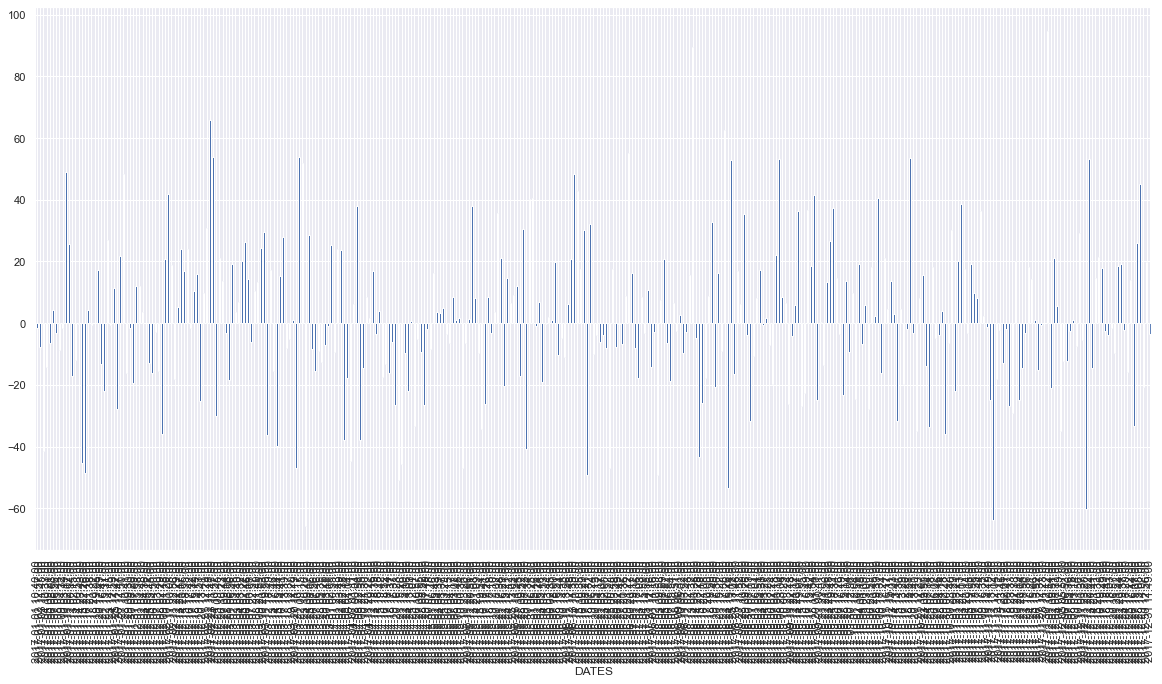

In [67]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
error_arima_df['MAE'].sort_index().plot(kind = 'bar', ax=  ax1);

**Distribucion de los errores los 100 primeros dias**

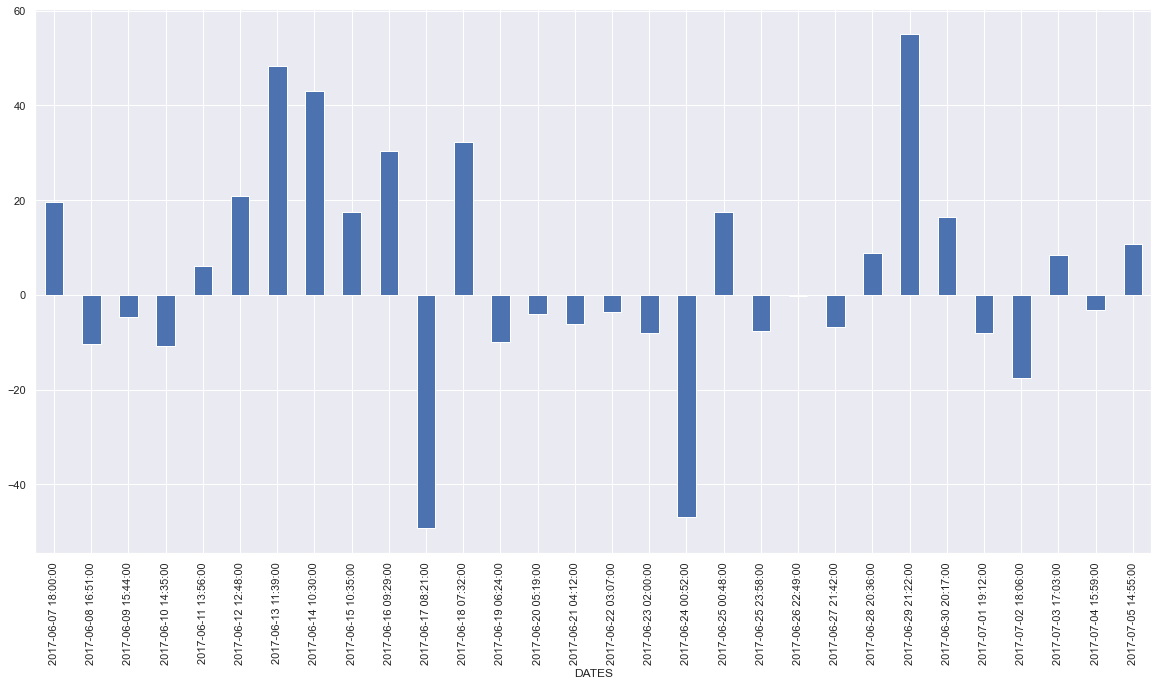

In [72]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
error_arima_df['MAE'].iloc[:30].sort_index().plot(kind = 'bar', ax=  ax1);

### HOLT-WINTERS 

In [52]:
patient_0_HW = pd.read_csv('patient0.csv')
patient_0_HW.dropna(inplace = True)
patient_0_HW.dropna(inplace = True)
patient_0_HW['DATES'] = patient_0_HW['DATE'].apply(fechas)
patient_0_HW.drop('DATE', axis = 1, inplace = True)


patient_0_HW.rename(columns={' LEVEL':'LEVEL'}, inplace=True)

patient_0_HW['Year'] = patient_0_HW['DATES'].dt.year
patient_0_HW['Month'] = patient_0_HW['DATES'].dt.month

patient_0_HW.head()

LEVEL               DATES  Year  Month
0  156.0 2017-06-06 17:40:00  2017      6
1  159.0 2017-06-06 17:55:00  2017      6
2  170.0 2017-06-06 18:10:00  2017      6
3  164.0 2017-06-06 18:25:00  2017      6
4  147.0 2017-06-06 18:40:00  2017      6

In [53]:
patient_0_HW = patient_0_HW.drop_duplicates()

In [54]:
patient_0_HW_17 = patient_0_HW[patient_0_HW.Year == 2017]
patient_0_HW_17.set_index('DATES', inplace=True, drop=True)

datos_HW = patient_0_HW_17

datos_HW.drop(['Year', 'Month'], axis = 1, inplace = True)

datos_HW.sort_index().head()

C:\Users\jagui\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


LEVEL
DATES                     
2017-01-01 00:08:00  187.0
2017-01-01 00:23:00  168.0
2017-01-01 00:39:00  160.0
2017-01-01 00:54:00  158.0
2017-01-01 01:09:00  159.0

In [55]:
from math import ceil
def split(data, x_size, y_size, gap, overlap):
    assert overlap < x_size
    size = data.shape[0]
    n_bloques = ceil((size + 1 - y_size - x_size - gap) / (x_size - overlap))

    result_train = []
    result_test = []

    for i in range(n_bloques):
        X = data[(i * (x_size - overlap)): 
                     i * (x_size - overlap) + x_size]
                
        y = data[i * (x_size - overlap) + x_size + gap:
                    i * (x_size - overlap) + x_size + gap + y_size]
        
        result_train.append(pd.DataFrame(X))
        result_test.append(pd.DataFrame(y))
        
    return(result_train, result_test)

In [56]:
x_window_size = int(24*60*1/15)
gap = 1
y_window_size = 1
X_train, y_train = split(datos_arima.LEVEL, x_size=x_window_size, y_size=y_window_size, gap=gap, overlap=0)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [88]:
size = datos_HW.shape[0]
x_size = int(24*60*1/15)
gap = 1
y_size = 1
overlap=0
n_bloques = ceil((size + 1 - y_size - x_size - gap) / (x_size - overlap))
predicciones_HW = []
for i in range(n_bloques):
    model = ExponentialSmoothing(X_train[i], seasonal = 'mul', seasonal_periods = 96).fit()
    
    predict_list = list(model.forecast(steps = 2))
    test = y_train[i]
    test['PREDICCION'] = predict_list[1]
    train = X_train[i]
    prediccion_df = pd.concat([test, train], axis = 0)
    predicciones_HW.append(prediccion_df.sort_index())

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jag

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-pac

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-pac

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-pac

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:956: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:961: RuntimeWarning: invalid value encountered in double_scalars
  aicc = aic + aicc_penalty
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:962: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is av

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored wh

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:956: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:961: RuntimeWarning: invalid value encountered in double_scalars
  aicc = aic + aicc_penalty
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:962: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is av

C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jagui\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
 

In [96]:
predicciones_HW[len(predicciones_HW)-1].sort_index()

LEVEL  PREDICCION
DATES                                 
2017-06-05 05:14:00  257.0         NaN
2017-06-05 05:29:00  249.0         NaN
2017-06-05 05:44:00  249.0         NaN
2017-06-05 05:58:00  244.0         NaN
2017-06-05 06:13:00  243.0         NaN
2017-06-05 06:28:00  249.0         NaN
2017-06-05 06:43:00  249.0         NaN
2017-06-05 06:58:00  242.0         NaN
2017-06-05 07:14:00  257.0         NaN
2017-06-05 07:29:00  273.0         NaN
2017-06-05 07:44:00  281.0         NaN
2017-06-05 07:59:00  285.0         NaN
2017-06-05 08:14:00  282.0         NaN
2017-06-05 08:29:00  282.0         NaN
2017-06-05 08:44:00  270.0         NaN
2017-06-05 08:59:00  244.0         NaN
2017-06-05 09:14:00  219.0         NaN
2017-06-05 09:29:00  188.0         NaN
2017-06-05 09:44:00  161.0         NaN
2017-06-05 10:00:00  154.0         NaN
2017-06-05 10:15:00  149.0         NaN
2017-06-05 10:30:00  140.0         NaN
2017-06-05 10:45:00  135.0         NaN
2017-06-05 11:00:00  131.0         NaN
2017-06-05 11:15:00  129.0         NaN
2017-06-05 11:30:00  126.0         NaN
2017-06-05 11:45:00  126.0         NaN
2017-06-05 12:00:00  134.0         NaN
2017-06-05 12:15:00  164.0         NaN
2017-06-05 12:30:00  209.0         NaN
...                    ...         ...
2017-06-05 22:03:00  330.0         NaN
2017-06-05 22:18:00  346.0         NaN
2017-06-05 22:33:00  355.0         NaN
2017-06-05 22:48:00  347.0         NaN
2017-06-05 23:03:00  332.0         NaN
2017-06-05 23:18:00  316.0         NaN
2017-06-05 23:33:00  297.0         NaN
2017-06-05 23:48:00  280.0         NaN
2017-06-06 00:03:00  269.0         NaN
2017-06-06 00:18:00  260.0         NaN
2017-06-06 00:35:00  260.0         NaN
2017-06-06 00:50:00  250.0         NaN
2017-06-06 01:05:00  234.0         NaN
2017-06-06 01:20:00  227.0         NaN
2017-06-06 01:35:00  225.0         NaN
2017-06-06 01:50:00  219.0         NaN
2017-06-06 02:05:00  209.0         NaN
2017-06-06 02:20:00  199.0         NaN
2017-06-06 02:35:00  196.0         NaN
2017-06-06 02:50:00  196.0         NaN
2017-06-06 03:05:00  199.0         NaN
2017-06-06 03:20:00  206.0         NaN
2017-06-06 03:35:00  208.0         NaN
2017-06-06 03:50:00  204.0         NaN
2017-06-06 04:05:00  199.0         NaN
2017-06-06 04:20:00  188.0         NaN
2017-06-06 04:35:00  180.0         NaN
2017-06-06 04:50:00  176.0         NaN
2017-06-06 05:05:00  178.0         NaN
2017-06-06 05:35:00  172.0       249.0

[97 rows x 2 columns]

In [85]:
predicciones_HW_df = pd.concat(predicciones_HW, axis = 0)
predicciones_HW_df = predicciones_HW_df.drop_duplicates()
predicciones_HW_df.sort_index()

LEVEL  PREDICCION
DATES                                 
2017-01-01 04:24:00  241.0        55.0
2017-01-02 07:57:00   60.0       241.0
2017-01-03 07:59:00  233.0        60.0
2017-01-04 08:02:00  248.0       233.0
2017-01-05 00:50:00  422.0         NaN
2017-01-05 08:05:00  201.0       248.0
2017-01-06 08:08:00  384.0       201.0
2017-01-07 08:11:00  209.0       384.0
2017-01-08 08:14:00  122.0       209.0
2017-01-09 08:17:00  240.0       122.0
2017-01-10 08:20:00  229.0       240.0
2017-01-11 08:22:00  297.0       229.0
2017-01-12 10:44:00  209.0       297.0
2017-01-13 11:00:00  298.0       209.0
2017-01-14 10:59:00  291.0       298.0
2017-01-15 10:57:00  211.0       291.0
2017-01-16 10:55:00  266.0       211.0
2017-01-17 10:54:00  224.0       266.0
2017-01-18 12:37:00  126.0       224.0
2017-01-19 12:35:00  150.0       126.0
2017-01-20 12:34:00  230.0       150.0
2017-01-21 12:48:00  229.0       230.0
2017-01-22 12:46:00  142.0       229.0
2017-01-23 12:45:00  239.0       142.0
2017-01-24 12:44:00  204.0       239.0
2017-01-25 12:42:00  138.0       204.0
2017-01-26 15:02:00  276.0       138.0
2017-01-27 15:21:00  214.0       276.0
2017-01-28 04:39:00  410.0         NaN
2017-01-28 15:27:00  329.0       214.0
...                    ...         ...
2017-12-04 12:44:00  104.0       195.0
2017-12-05 12:41:00  266.0       104.0
2017-12-06 14:53:00  205.0       266.0
2017-12-07 14:49:00  246.0       205.0
2017-12-08 14:46:00  250.0       246.0
2017-12-09 14:57:00  112.0       250.0
2017-12-10 14:55:00  181.0       112.0
2017-12-11 14:51:00  300.0       181.0
2017-12-12 14:48:00  171.0       300.0
2017-12-13 14:44:00   73.0       171.0
2017-12-14 16:53:00  215.0        73.0
2017-12-15 17:02:00  122.0       215.0
2017-12-16 17:10:00  148.0       122.0
2017-12-17 18:49:00  124.0       148.0
2017-12-18 18:56:00   84.0       124.0
2017-12-19 19:35:00  112.0        84.0
2017-12-20 19:42:00  232.0       112.0
2017-12-22 01:53:00  164.0       232.0
2017-12-23 00:01:00  461.0         NaN
2017-12-23 00:16:00  460.0         NaN
2017-12-23 00:31:00  453.0         NaN
2017-12-23 02:02:00  383.0       164.0
2017-12-24 02:11:00  210.0       383.0
2017-12-25 02:18:00  292.0       210.0
2017-12-26 02:26:00  243.0       292.0
2017-12-27 02:34:00  220.0       243.0
2017-12-28 02:41:00  280.0       220.0
2017-12-29 03:59:00  105.0       280.0
2017-12-30 04:09:00  218.0       105.0
2017-12-31 04:18:00   55.0       218.0

[763 rows x 2 columns]

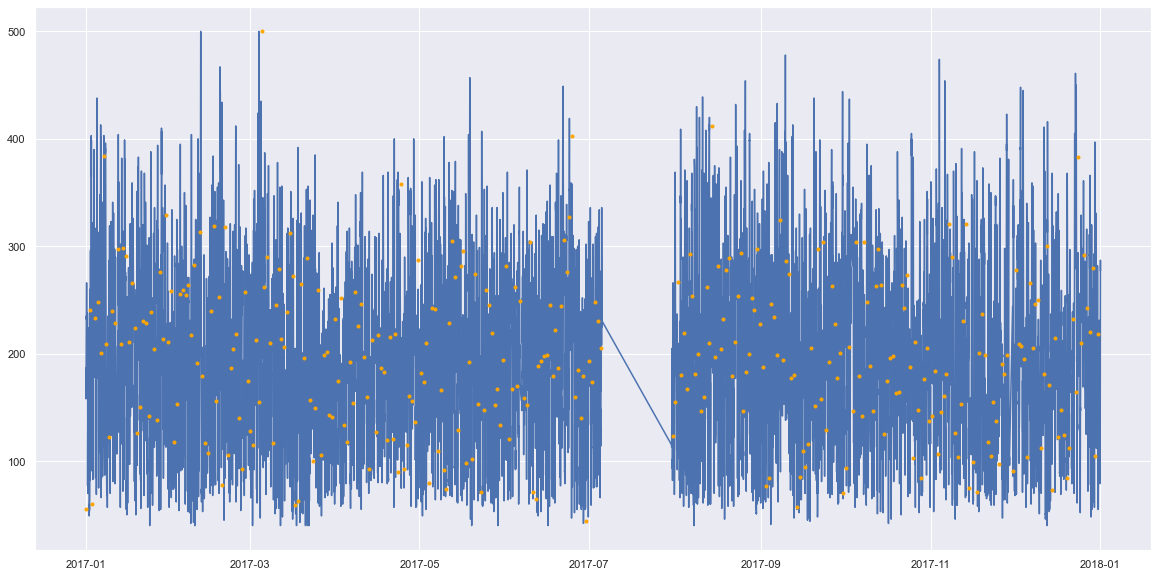

In [60]:
predicciones_HW_df_pred = predicciones_HW_df.drop(['LEVEL'], axis = 1)

#Hacemos el plot de la prediccion

plt.figure(figsize=(20,10))
plt.plot(predicciones_HW_df.sort_index())
plt.plot(predicciones_HW_df_pred,'o',markersize=3, color = 'orange')
plt.show()

In [61]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [62]:
rmse(predicciones_HW_df['PREDICCION'], predicciones_HW_df['LEVEL'])

97.36502781021214

**Disposicion de los valores predichos frente a los valores reales**

In [63]:
predicciones_HW_df.dropna(inplace = True)

In [64]:
predicciones_HW_df.sort_index().head()

LEVEL  PREDICCION
DATES                                 
2017-01-01 04:24:00  241.0        55.0
2017-01-02 07:57:00   60.0       241.0
2017-01-03 07:59:00  233.0        60.0
2017-01-04 08:02:00  248.0       233.0
2017-01-05 08:05:00  201.0       248.0

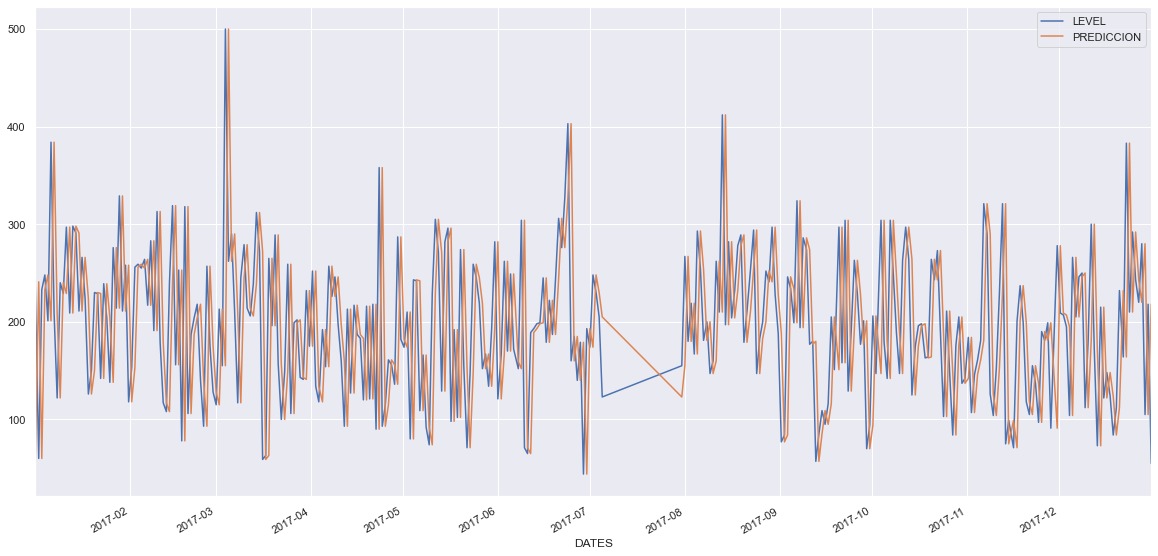

In [65]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(20,10))   
predicciones_HW_df.plot(kind = 'line', ax=  ax1);